#### Avance 1

In [1]:
#cargar librerias
import pandas as pd
import numpy as np


In [2]:
# Proporcionar la ruta completa dentro de tu proyecto
data = pd.read_csv('C:/Users/Usuario/Desktop/proyecto_avance/data_latinoamerica.csv')

In [5]:
data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [41]:
data.shape

(12216057, 50)

In [5]:

# Filtrar el DataFrame para incluir solo los países de expansión
paises_seleccionados = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]


In [7]:
data_latinoamerica.shape

(11970289, 50)

Verificamos la cantidad de datos faltantes por columna y filtrando los datos con valores mayores a 4 millones de datos faltantes 

In [6]:
# Calcular la cantidad de valores nulos en cada columna y filtrar las columnas que tienen más de 4.000,000 valores nulos
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum() > 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


Se realiza un nuevo filtro por la columna 'location_key' pero solo vamos a utilizar las instancias que correspondas a los paises seleccionados y no a sus regiones o subregiones 

In [7]:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR', 'CL', 'CO', 'MX', 'PE', 'BR'])]

Para la cmprension de los datos, se va a filtrar a partir de la fecha 2021-01-01, ya que es la fecha donde se registran los mejores datos 

In [8]:
data_latinoamerica_paises_Fecha = data_latinoamerica_paises[data_latinoamerica_paises['date'] > '2021-01-01']

In [9]:
data_latinoamerica_paises_Fecha.shape

(3744, 50)

Con el nuevo filtro se observa que cantidad de elementos tenemos vacios, en caso de tenerlos, se procede a eliminarlos

In [10]:
valores_nulos_fecha = data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


1. El código reemplaza valores faltantes en varias columnas.
2. Para las columnas de casos confirmados, muertos, lluvia y temperatura, rellena los valores faltantes con la media de cada columna.
Para las columnas relacionadas con recuperados y vacunas, rellena con 0.

In [11]:
for pais in paises_seleccionados:
    data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha['new_confirmed'].mean())
    data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamerica_paises_Fecha['new_deceased'].mean())
    data_latinoamerica_paises_Fecha['cumulative_confirmed'] = data_latinoamerica_paises_Fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha['cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha['cumulative_deceased'] = data_latinoamerica_paises_Fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha['cumulative_deceased'].mean())
    data_latinoamerica_paises_Fecha['rainfall_mm'] = data_latinoamerica_paises_Fecha['rainfall_mm'].fillna(data_latinoamerica_paises_Fecha['rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha['relative_humidity'] = data_latinoamerica_paises_Fecha['relative_humidity'].fillna(data_latinoamerica_paises_Fecha['relative_humidity'].mean())
    data_latinoamerica_paises_Fecha['average_temperature_celsius'] = data_latinoamerica_paises_Fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha['average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].mean())

    # Llenar Nan con el valor de 0 en las columnas específicas para análisis.
    data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
    data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
    data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12244\494639121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha['new_confirmed'].mean())
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12244\494639121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamer

Verificamos la cantidad de instancias vacias y las dimensiones del nuevo dataset

In [12]:
data_latinoamerica_paises_Fecha.isnull().sum()
data_latinoamerica_paises_Fecha.shape

(3744, 50)

Guardamos el dataset filtrado por fecha en un archivo csv para poderlo utilizar en el analisis y que no sea necesario cargar el archivo original

In [13]:
data_latinoamerica_paises_Fecha.to_csv('Datosfinalesfiltrado.csv', index=False)

Podemos reiniciar el notebook para liberar memoria  y cargar el archivo filtrado para continuar con el analisis

In [26]:
data_latinoamerica_paises = pd.read_csv('Datosfinalesfiltrado.csv', sep= ',')

1. Para columnas numéricas, devuelve:
count: número de valores no nulos.
mean: promedio de los valores.
std: desviación estándar.
min: valor mínimo.
25%, 50%, 75%: percentiles 25, 50 (mediana) y 75.
max: valor máximo.
2. Para columnas categóricas o de tipo texto, devuelve:
count: número de valores no nulos.
unique: cantidad de valores únicos.
top: el valor más frecuente.
freq: frecuencia del valor más frecuente.

In [27]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('__________________________________')


location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
__________________________________
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
__________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
__________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
__________________________________
new_confirmed
count      3744.000000
mean      13936.279613
std       24205.428991
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
__________________________________
new_deceased
count     3744.000000
mean       277.164115
std        507.021038
min          0.000000
25%         26.000000
50%        1

 Crear una funcion que el metodo describe no nos entregue, como la moda, mediana,rango,y la varianza

In [28]:
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            print(i)
            print("Mediana:", data[i].median())
            print('Varianza:', data[i].var())
            print('Rango', data[i].max()-data[i].min())
            print("Moda", data[i].mode())
            print('_________________________')
            
describir_datos(data_latinoamerica_paises)            


new_confirmed
Mediana: 5227.0
Varianza: 585902792.6176658
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
_________________________
new_deceased
Mediana: 101.0
Varianza: 257070.33308195538
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
_________________________
cumulative_confirmed
Mediana: 3648782.0
Varianza: 63634969089051.95
Rango 34567862.0
Moda 0    6.784382e+06
Name: cumulative_confirmed, dtype: float64
_________________________
cumulative_deceased
Mediana: 139727.0
Varianza: 33309233461.821102
Rango 685202.0
Moda 0    193136.784045
Name: cumulative_deceased, dtype: float64
_________________________
cumulative_vaccine_doses_administered
Mediana: 32445756.5
Varianza: 8551958275078892.0
Rango 347868481.0
Moda 0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
_________________________
population
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango 194985406.0
Moda 0     17574003.0
1     29381884.0
2     44938712.0
3     50882884.

#### Avance 2

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data_latinoamerica_paises = pd.read_csv('Datosfinalesfiltrado.csv', sep= ',')

In [16]:
data_latinoamerica_paises.head(3)

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  

[3 rows x 50 columns]

#### Analisis Estadistico

1. Para columnas numéricas, devuelve:
count: número de valores no nulos.
mean: promedio de los valores.
std: desviación estándar.
min: valor mínimo.
25%, 50%, 75%: percentiles 25, 50 (mediana) y 75.
max: valor máximo.
2. Para columnas categóricas o de tipo texto, devuelve:
count: número de valores no nulos.
unique: cantidad de valores únicos.
top: el valor más frecuente.
freq: frecuencia del valor más frecuente.

In [17]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('__________________________________')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
__________________________________
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
__________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
__________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
__________________________________
new_confirmed
count      3744.000000
mean      13936.279613
std       24205.428991
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
__________________________________
new_deceased
count     3744.000000
mean       277.164115
std        507.021038
min          0.000000
25%         26.000000
50%        1

In [18]:
#Filtramos por paises 
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

#### Convertimos la columna date a formato fecha y establecemos esta columna como indice

In [10]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

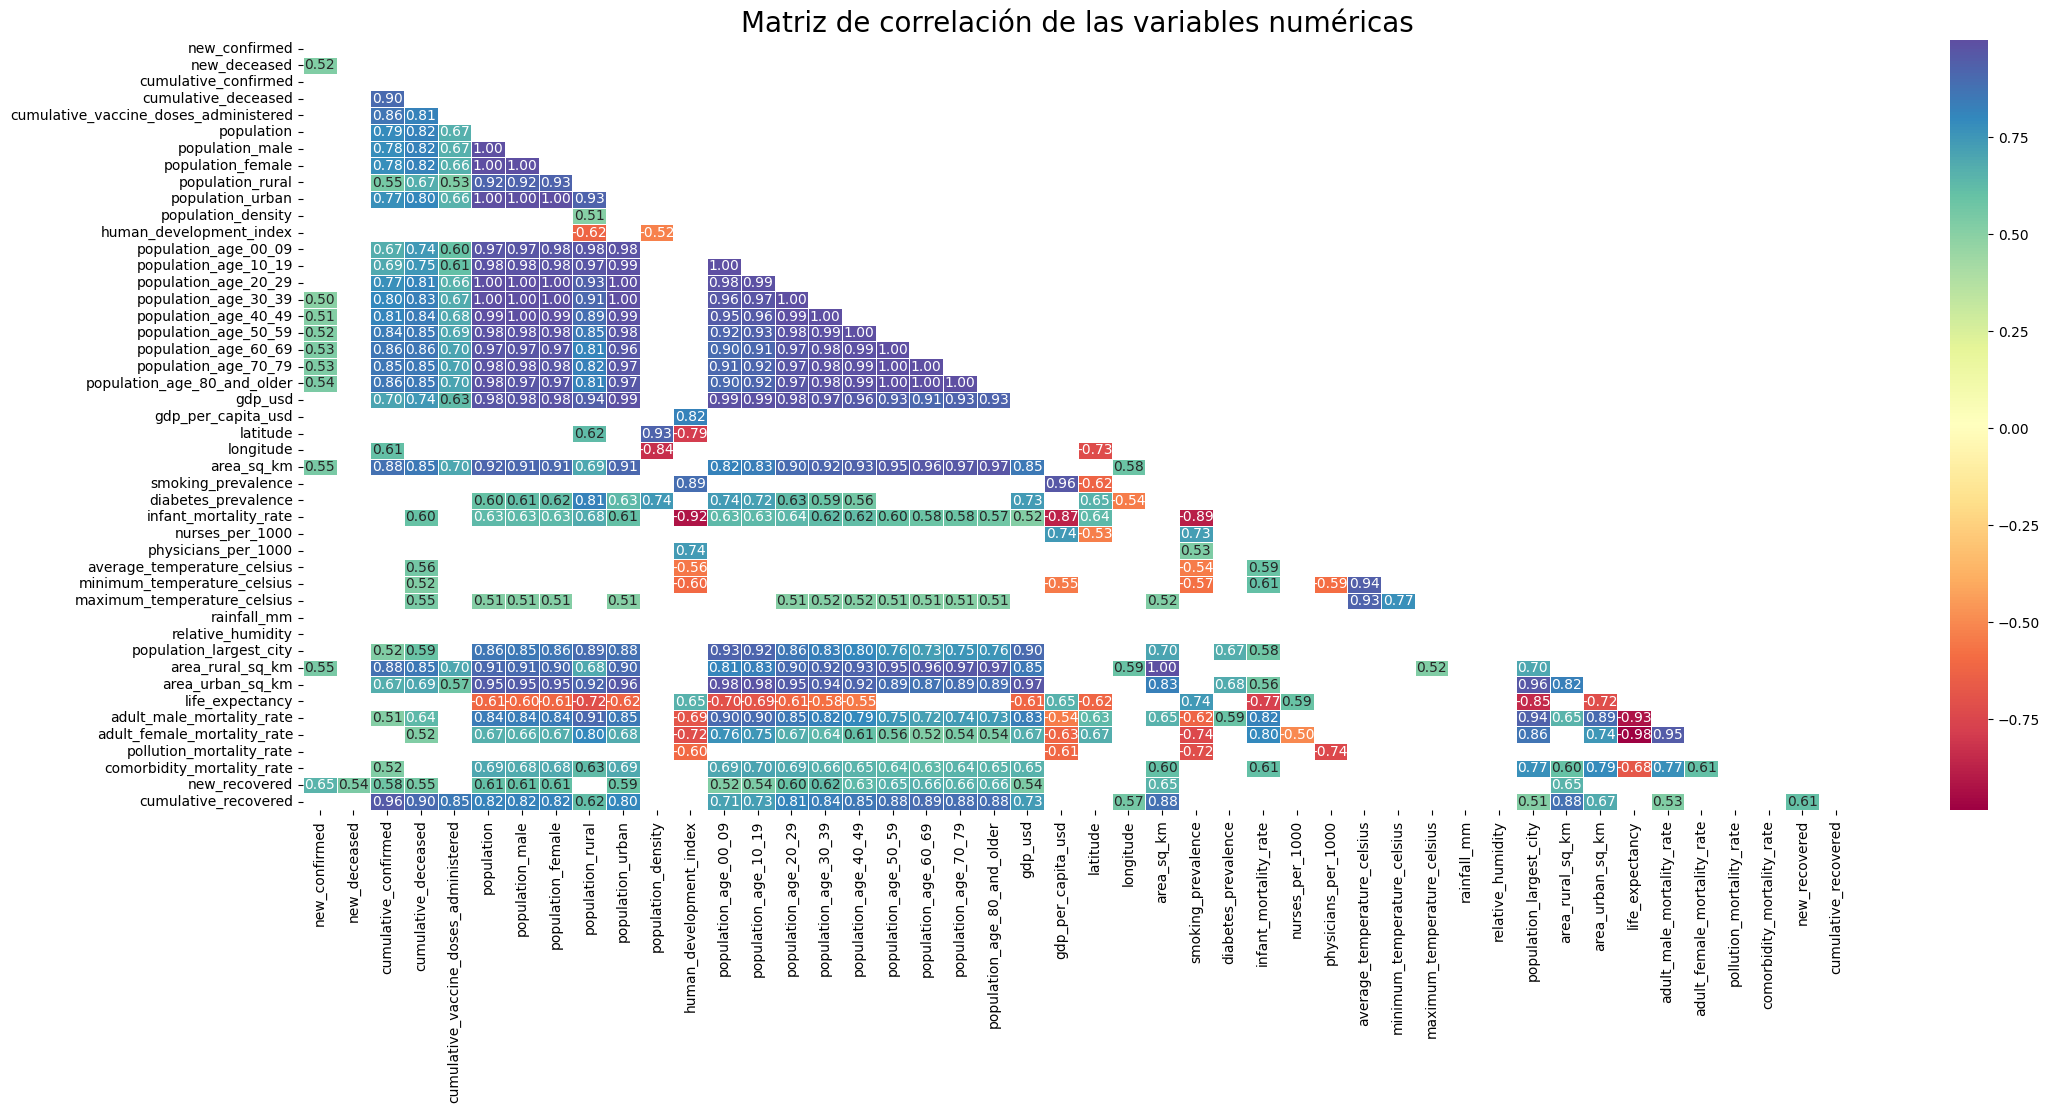

In [21]:
# Se seleccionan las columnas que son numéricas (float64 o int64) del DataFrame.
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns

#Se calcula la matriz de correlación entre las columnas numéricas.
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()

# Se crea una máscara para ocultar el triángulo superior de la matriz, evitando duplicados.
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Se filtran correlaciones que son menores o iguales a 0.5, dejando solo correlaciones fuertes.
filtered_corr_matrix = correlation_matrix.copy()
filtered_corr_matrix[abs(correlation_matrix) <= 0.5] = np.nan

# Crear la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(filtered_corr_matrix, mask=mask, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()


En la gráfica anterior se presentan Las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap.

Ya teniendo una idea de las variables que tienen mayor correlación, podría hacer un análisis más detallado de estas variables esto se podría hacer en un análisis posterior y una toma de decisiones para la creación de un modelo ML.

Sin embargo podemos proceder a realizar una rápida revisión gráfica de la gran mayoría de las columnas para ver como se comportan los datos, para esta primera aproximación vamos a utilizar barplots utilizando un ciclo for y la librería seaborn.

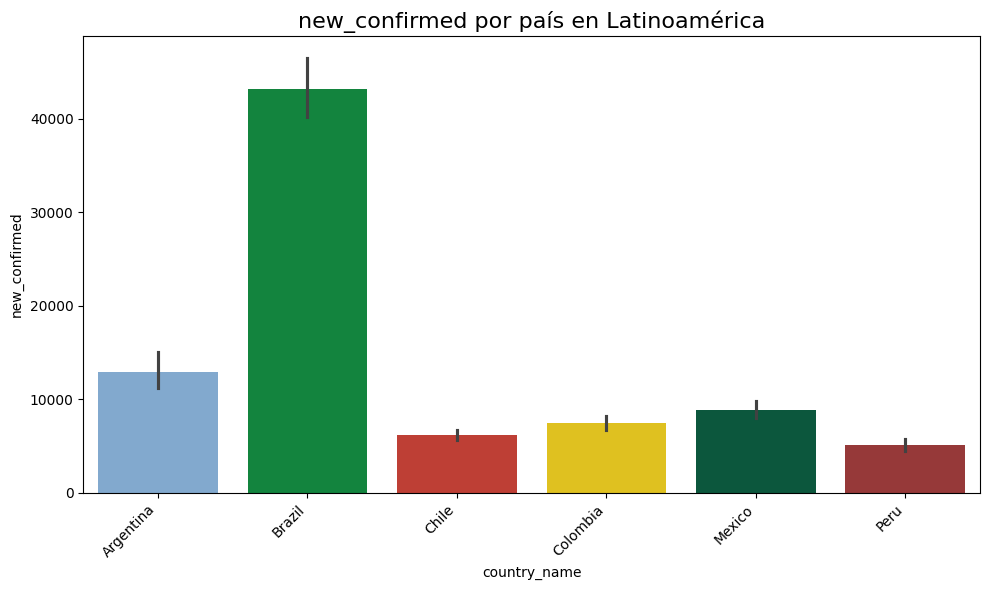

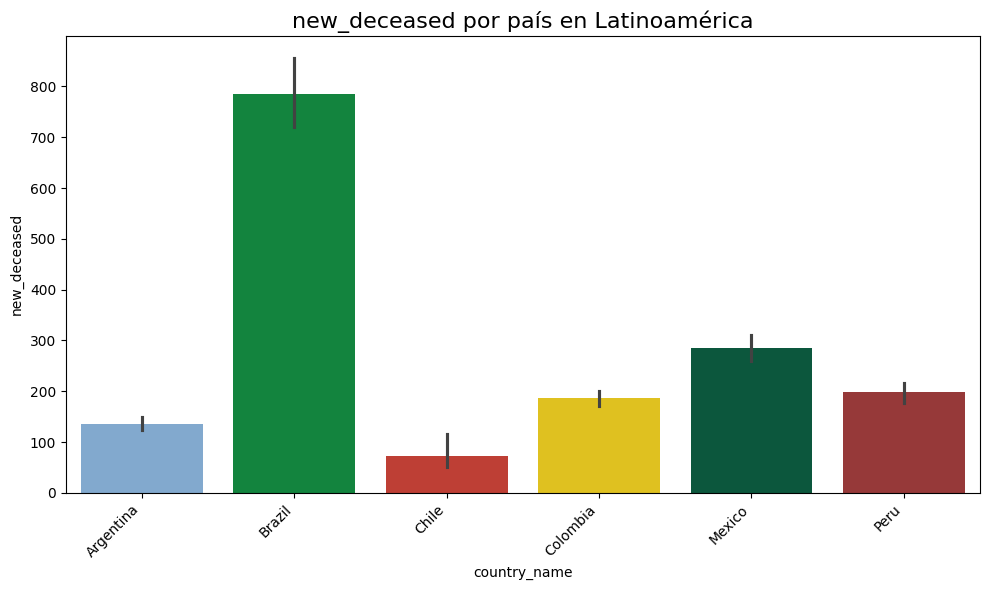

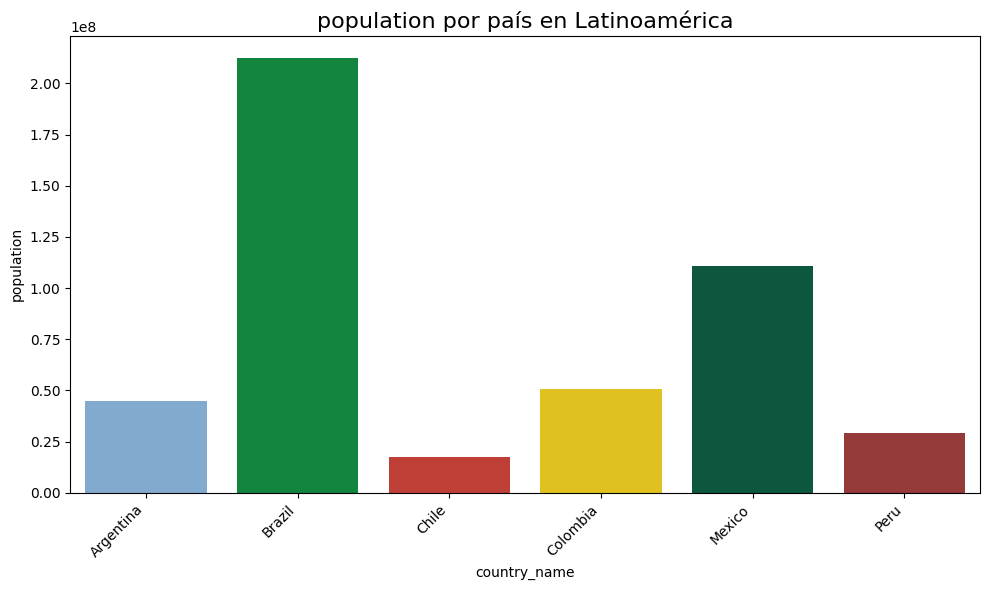

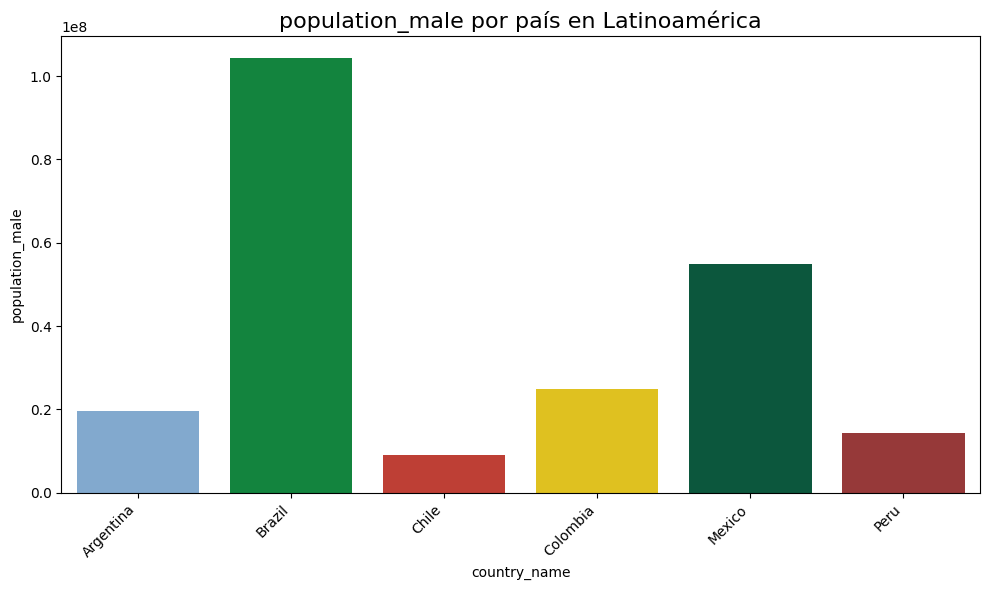

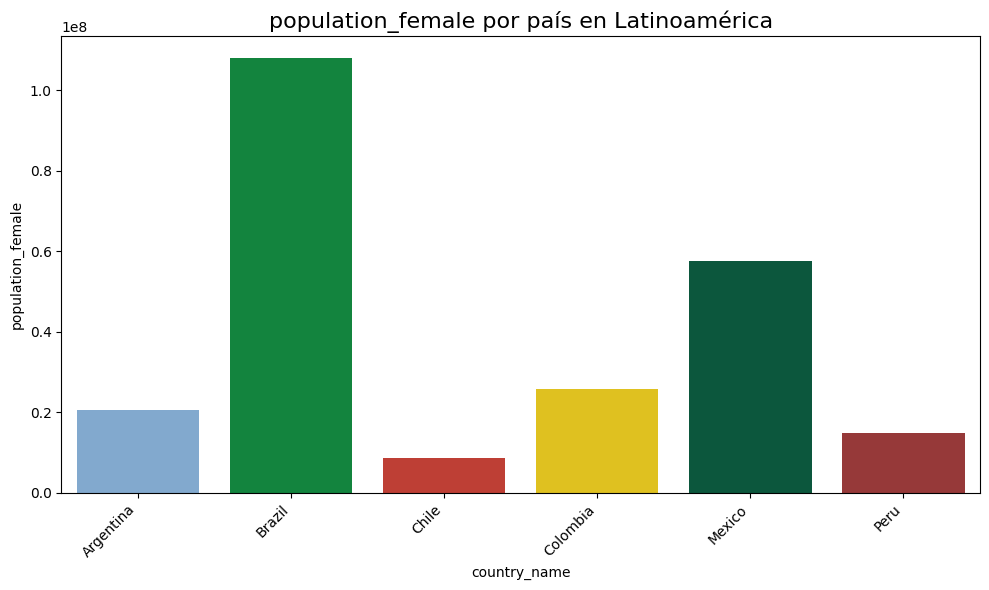

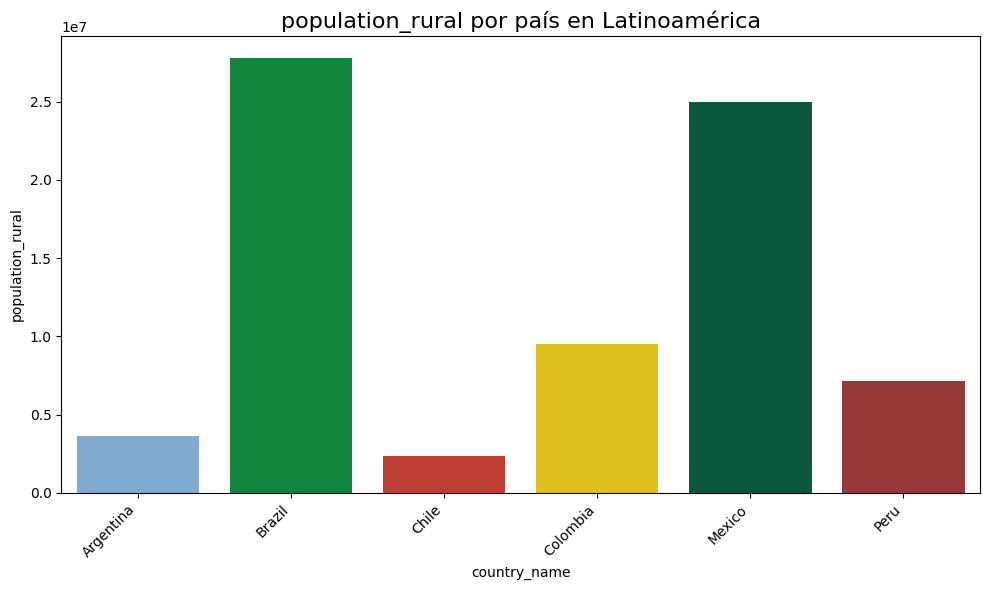

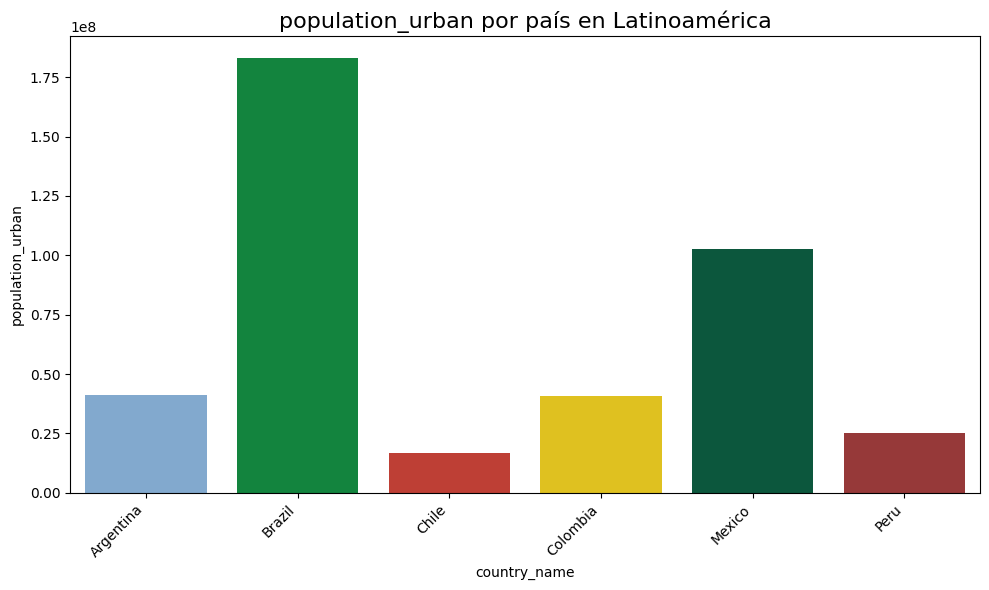

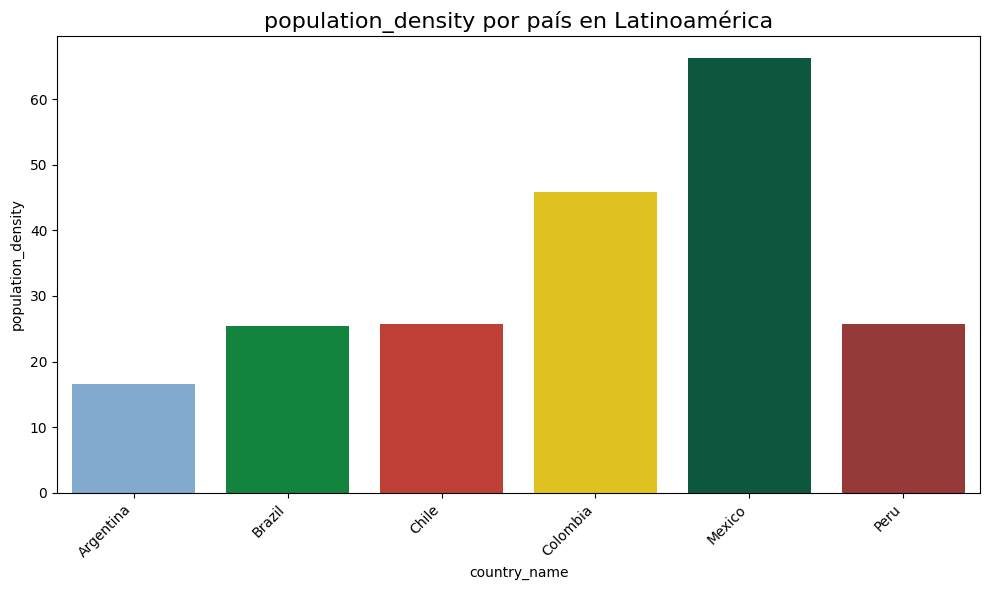

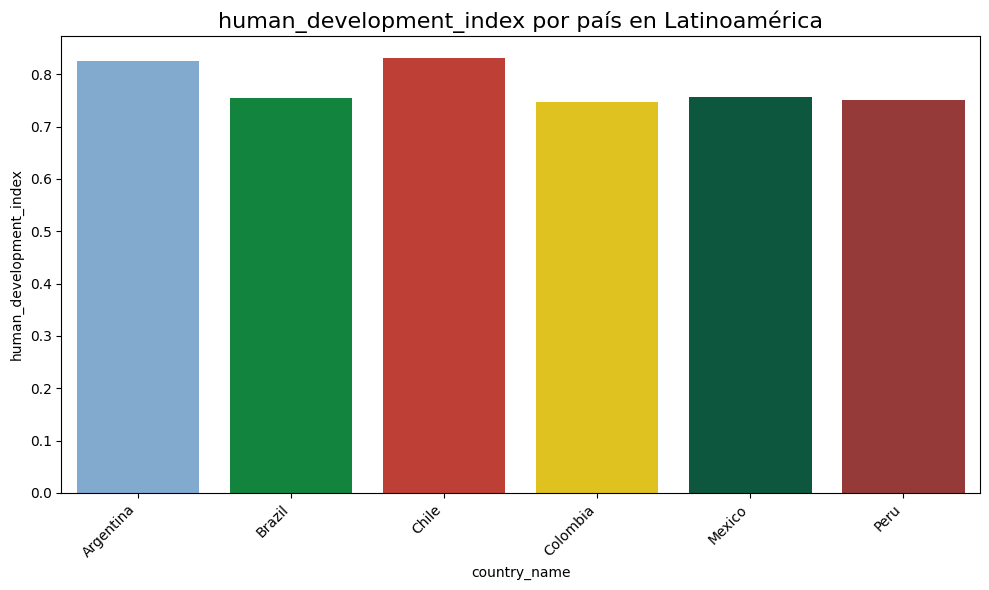

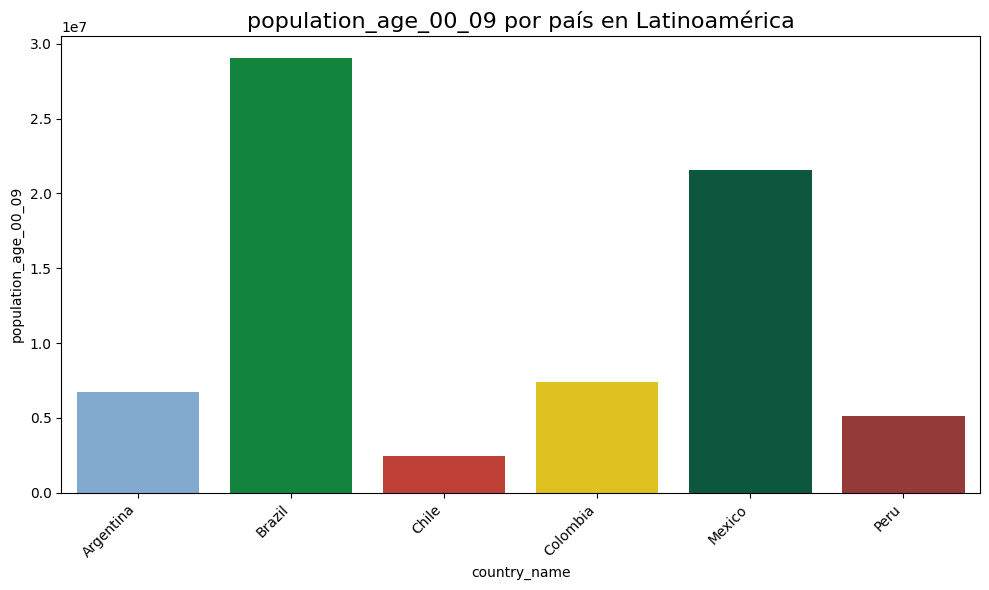

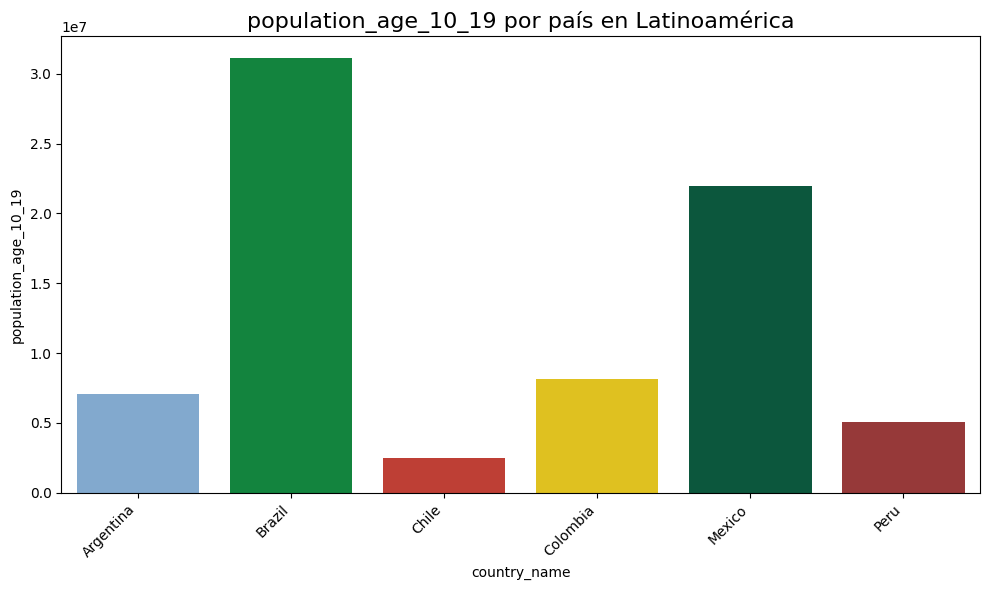

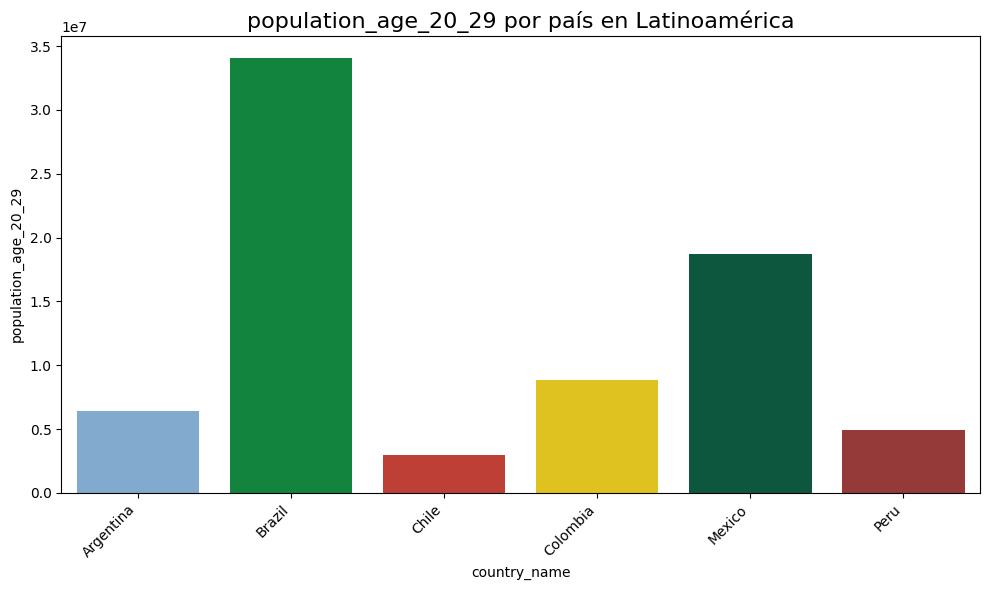

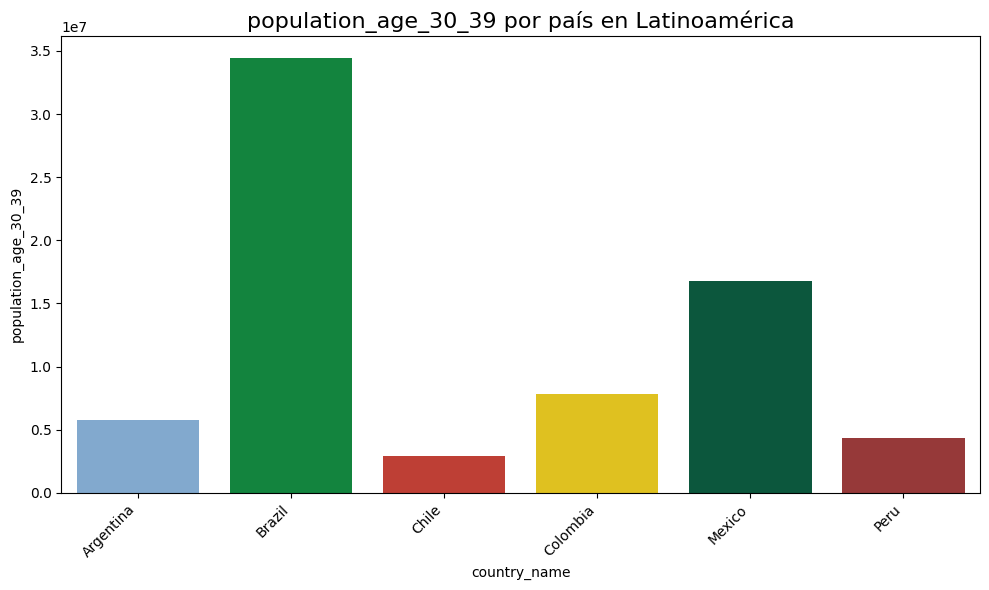

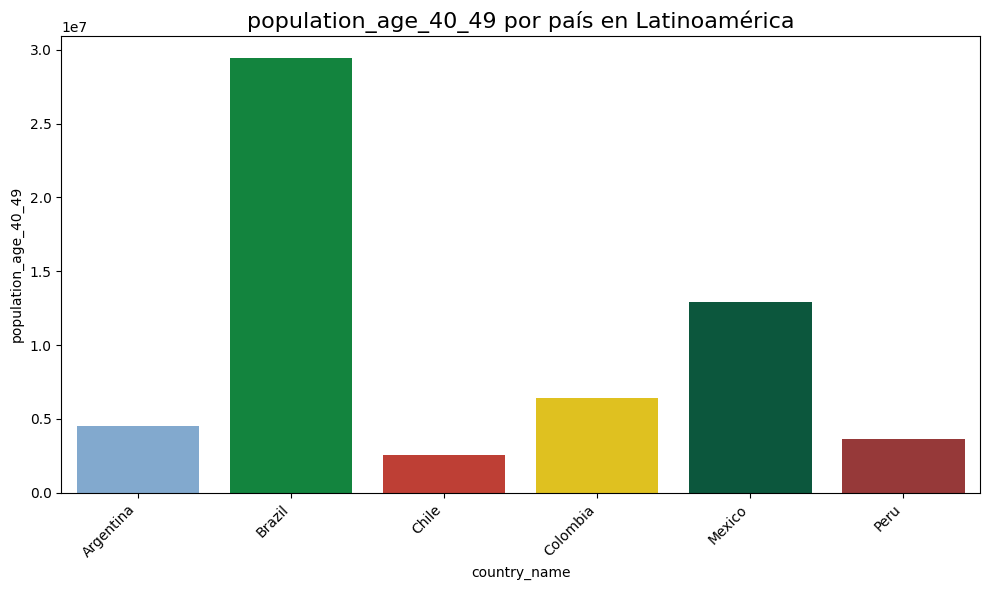

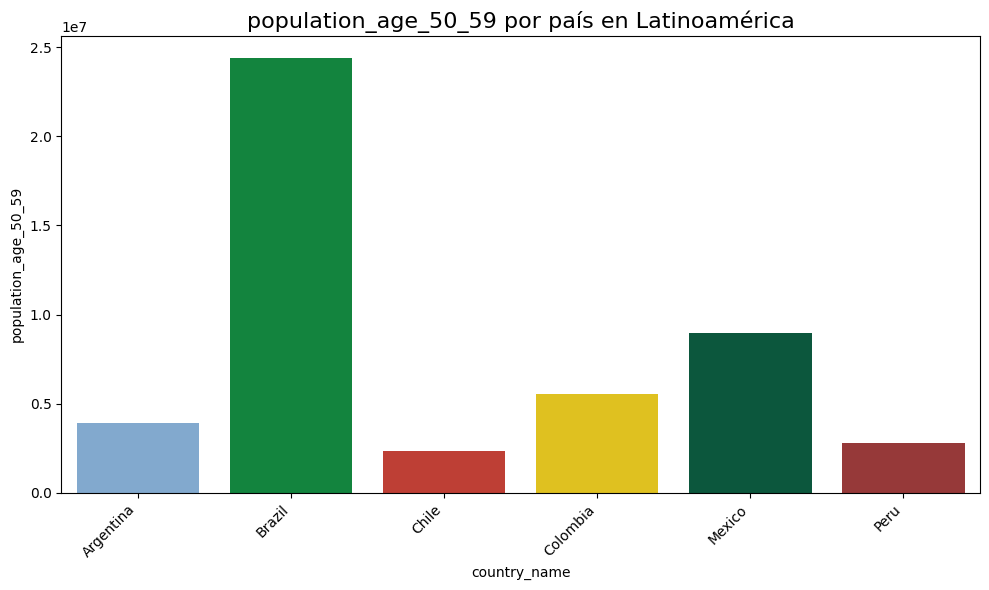

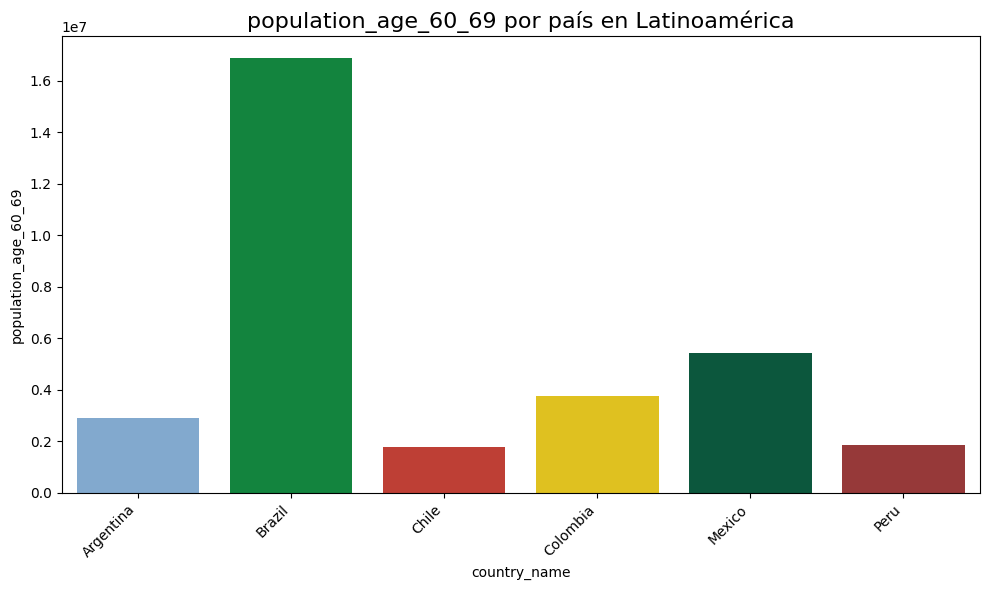

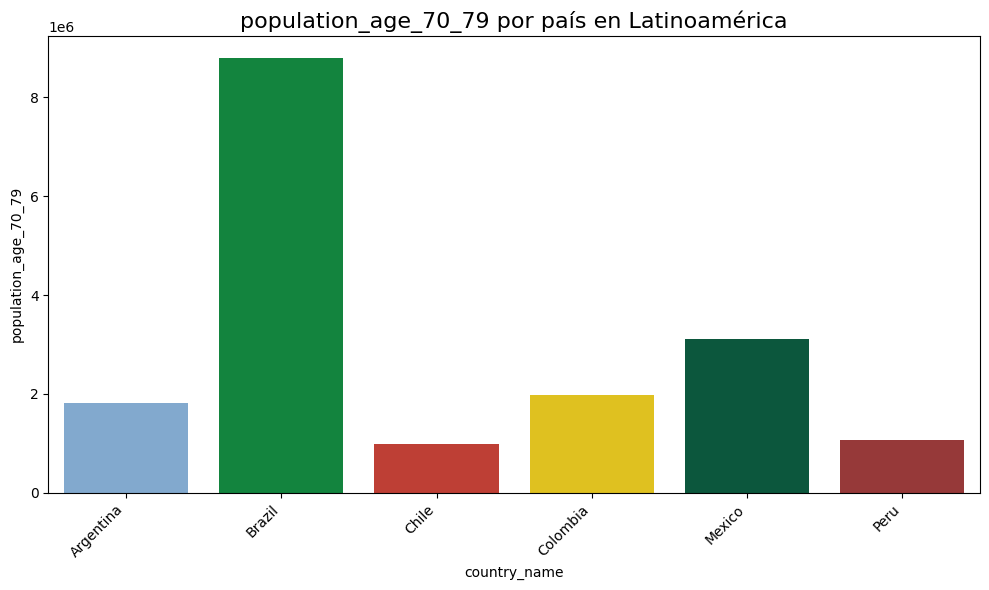

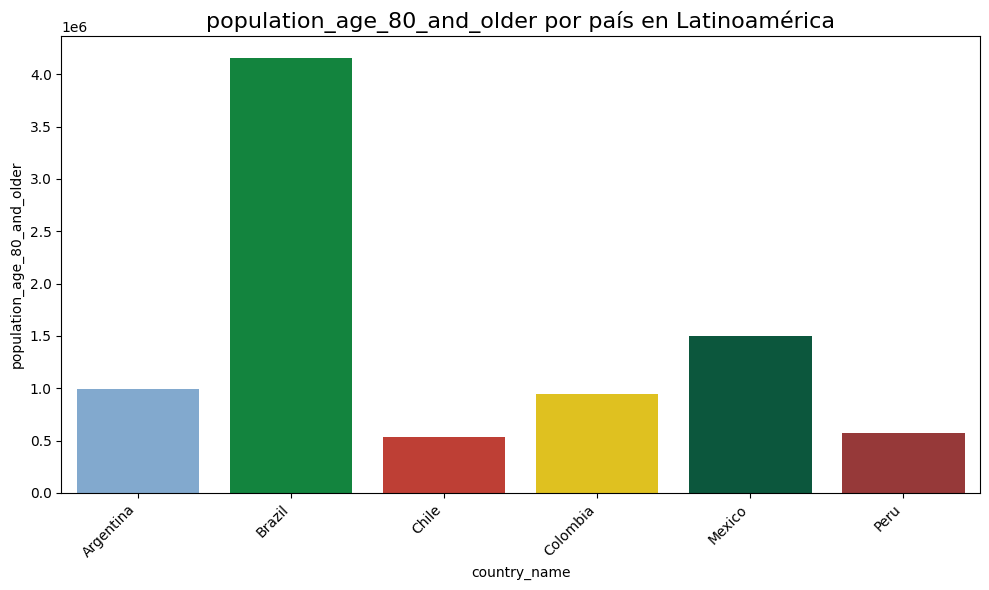

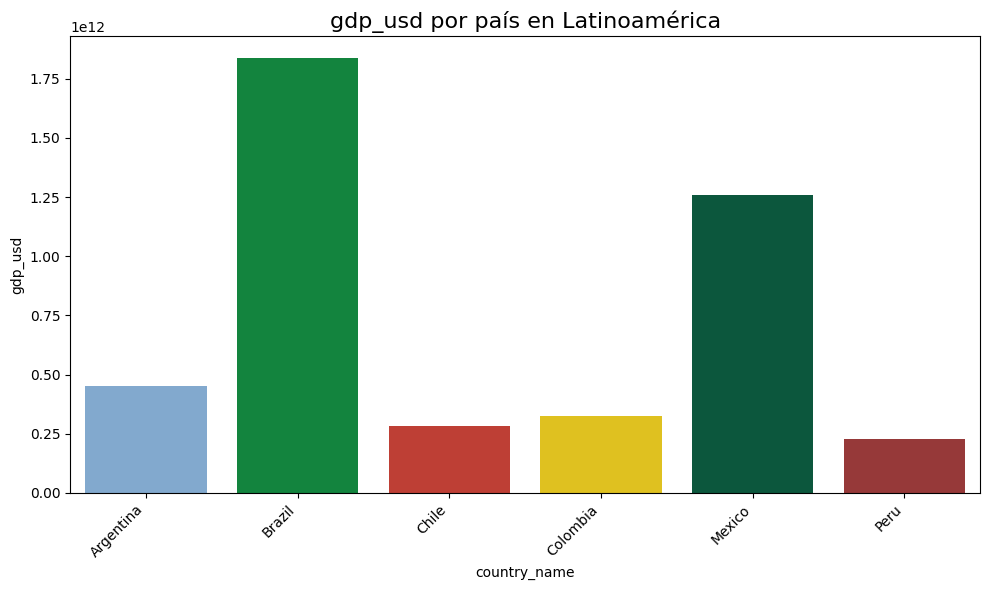

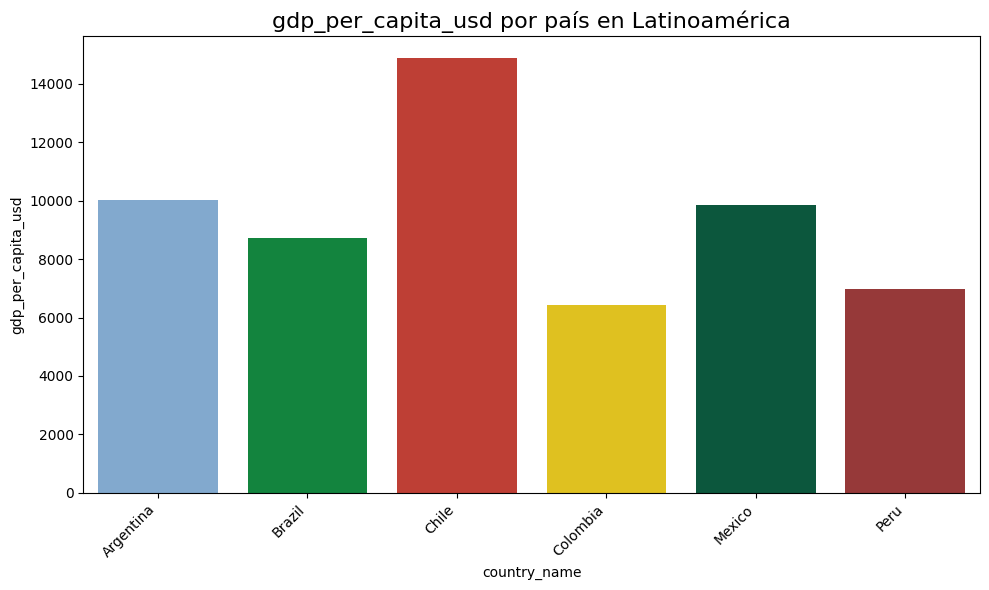

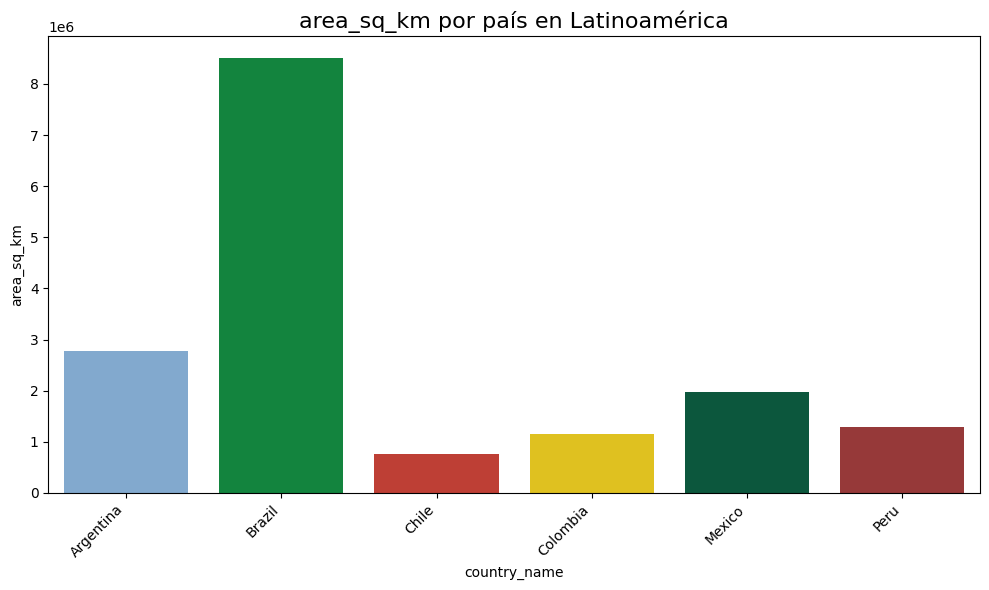

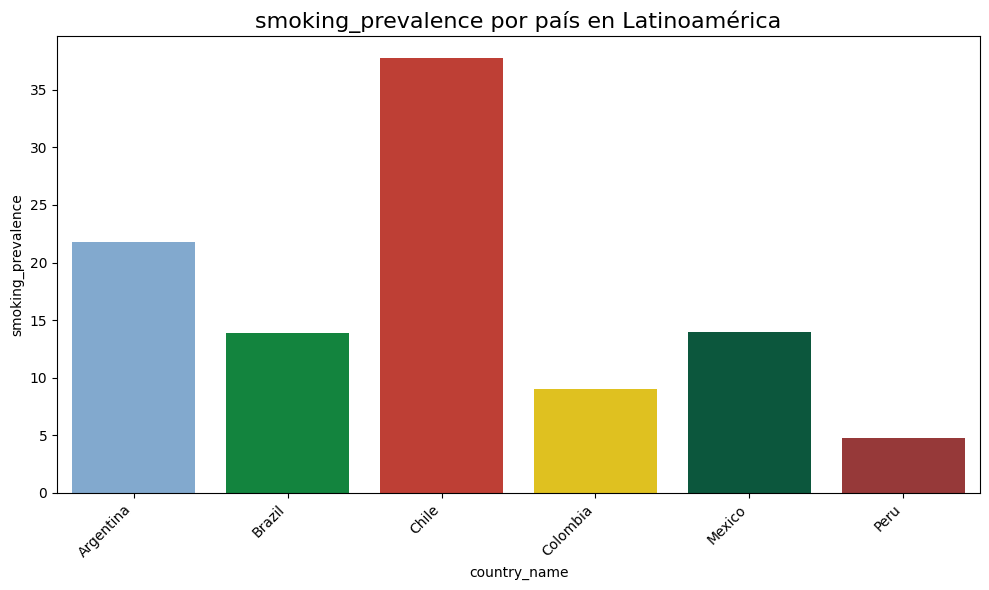

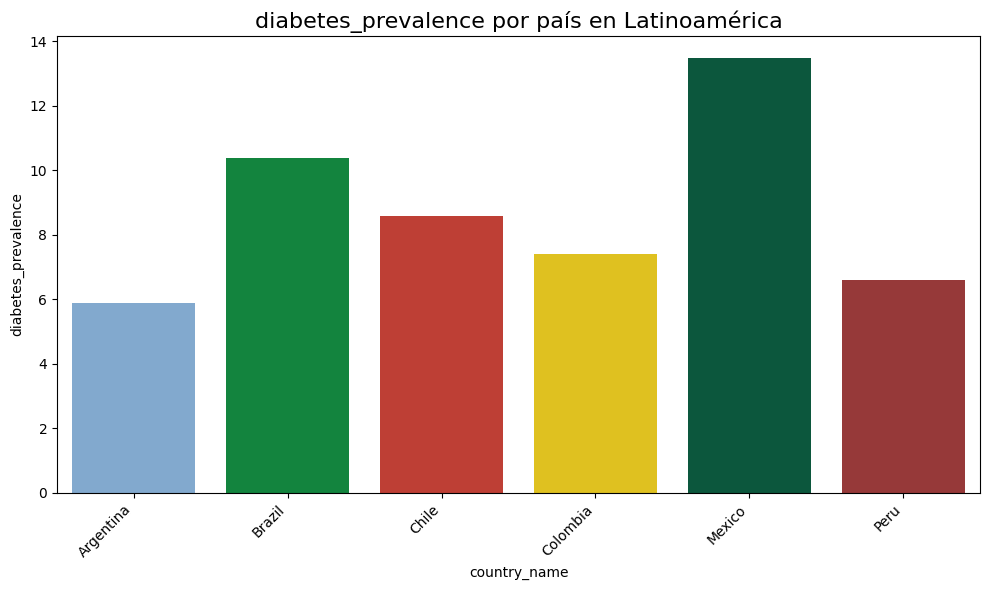

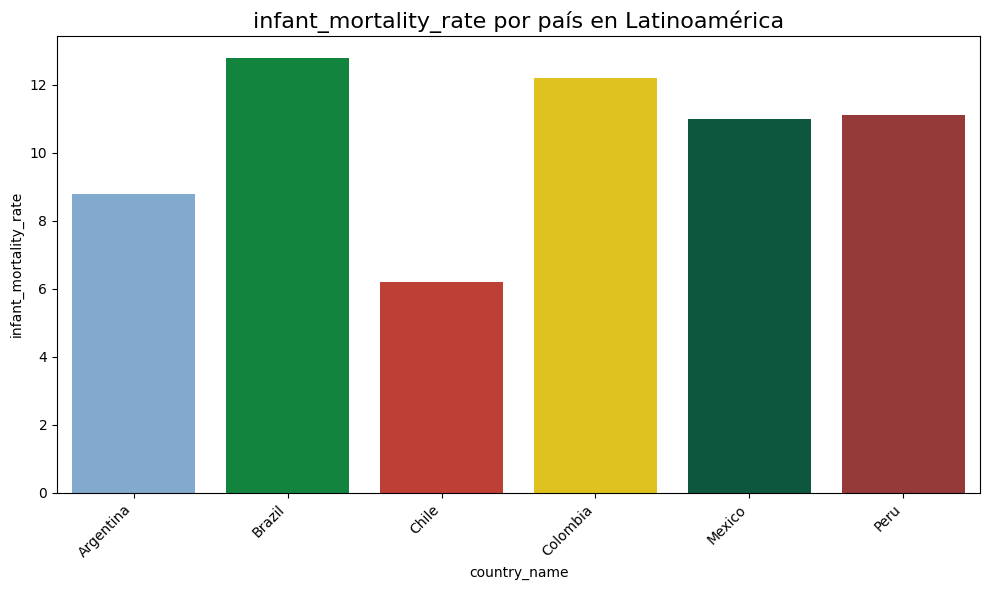

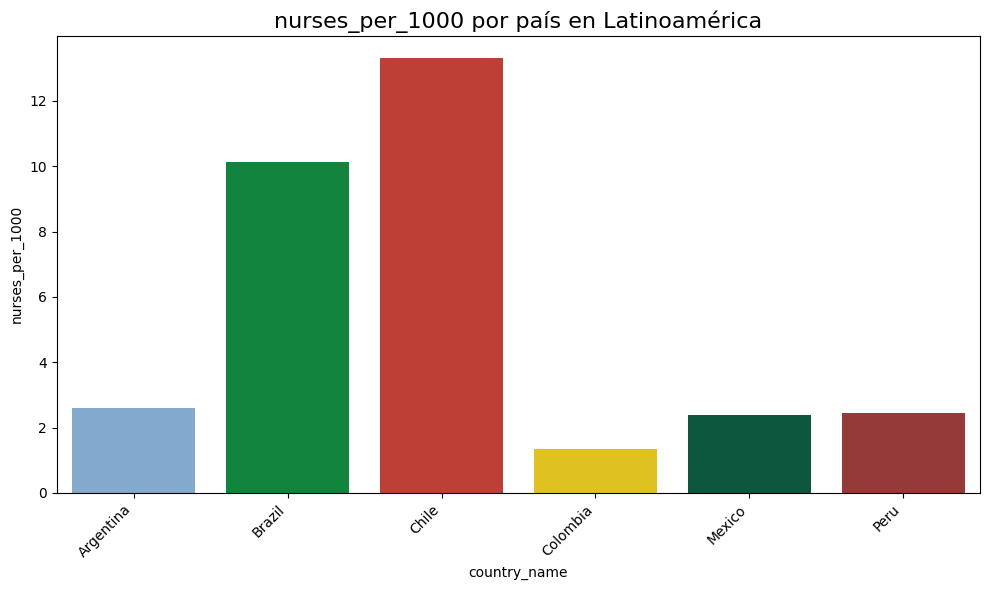

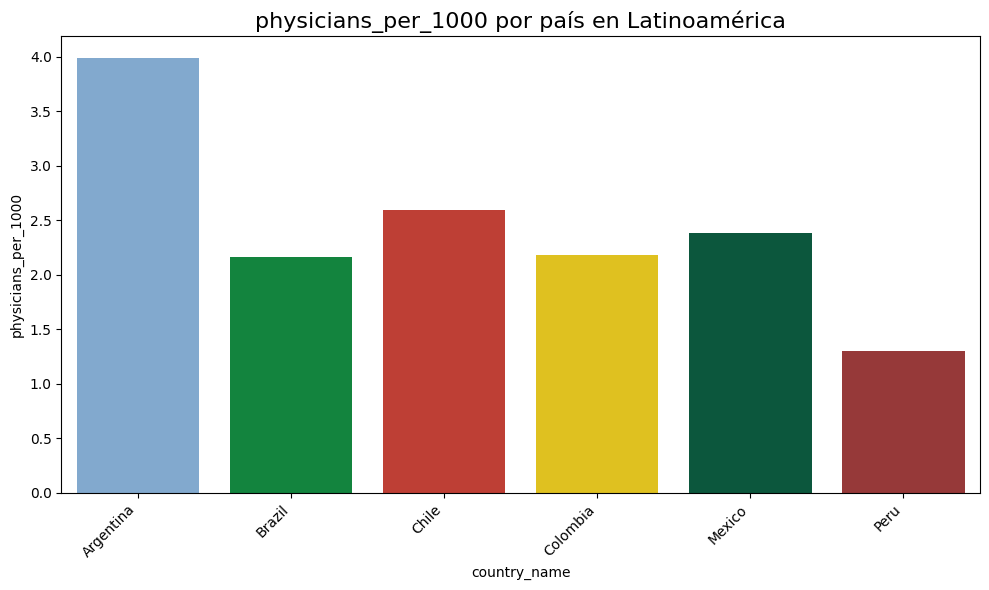

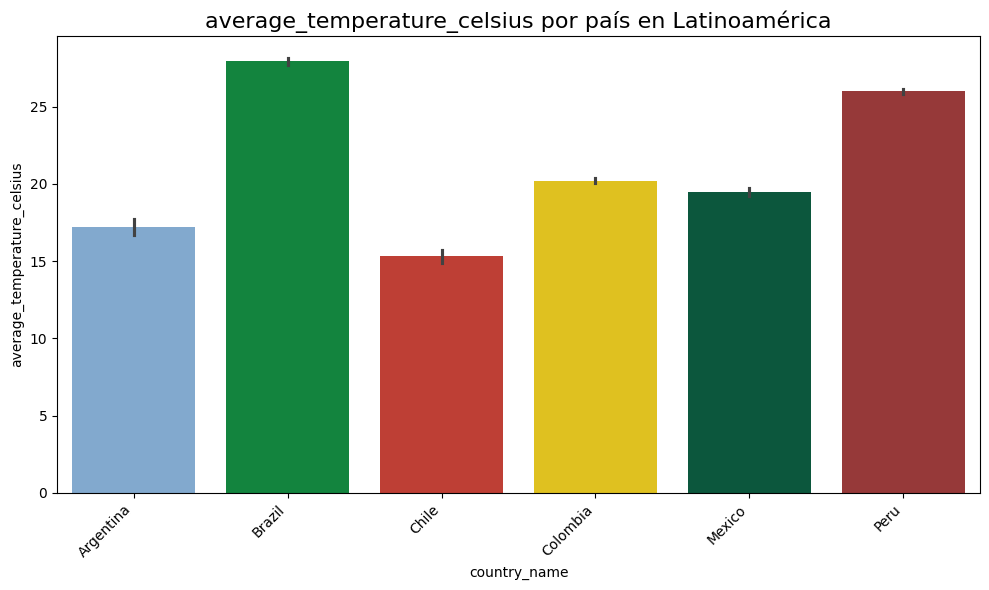

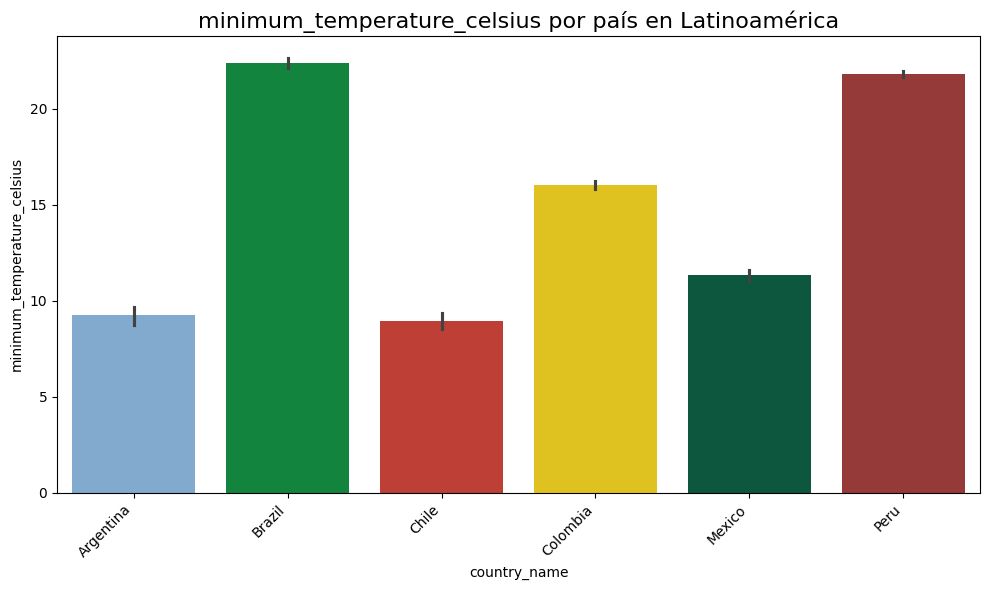

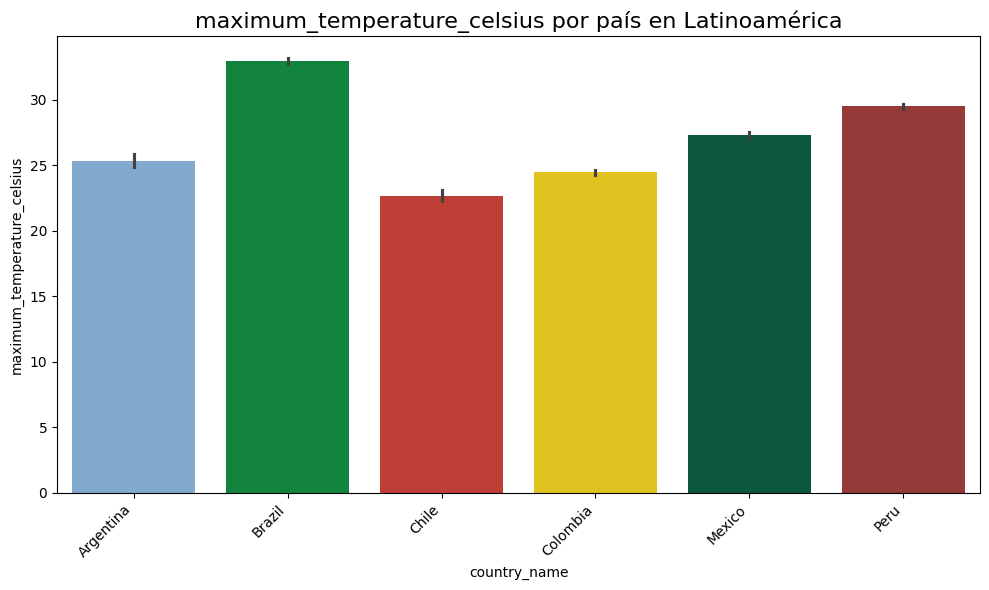

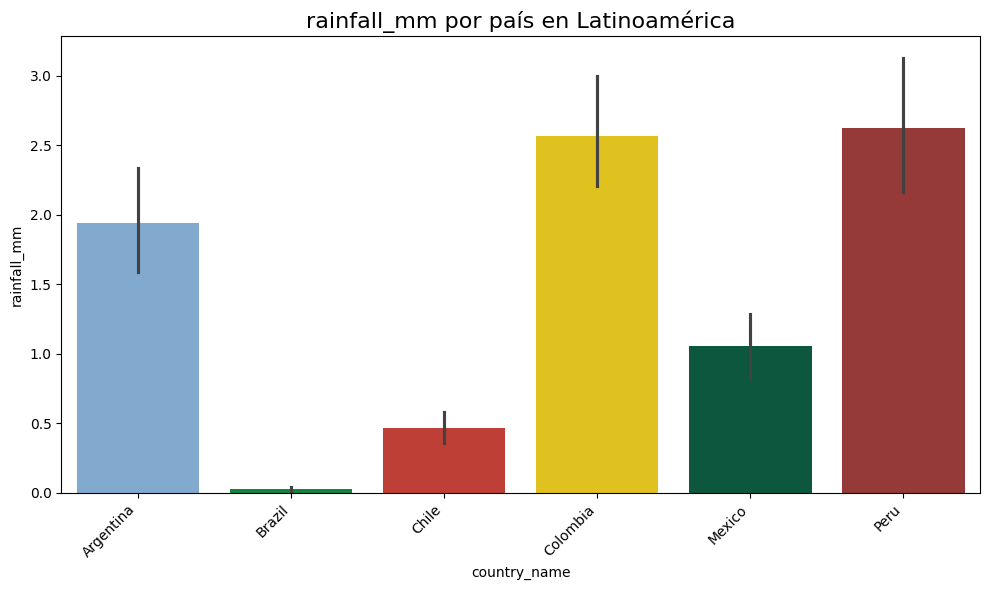

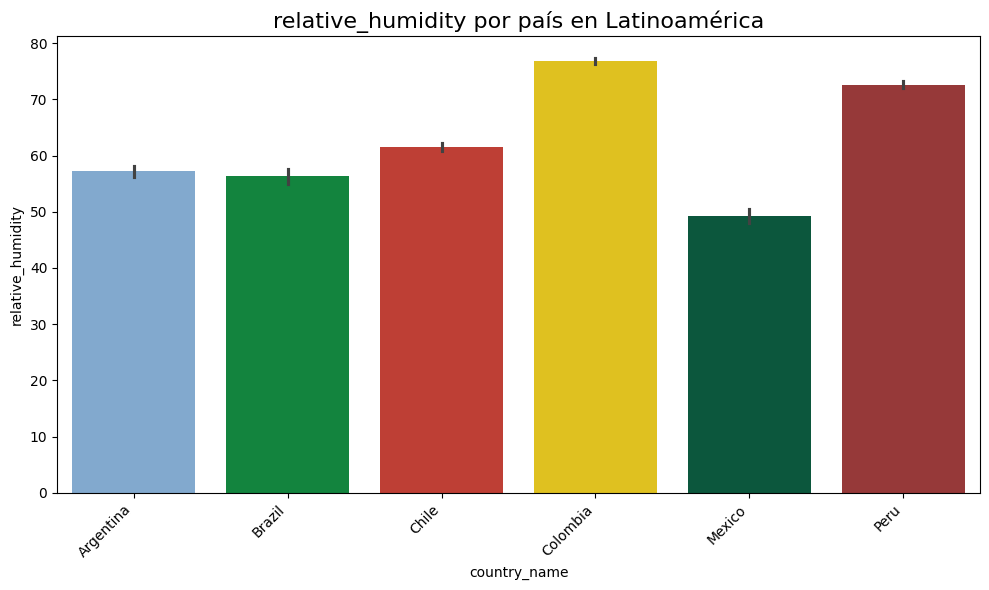

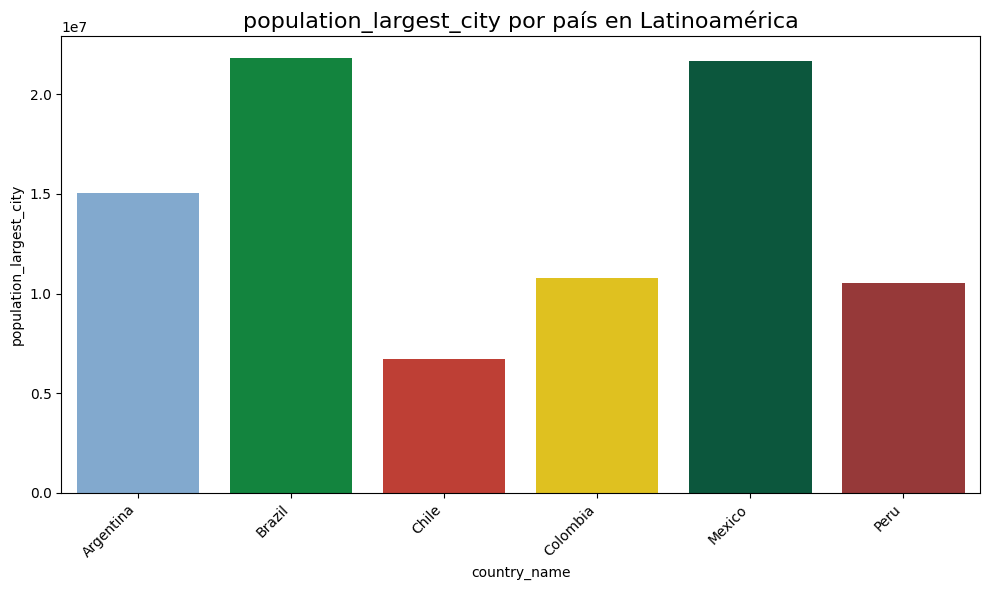

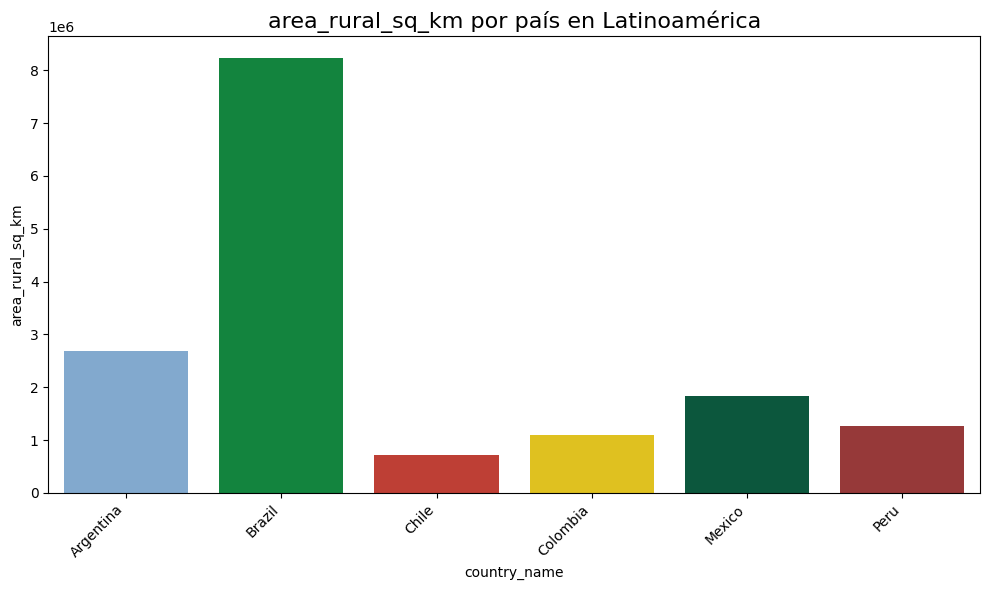

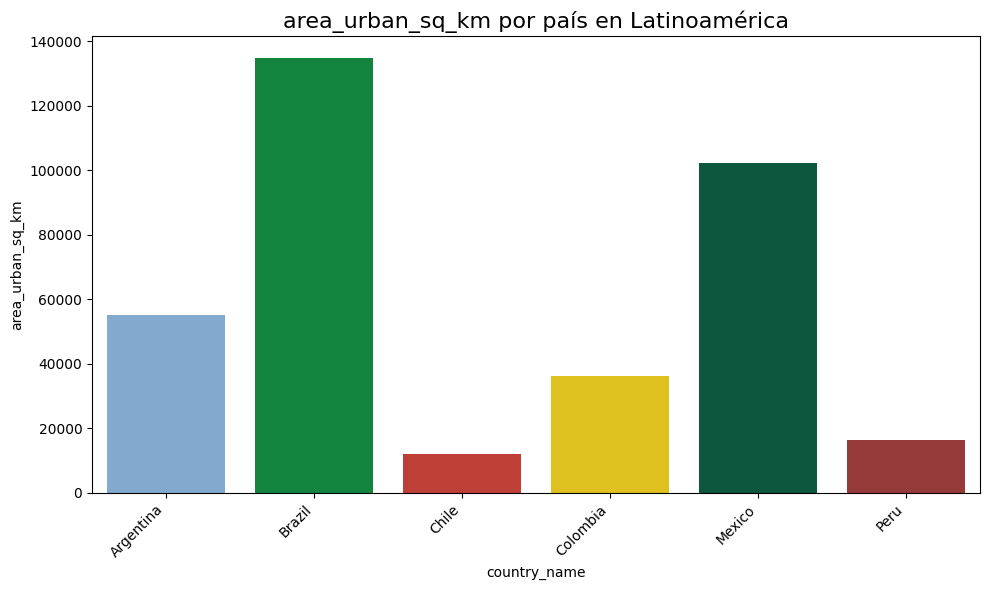

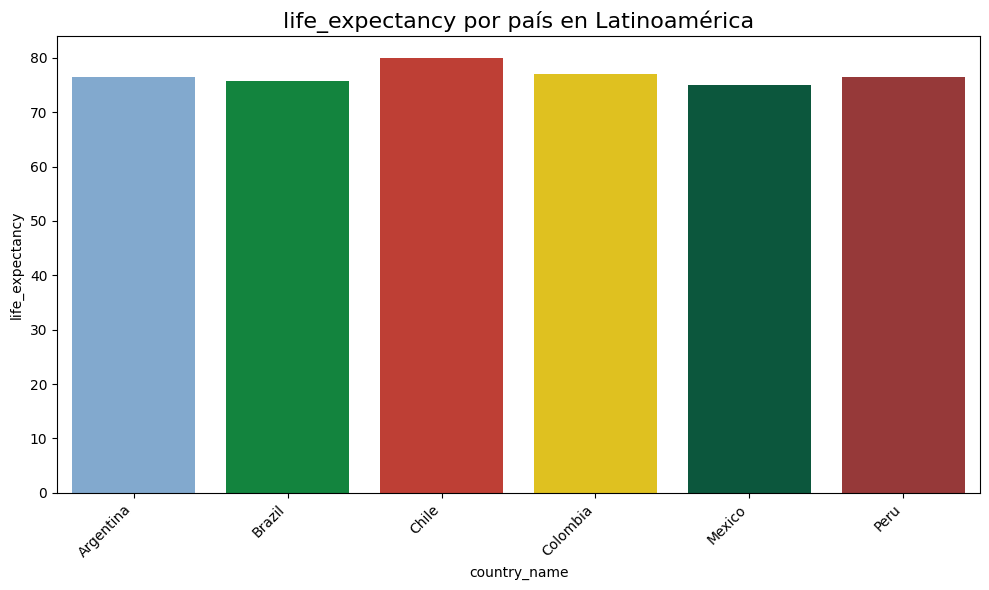

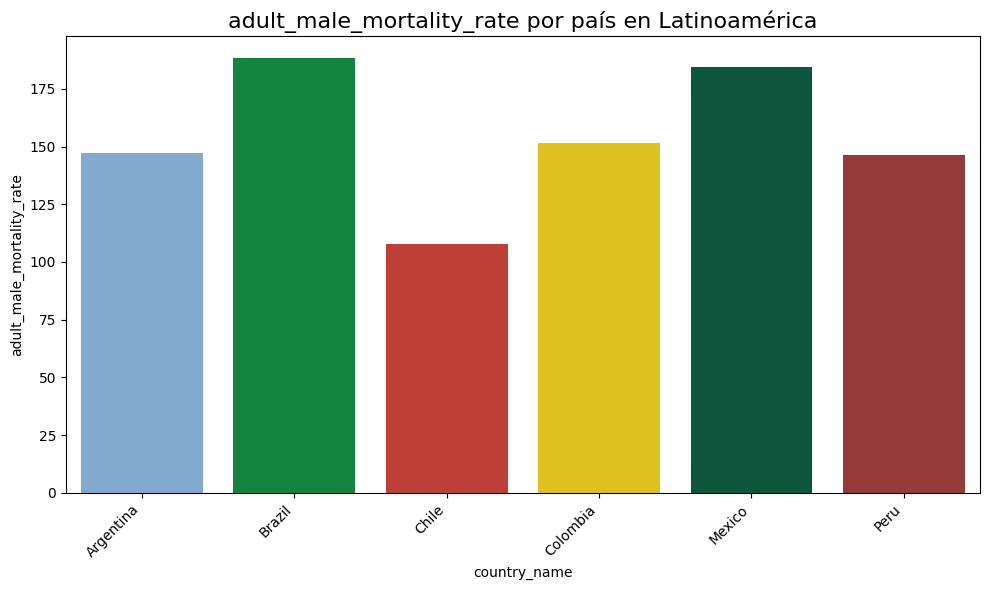

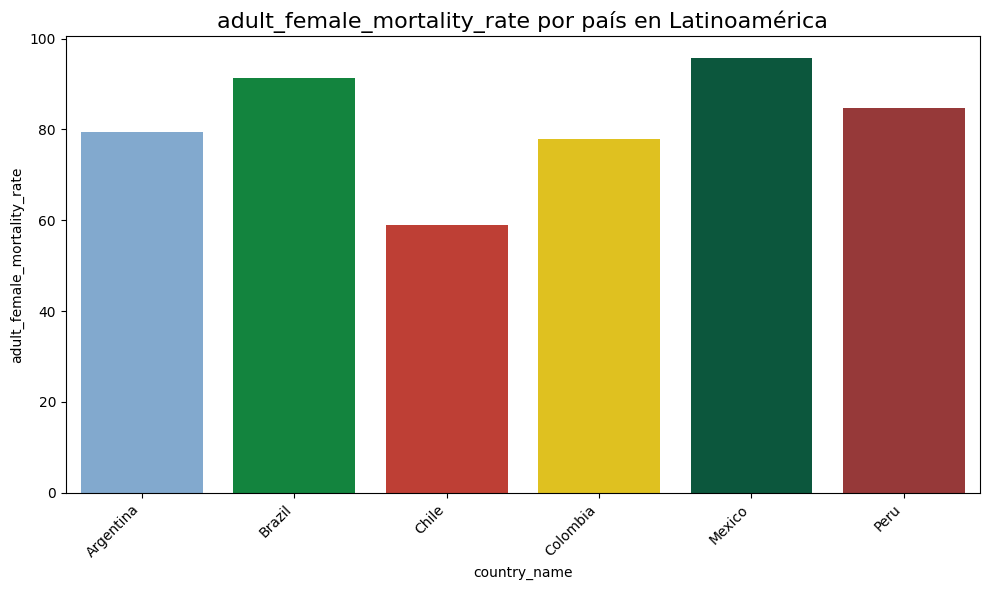

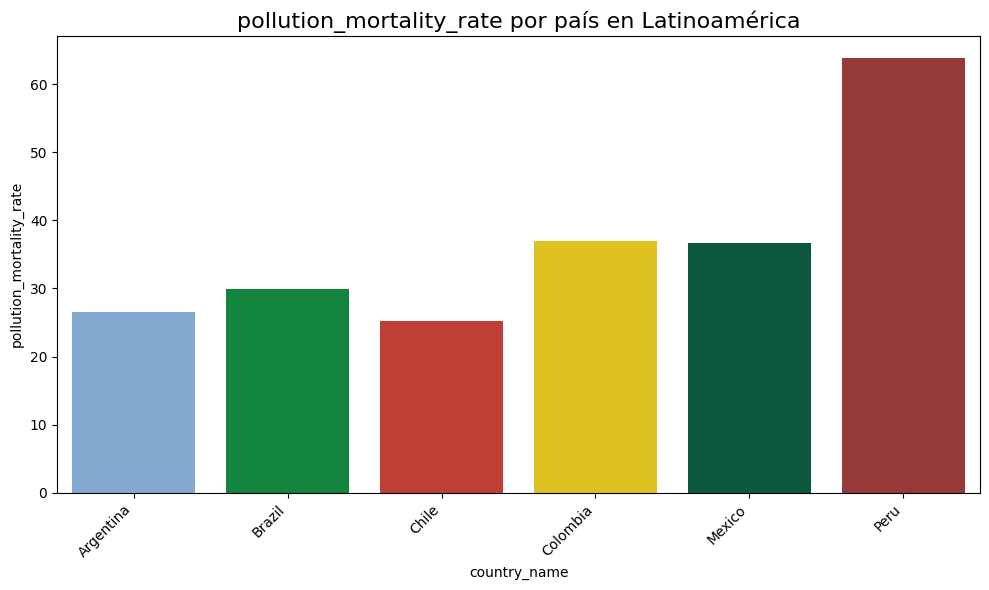

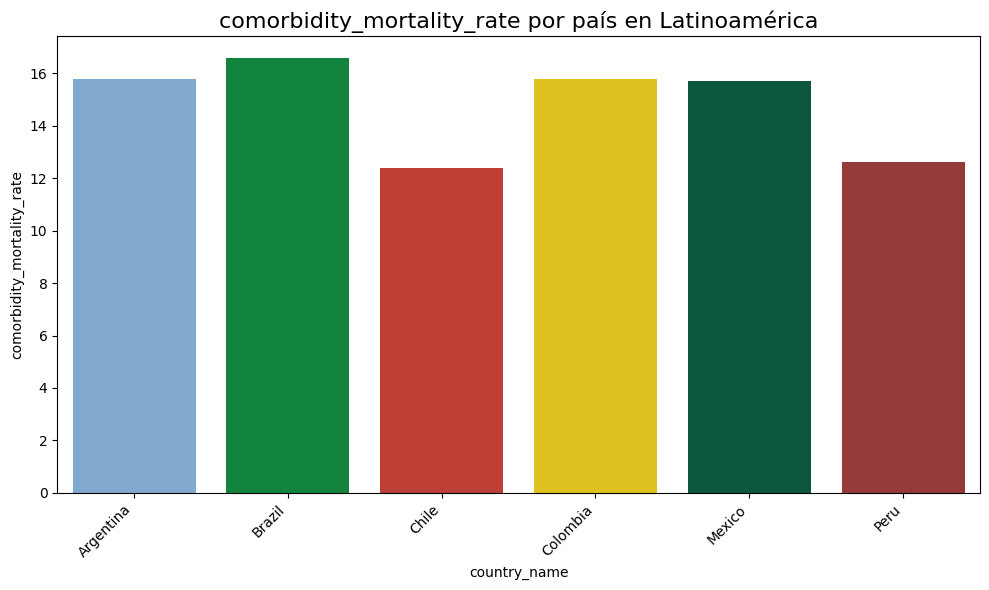

In [22]:
#Se crea un diccionario llamado custom_palette, donde cada país tiene un color específico basado en su bandera nacional.
custom_palette = {
    'Argentina': '#75AADB',   # Azul celeste y blanco (Argentina)
    'Brazil': '#009739',      # Verde y amarillo (Brasil)
    'Chile': '#D52B1E',       # Rojo, azul y blanco (Chile)
    'Colombia': '#FFD700',    # Amarillo, azul y rojo (Colombia)
    'Mexico': '#006341',      # Verde, blanco y rojo (México)
    'Peru': '#A52A2A'         # Rojo y blanco (Perú)
}
#Este bucle for recorre todas las columnas de data_latinoamerica_paises.
for i in data_latinoamerica_paises.columns:
    
    #Este bloque omite ciertas columnas que no son relevantes para la visualización (como las coordenadas o información acumulada).
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased',
                 'cumulative_recovered', 'cumulative_vaccine_doses_administered', 'new_recovered']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax, hue='country_name', palette=custom_palette, legend=False) #Se elimina la leyenda (legend=False) para evitar repeticiones.
        plt.title(f'{i} por país en Latinoamérica', fontsize=16)
        plt.xticks(rotation=45, ha='right')
             
        plt.tight_layout() #asegura que los elementos del gráfico no se superpongan.
        plt.show()


El ciclo for se utiliza para generar y mostrar gráficos de barras para cada columna en tu DataFrame, excluyendo las columnas específicas que no deseas graficar. Cada gráfico muestra cómo varía la variable correspondiente entre los países, utilizando una paleta de colores personalizada para distinguir visualmente entre ellos.

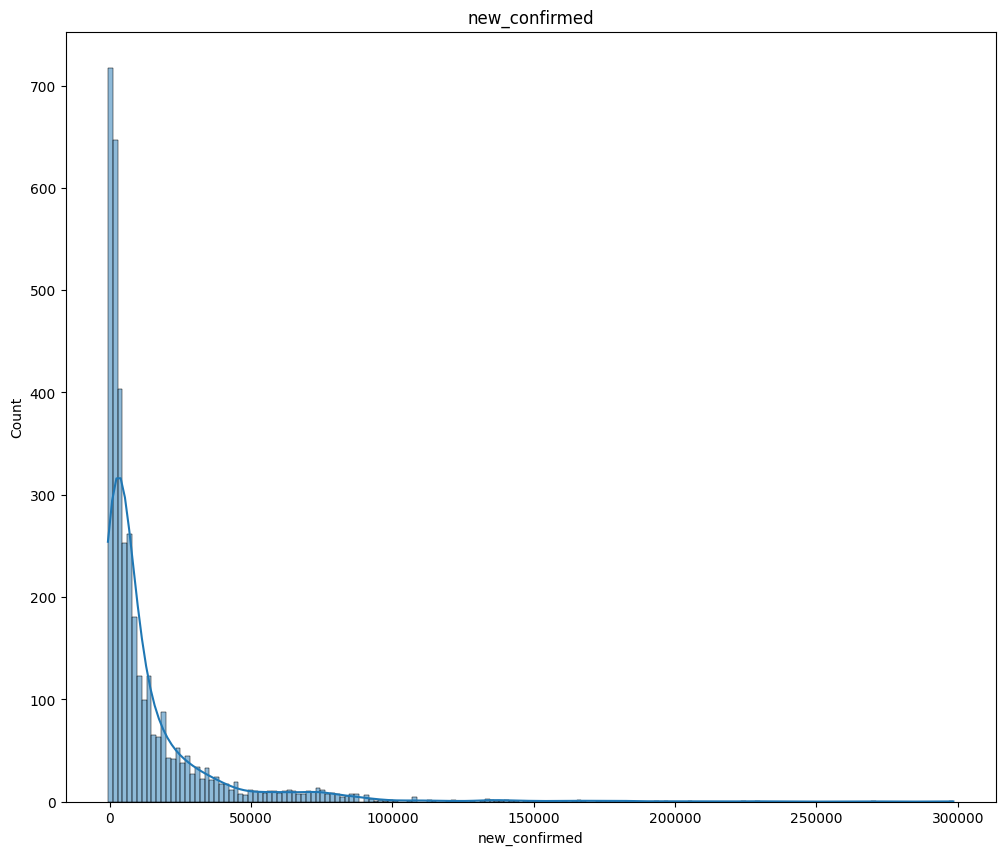

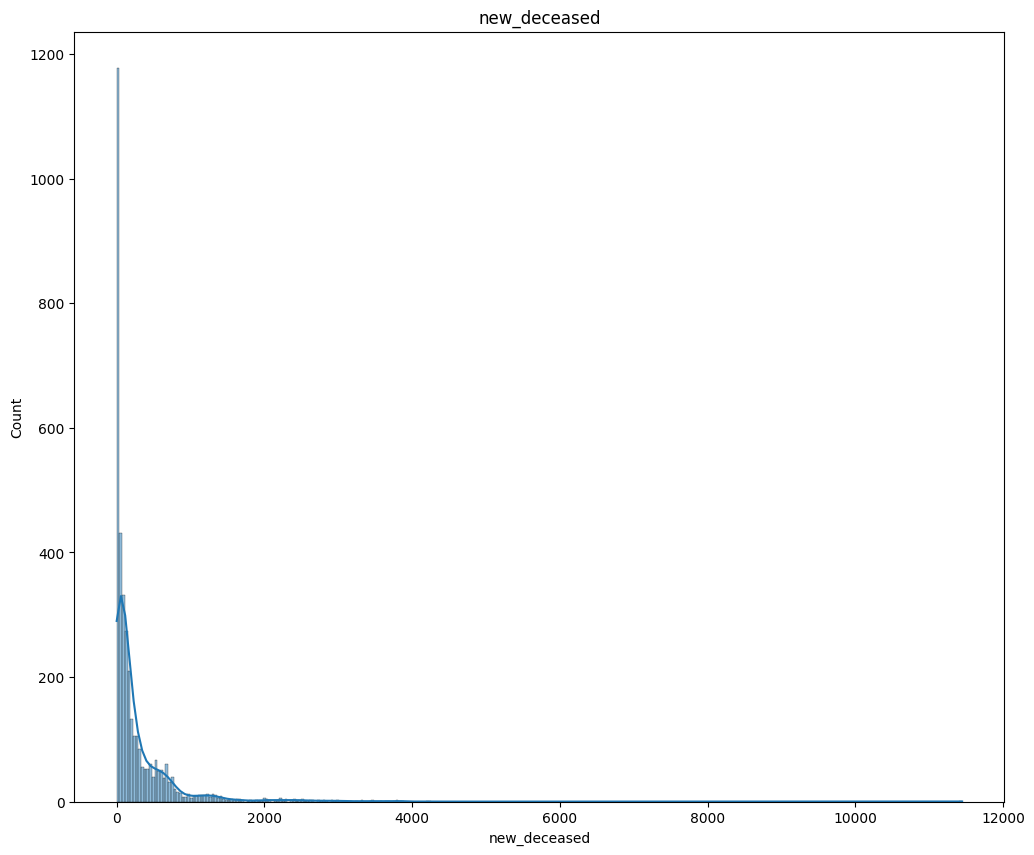

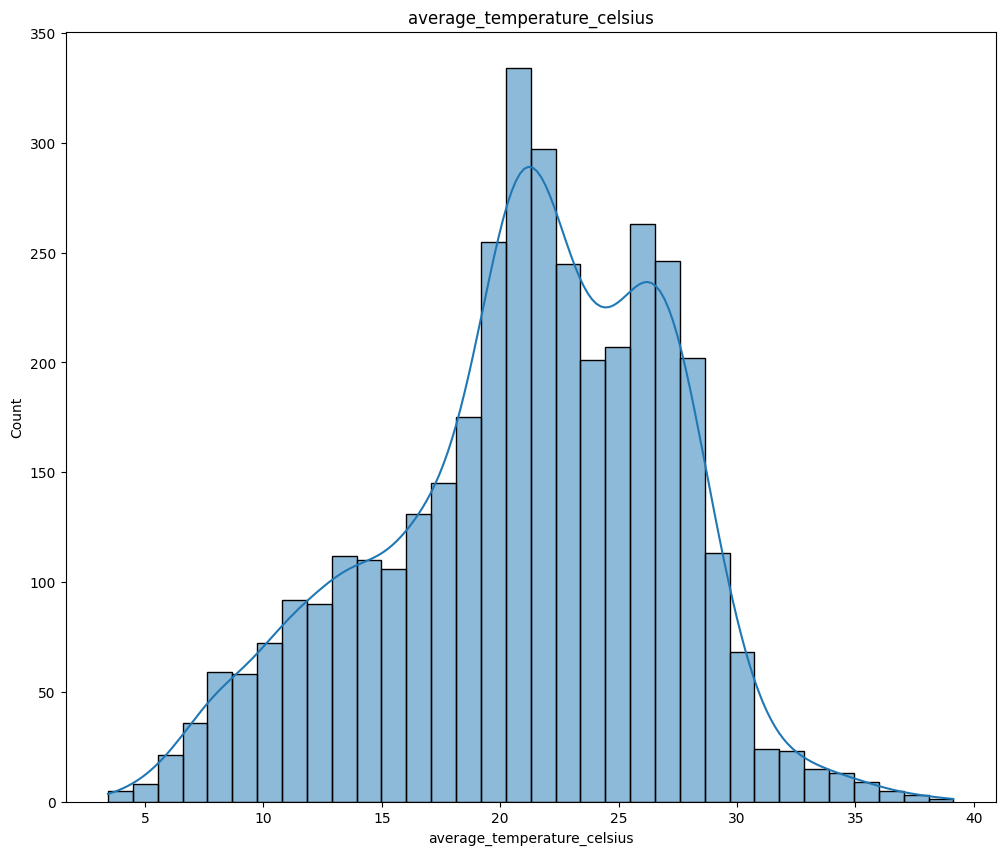

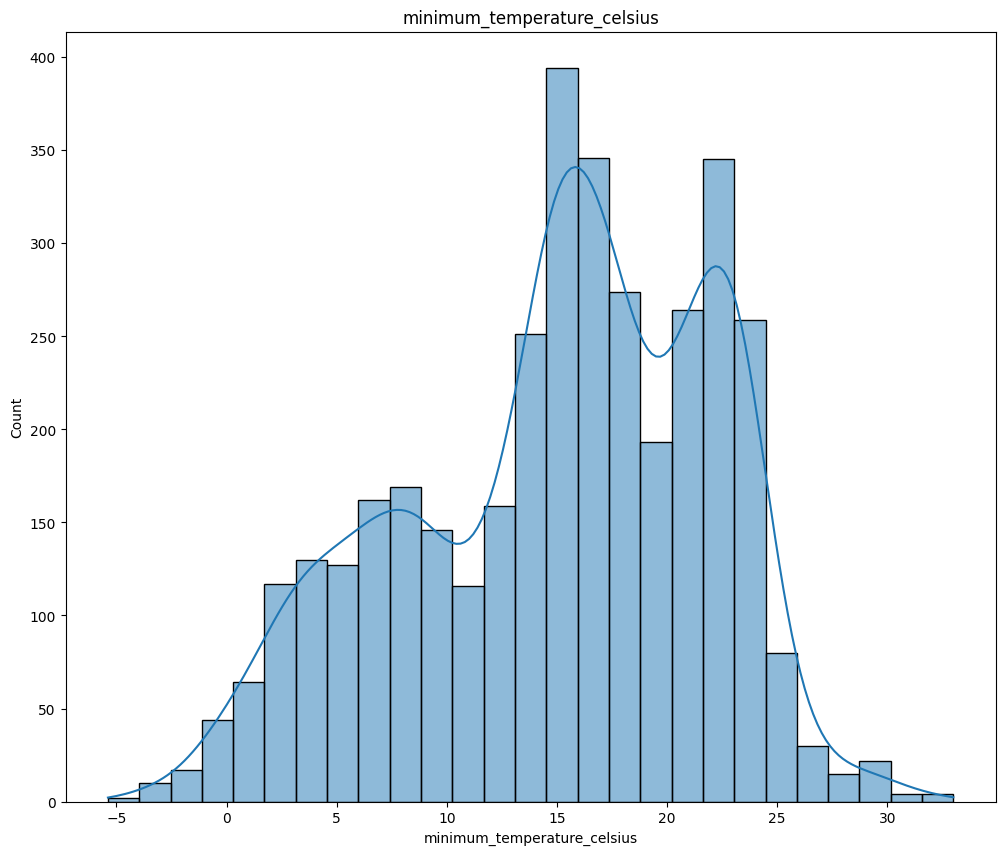

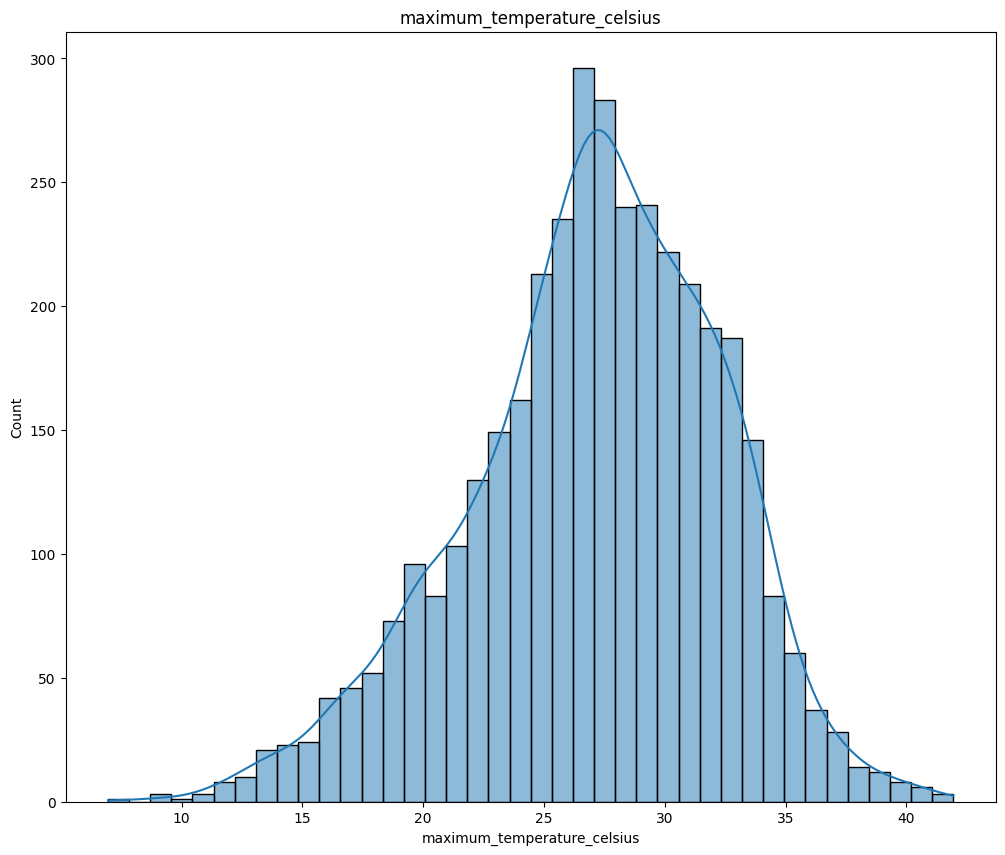

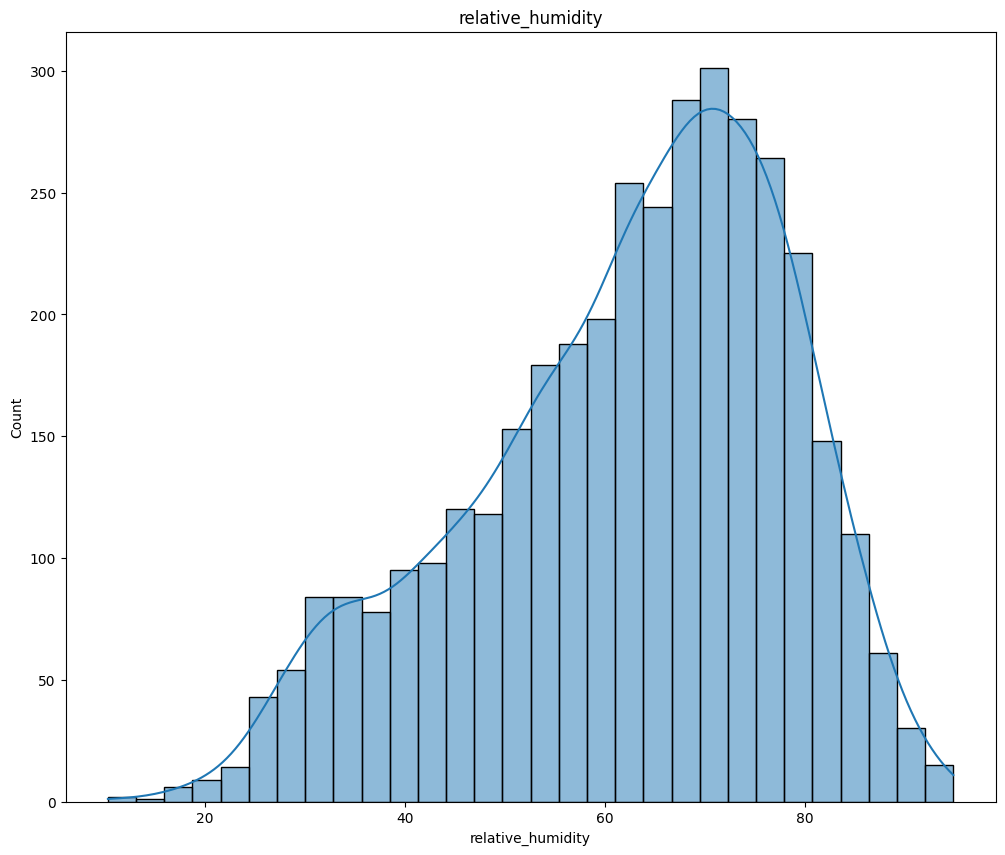

In [23]:
# Se crea una lista con las variables que serán visualizadas.
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]
# Crear histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered']: #Se excluyen columnas irrelevantes para el análisis, como claves de ubicación y coordenadas geográficas.
        fig, ax = plt.subplots(figsize=(12,10))
        sns.histplot(data_latinoamerica_paises[i], kde=True) #kde  una técnica utilizada para estimar la función de densidad de probabilidad de una variable continua
        plt.title(i)
        plt.show()

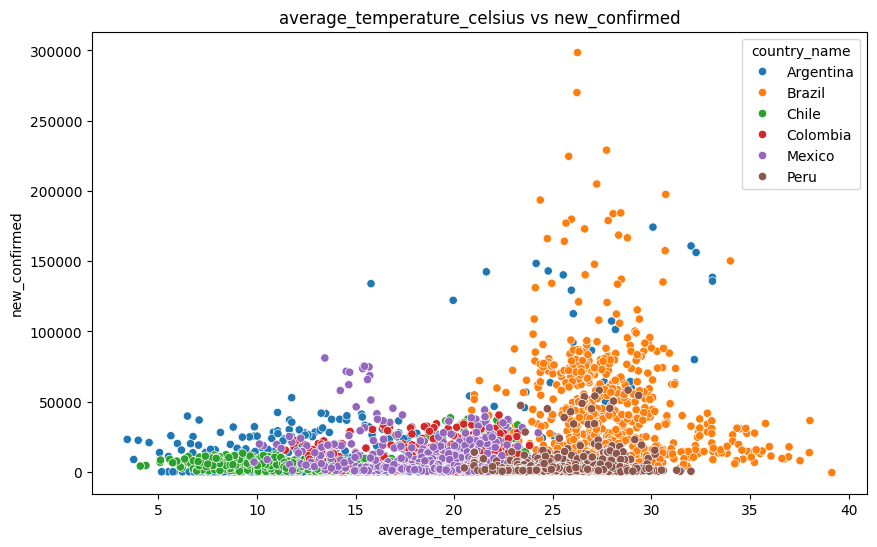

In [24]:
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

1. No existe una correlación lineal clara: No se observa una tendencia lineal directa entre la temperatura y el número de nuevos casos. Es decir, no podemos afirmar que a mayor          temperatura haya más casos, o viceversa.
2. Dispersión de datos: Los datos están muy dispersos, lo que indica que otros factores además de la temperatura influyen significativamente en el número de nuevos casos.
3. Superposición de datos: Los datos de los diferentes países se superponen considerablemente, lo que dificulta la identificación de patrones específicos para cada país.

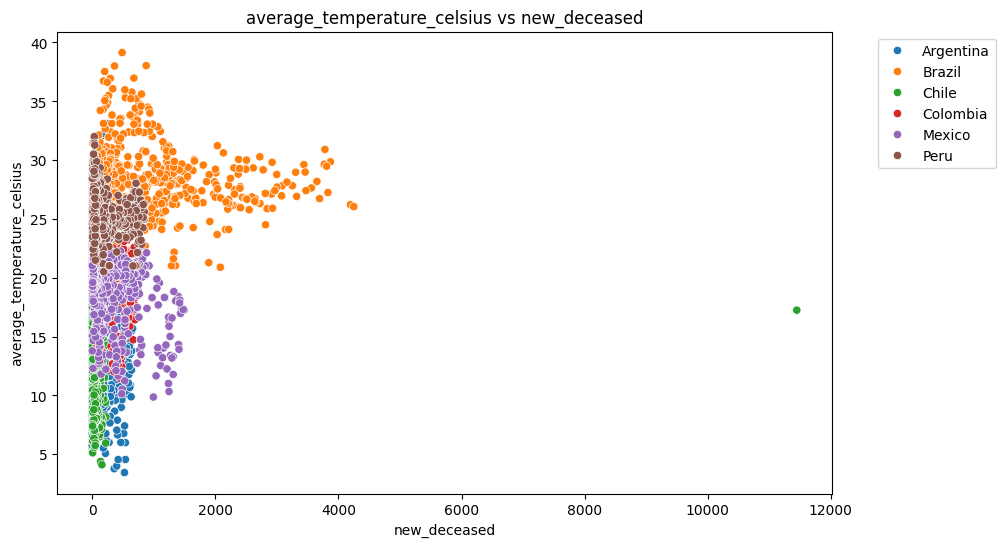

In [25]:
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1. Dispersión de Datos: Los datos están muy dispersos, lo que indica que la relación entre la temperatura y el número de fallecimientos no es sencilla.
2. Ausencia de una Relación Lineal Clara: No se aprecia una tendencia lineal directa entre la temperatura y el número de fallecimientos. Es decir, no podemos afirmar que a mayor temperatura haya más fallecimientos, o viceversa.
3. Concentración de Datos: La mayoría de los datos se concentran en la parte izquierda de la gráfica, donde el número de fallecimientos es menor. Esto sugiere que, al menos para los datos presentados, la temperatura no parece ser un factor determinante en un gran número de fallecimientos.
4. Valores Atípicos: Hay algunos puntos aislados que se alejan de la nube principal de datos, especialmente en el eje de los fallecimientos. Estos puntos podrían corresponder a eventos excepcionales o a errores en los datos

In [27]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

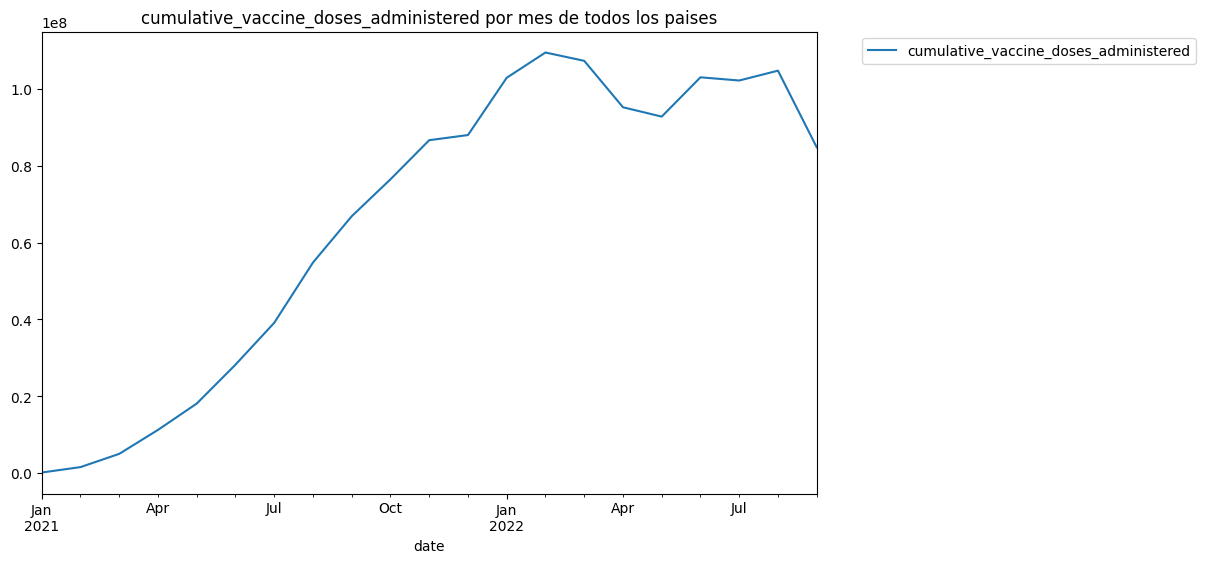

In [28]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

1. Aumento Progresivo: El gráfico muestra un aumento constante en el número de dosis administradas a lo largo del tiempo, lo que sugiere una expansión continua de las campañas de vacunación en todo el mundo.
2. Aceleración Inicial: En los primeros meses, se observa un crecimiento más gradual, pero a medida que avanzaba el tiempo, el ritmo de vacunación se aceleró, alcanzando picos en ciertos períodos.
3. Estabilización o Disminución: Hacia finales del período mostrado, la curva parece estabilizarse o incluso mostrar una ligera disminución. Esto podría indicar una saturación de la demanda de vacunas en algunas regiones o un cambio en las estrategias de vacunación.

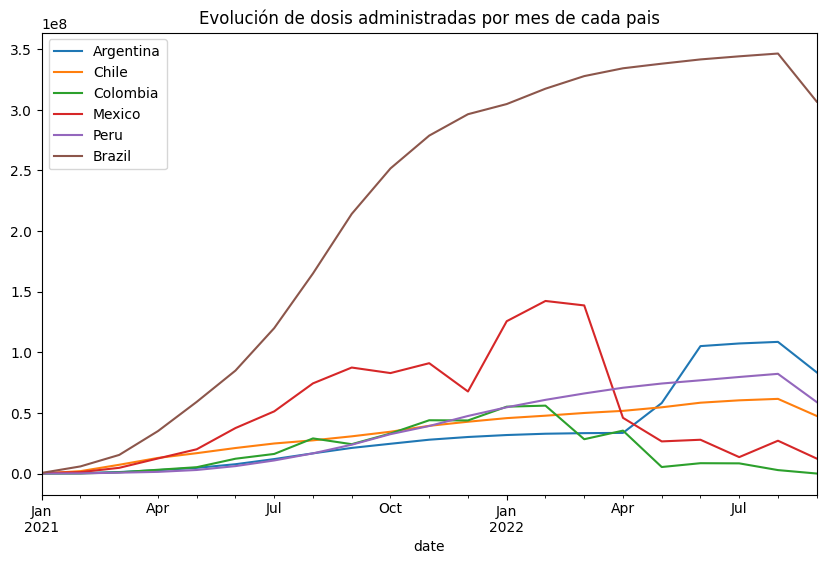

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

1. Aumento Progresivo: Todos los países muestran una tendencia general al alza en el número de dosis administradas, lo que indica un esfuerzo sostenido por vacunar a sus poblaciones.
2. Diferentes Ritmos de Vacunación: Si bien todos los países presentan un aumento, el ritmo de vacunación varía considerablemente entre ellos. Brasil, por ejemplo, muestra una curva de crecimiento más pronunciada y alcanza un número total de dosis significativamente mayor en comparación con los otros países.
3. Estabilización y Disminución: Algunos países, como México y Perú, experimentan una estabilización o incluso una ligera disminución en el ritmo de vacunación hacia finales del período analizado. Esto podría indicar una saturación de la demanda de vacunas en ciertas poblaciones o cambios en las estrategias de vacunación.
4. Variabilidad entre Países: Las curvas de cada país presentan diferentes patrones, lo que sugiere que factores específicos a cada contexto nacional, como la disponibilidad de vacunas, la organización de las campañas de vacunación, la confianza en las vacunas y las políticas gubernamentales, influyen en el ritmo de vacunación.

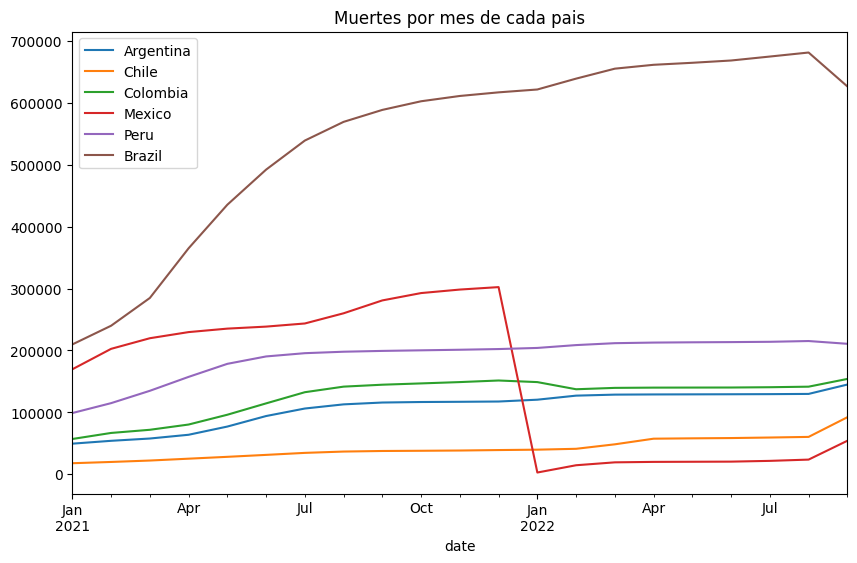

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

1. Tendencia Alcista Inicial: Al inicio del período analizado, todos los países muestran una tendencia al alza en el número de muertes, lo que sugiere una fase inicial de la pandemia con un aumento significativo en la mortalidad.
2. Estabilización y Disminución: A partir de mediados de 2021, se observa una tendencia a la estabilización o incluso una disminución en el número de muertes en la mayoría de los países, lo que indica un posible control de la pandemia gracias a medidas de salud pública, vacunación y la adquisición de inmunidad de población.
3. Diferentes Patrones: Los países presentan diferentes patrones de mortalidad, lo que sugiere la influencia de factores específicos a cada contexto nacional, como la densidad poblacional, la edad de la población, las condiciones socioeconómicas, las medidas de salud pública implementadas y la efectividad de las mismas.
4. Picos Epidémicos: Algunos países experimentan picos epidémicos más pronunciados y en diferentes momentos, lo que podría estar relacionado con la aparición de nuevas variantes del virus, la relajación de las medidas de control o eventos estacionales.

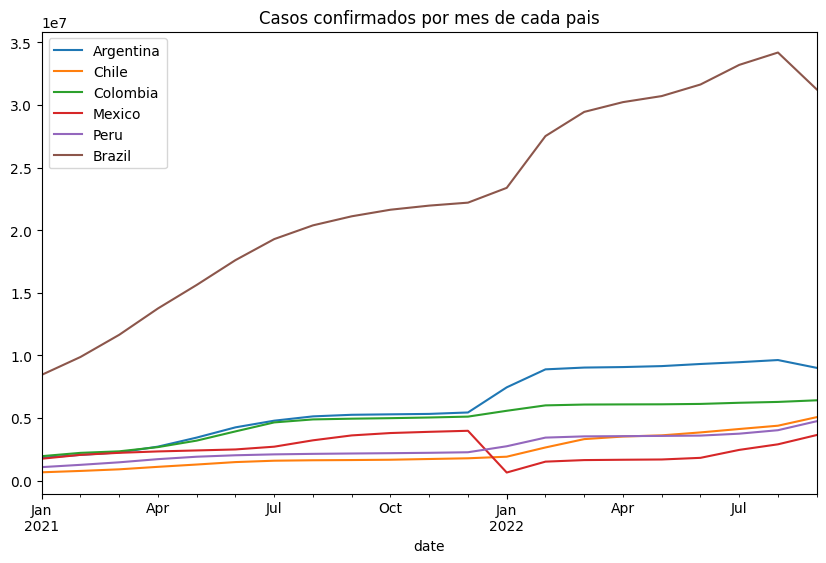

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

1. Aumento Progresivo Inicial: Al inicio del período analizado, todos los países muestran una tendencia al alza en el número de casos confirmados, lo que refleja la propagación inicial de la pandemia en la región.
2. Picos Epidémicos: Se observan picos epidémicos en diferentes momentos para cada país, indicando olas de contagios que pueden estar relacionadas con la relajación de medidas, la aparición de nuevas variantes o factores estacionales.
3. Estabilización y Disminución: A partir de mediados de 2021, algunos países muestran una tendencia a la estabilización o incluso una disminución en el número de casos, lo que sugiere un posible control de la pandemia gracias a medidas de salud pública, vacunación y la adquisición de inmunidad de población.
4. Diferentes Patrones: Los países presentan diferentes patrones de contagio, lo que sugiere la influencia de factores específicos a cada contexto nacional, como la densidad poblacional, las condiciones socioeconómicas, las medidas de salud pública implementadas y la efectividad de las mismas.
5. Brasil como Epicentro: Brasil destaca por tener el mayor número de casos acumulados, lo que lo convierte en el país más afectado por la pandemia en la región.

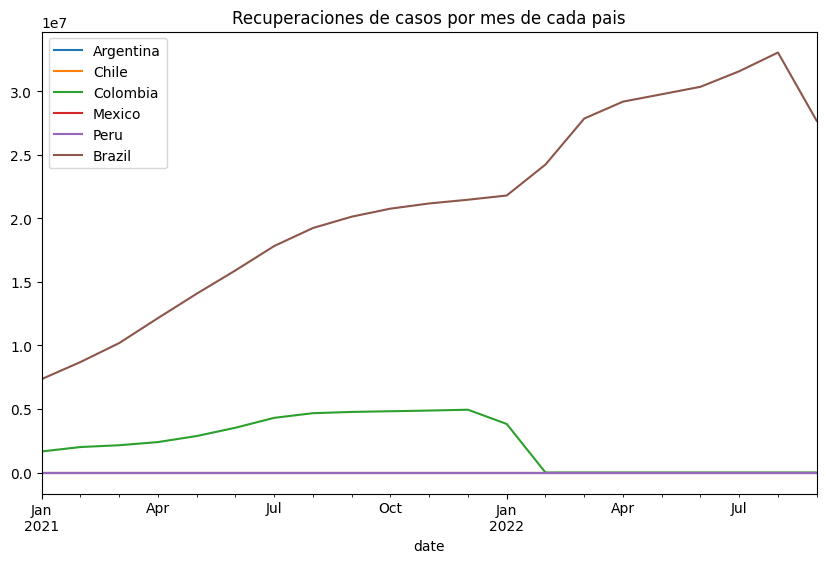

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

1. Aumento Progresivo Inicial: Al igual que en los casos confirmados y muertes, al inicio del período analizado, todos los países muestran una tendencia al alza en el número de recuperaciones, lo que refleja la evolución natural de la enfermedad y la respuesta del sistema de salud.
2. Estabilización y Disminución: A partir de mediados de 2021, algunos países, como Colombia y Perú, experimentan una estabilización o incluso una disminución en el número de recuperaciones. Esto podría indicar un menor número de nuevos casos, una mayor letalidad o cambios en los criterios de registro de recuperaciones.
3. Diferentes Patrones: Los países presentan diferentes patrones de recuperación, lo que sugiere la influencia de factores específicos a cada contexto nacional, como la calidad de la atención médica, la disponibilidad de tratamientos y la capacidad de los sistemas de salud.
4. Brasil como Líder en Recuperaciones: Brasil, al ser el país con mayor número de casos, también presenta el mayor número de recuperaciones, lo que refleja la magnitud de la epidemia en este país.

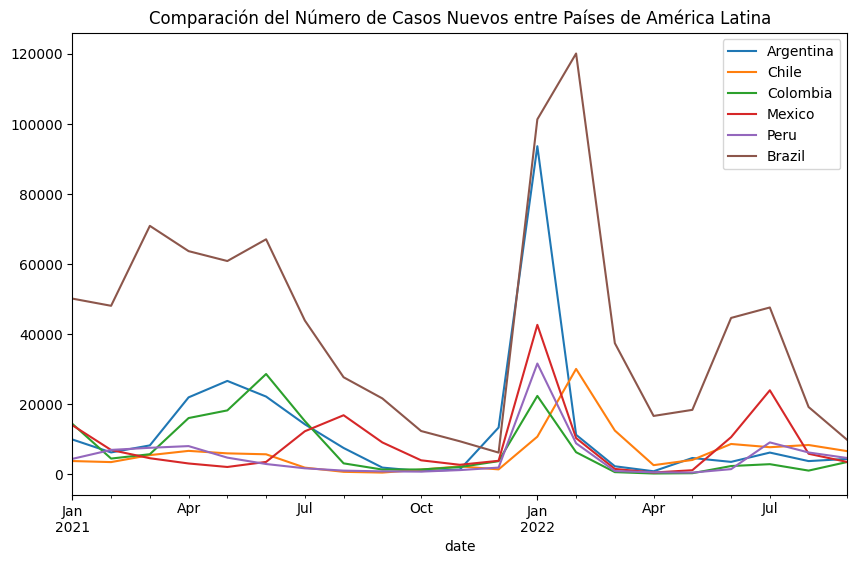

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

1. Múltiples Olas Epidémicas: Todos los países muestran múltiples picos epidémicos a lo largo del período, lo que indica la presencia de varias olas de contagio. Estos picos pueden estar relacionados con la relajación de medidas, la aparición de nuevas variantes, eventos estacionales o una combinación de estos factores.
2. Sincronía y Asincronía: Si bien todos los países experimentan olas epidémicas, estas no ocurren de manera sincronizada. Algunos países alcanzan sus picos en diferentes momentos, lo que sugiere que factores locales influyen en la dinámica de la epidemia.
3. Disminución General: A pesar de las múltiples olas, se observa una tendencia general a la disminución en el número de casos nuevos a lo largo del tiempo, lo que indica un control progresivo de la pandemia en la región.
4. Variabilidad entre Países: Los países presentan diferentes patrones de contagio, lo que sugiere la influencia de factores específicos a cada contexto nacional, como la densidad poblacional, las condiciones socioeconómicas, las medidas de salud pública implementadas y la efectividad de las mismas.
5. Brasil como País con Mayor Número de Casos: Brasil se destaca por presentar, en general, un mayor número de casos nuevos en comparación con los otros países, lo que refleja la magnitud de la epidemia en este paí

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

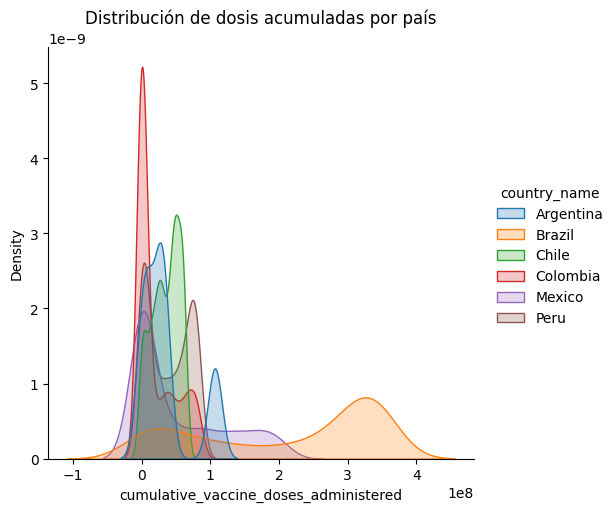

In [34]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

1. Gran Dispersión de Datos: La gráfica muestra una gran dispersión de los datos, lo que indica una variabilidad significativa en el número de dosis administradas por país. Esto sugiere que la implementación de las campañas de vacunación ha sido desigual en la región.
2. Brasil Destaca por su Volumen: Brasil presenta una distribución centrada en un valor mucho mayor de dosis administradas en comparación con los otros países. Esto sugiere que Brasil ha llevado a cabo una campaña de vacunación más extensa y rápida.
3. Similitudes en Patrones: A pesar de las diferencias en el volumen total de dosis, algunos países como Argentina y Chile muestran patrones de distribución similares, lo que podría indicar estrategias de vacunación compartidas o factores comunes que influyen en la implementación.
4. Colas Largas en Algunas Distribuciones: La presencia de colas largas en algunas distribuciones, como en el caso de Brasil, sugiere que existe una proporción significativa de la población en estos países que ha recibido un número considerablemente mayor de dosis.

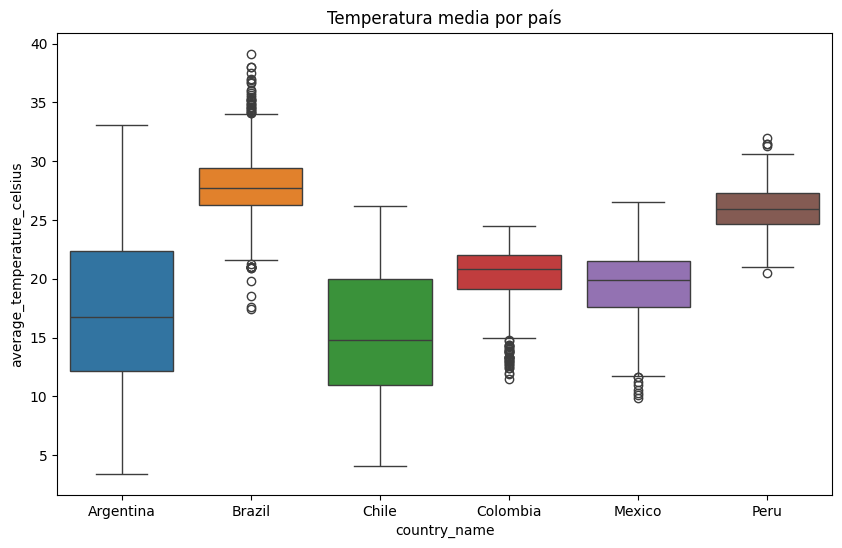

In [35]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

1. Tendencia general: Podemos observar que Brasil y Perú tienden a tener temperaturas promedio más altas en comparación con los otros países. Por otro lado, Argentina y Chile muestran temperaturas promedio más bajas.
2. Rango de temperaturas: La altura de cada caja nos da una idea del rango intercuartílico, que es el rango de temperaturas que contiene el 50% de los datos. Las cajas más altas indican un rango de temperaturas más amplio.lots.

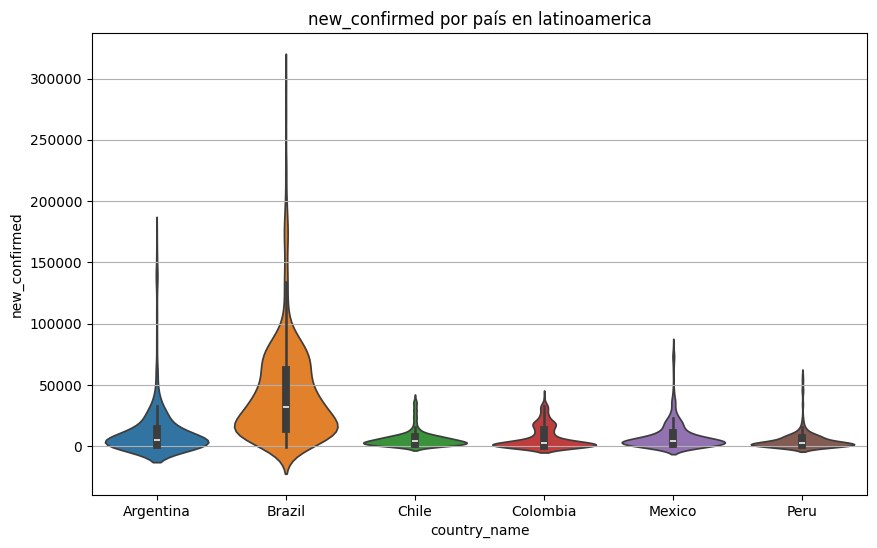

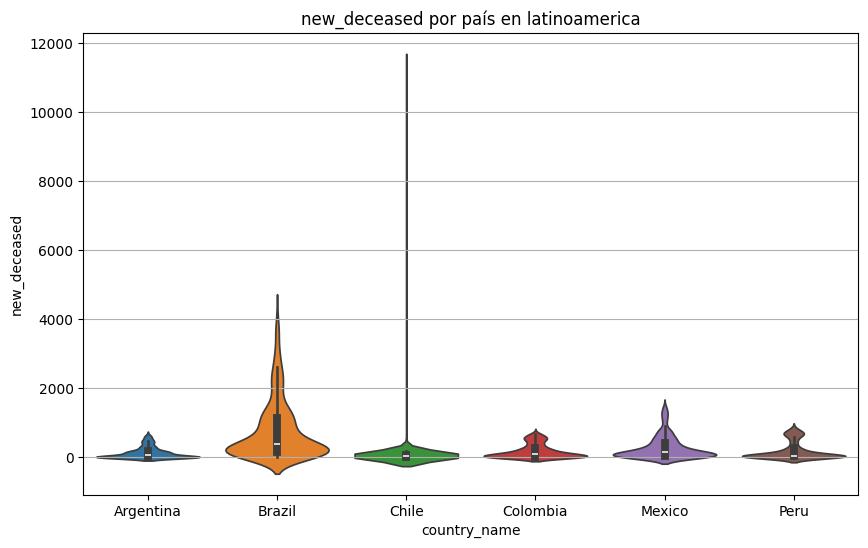

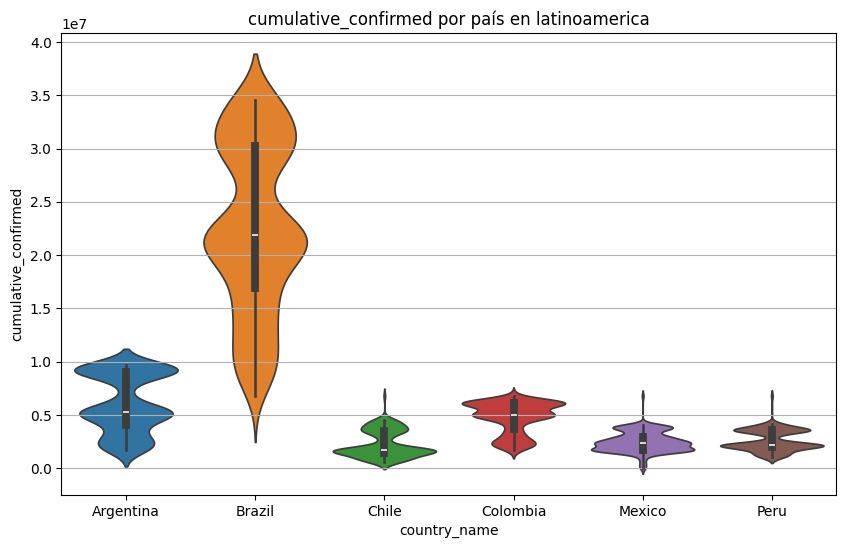

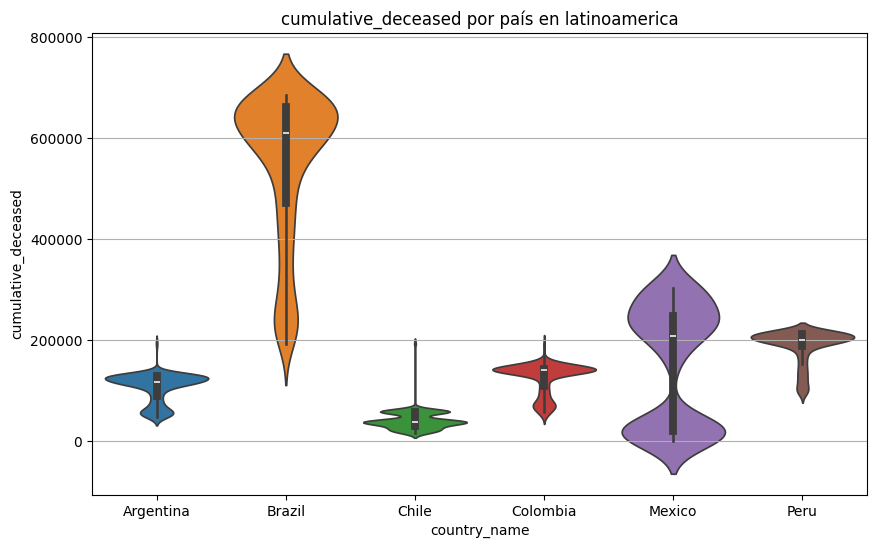

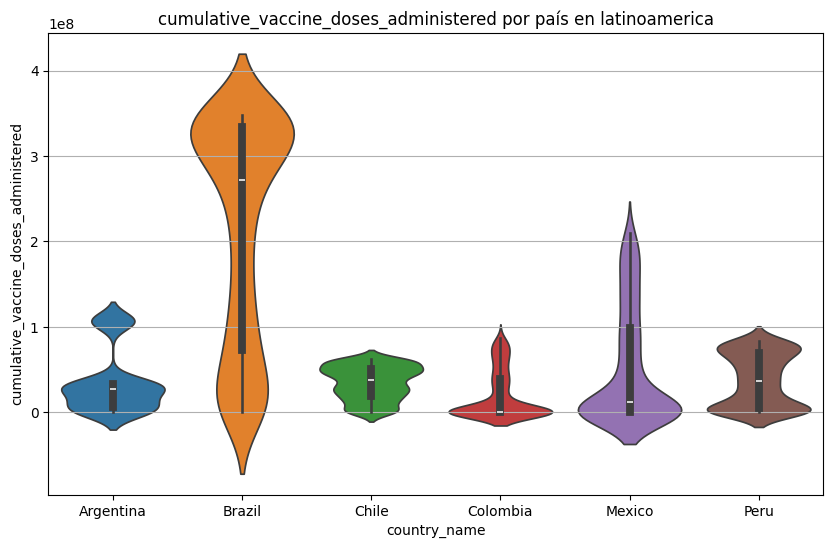

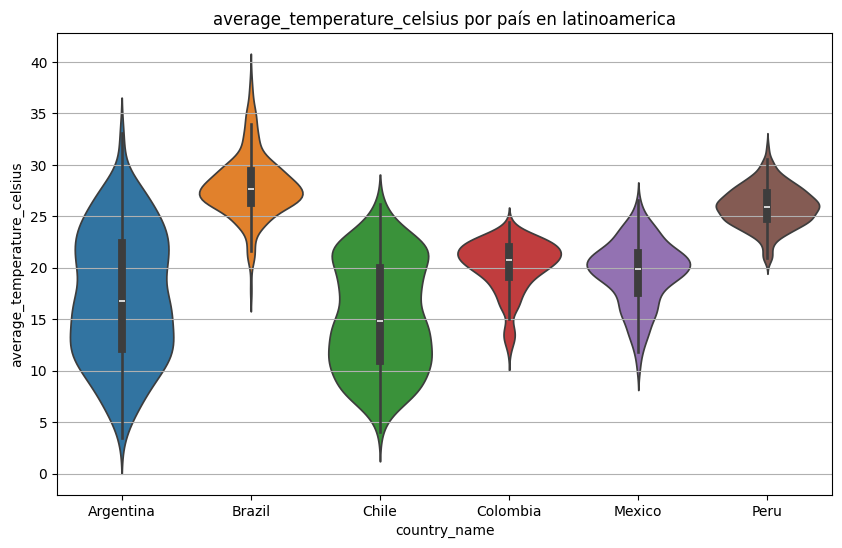

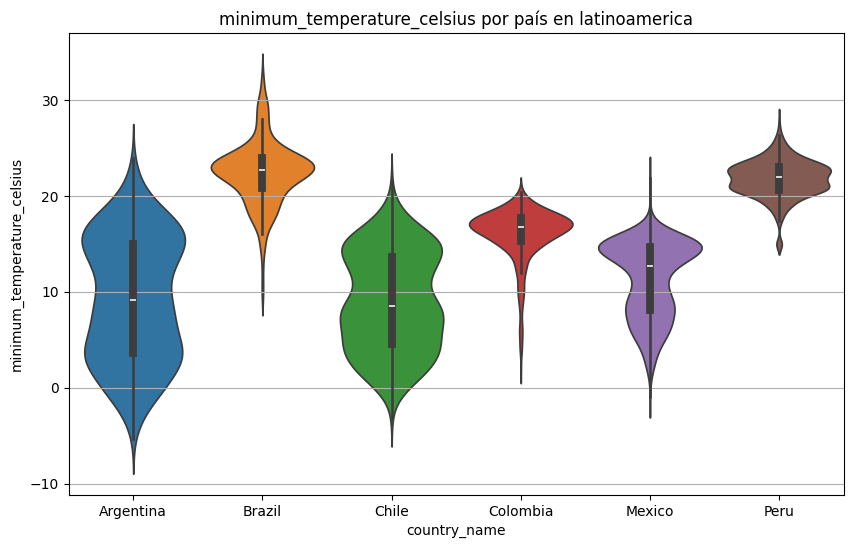

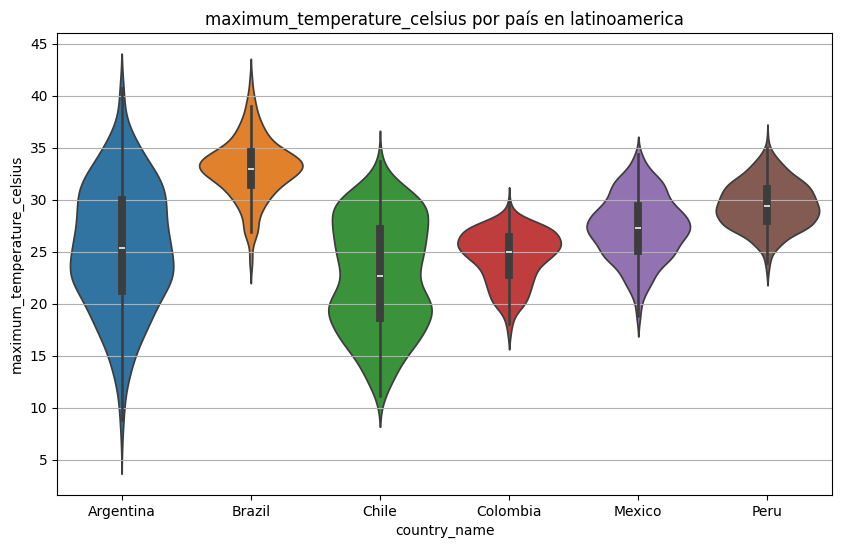

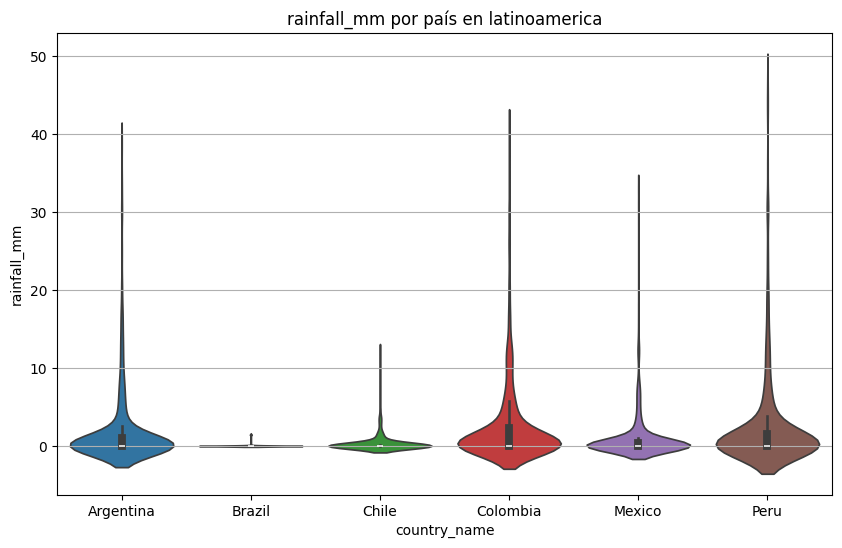

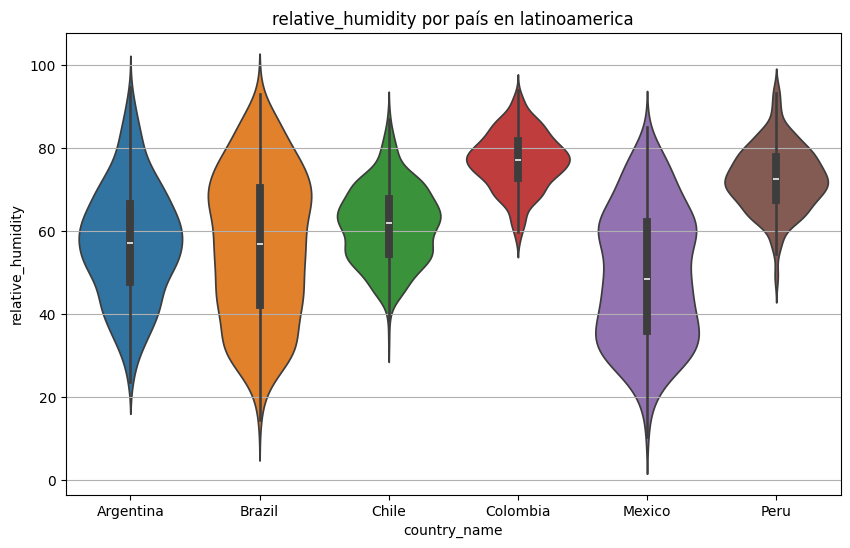

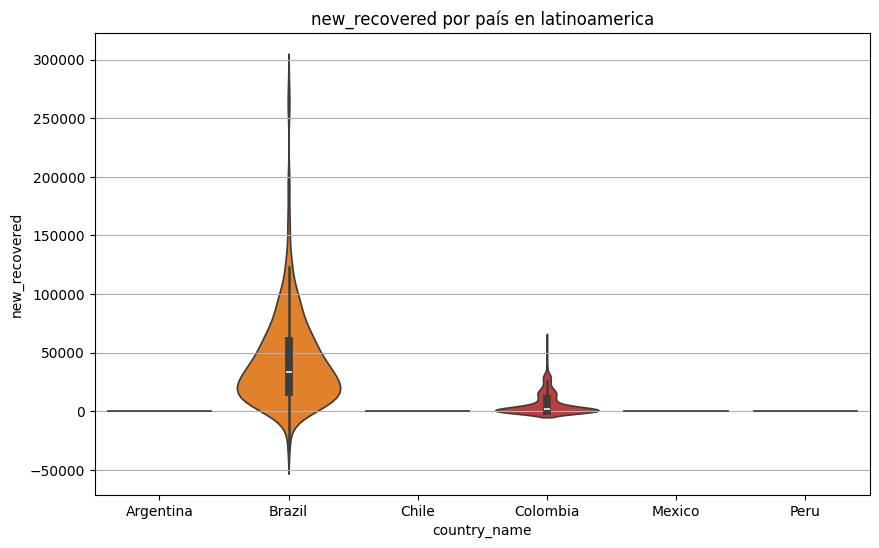

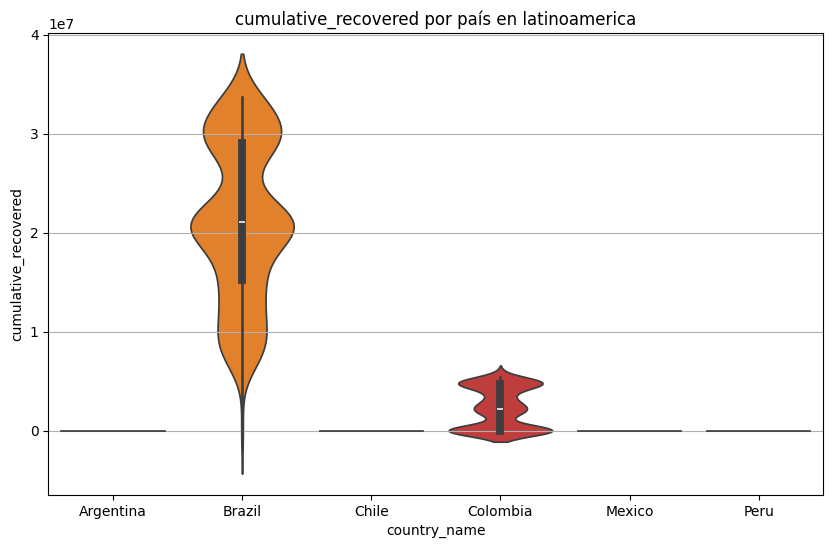

In [36]:
# Crear una lista de nombres de columnas que tienen más de 6 valores únicos, excluyendo algunas columnas que no son relevantes para el análisis.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Crear un nuevo DataFrame que solo contenga las columnas seleccionadas (aquellas con más de 6 valores únicos más country_name).
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]

# Crear un gráfico de tipo violinplot para cada columna numérica en el DataFrame filtrado.
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.grid(axis='y')
        plt.show()


In [33]:
#Crear una lista de columnas que se utilizarán para el análisis. Incluye el nombre del país y las columnas que representan diferentes rangos de edad de la población.
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Filtra el DataFrame original para mantener solo las columnas especificadas en cut_columns.
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')

#Ordena los países en función de la población del grupo de edad de 0 a 9 años. Esto permite visualizar fácilmente los países con menor a mayor población en este rango de edad.
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()
age_distribution

population_age_00_09           72354498.0
population_age_10_19           75821668.0
population_age_20_29           75953404.0
population_age_30_39           72153175.0
population_age_40_49           59596656.0
population_age_50_59           47961620.0
population_age_60_69           32654396.0
population_age_70_79           17789478.0
population_age_80_and_older     8711719.0
dtype: float64

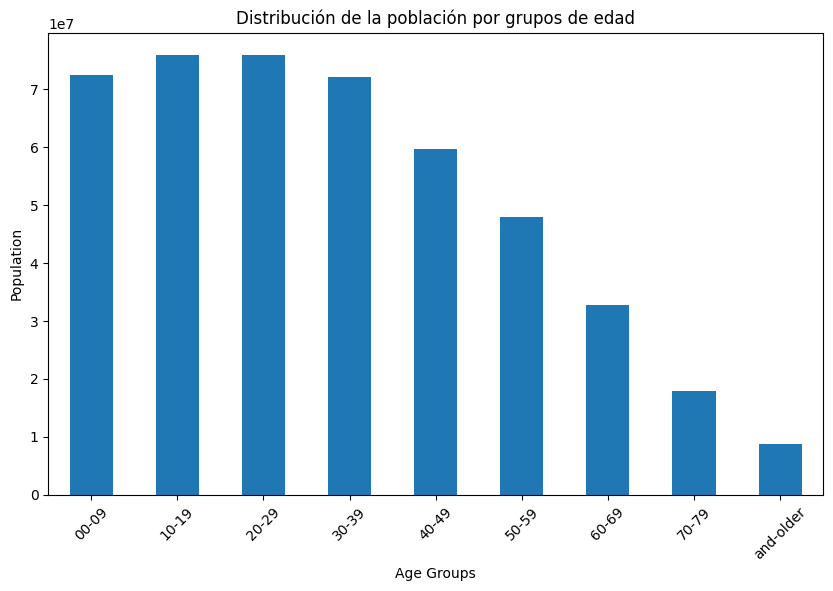

In [34]:
# Crear una lista que contenga las columnas relevantes del DataFrame. Estas columnas incluyen:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

Esta gráfica es interesante porque nos permite ver la población por grupos de edad en cada país, lo que nos puede ayudar a entender cómo se comporta la población y también nos genera la idea de que podríamos graficar la cantidad de vacunas por cada grupo etario.

In [35]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

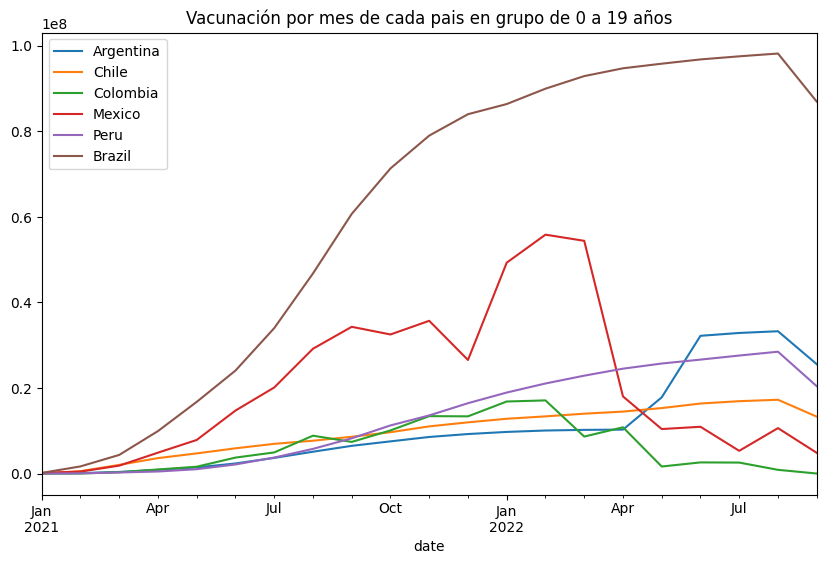

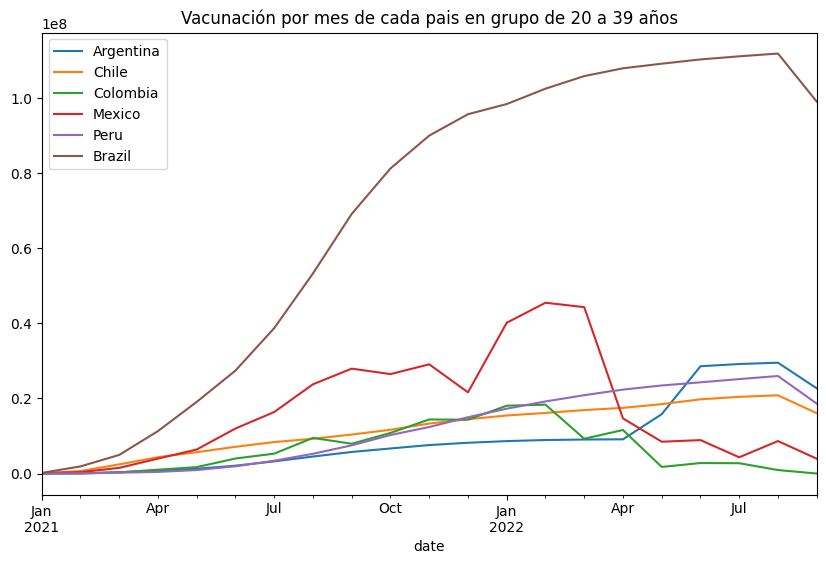

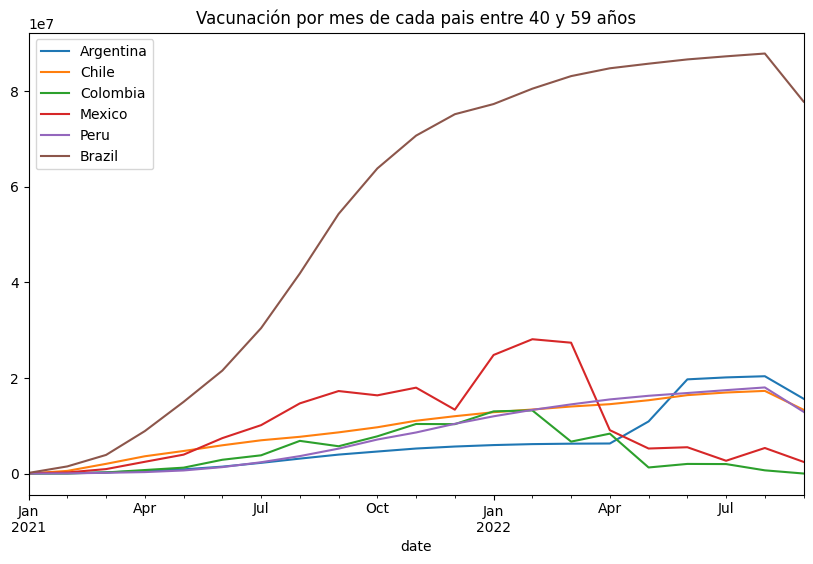

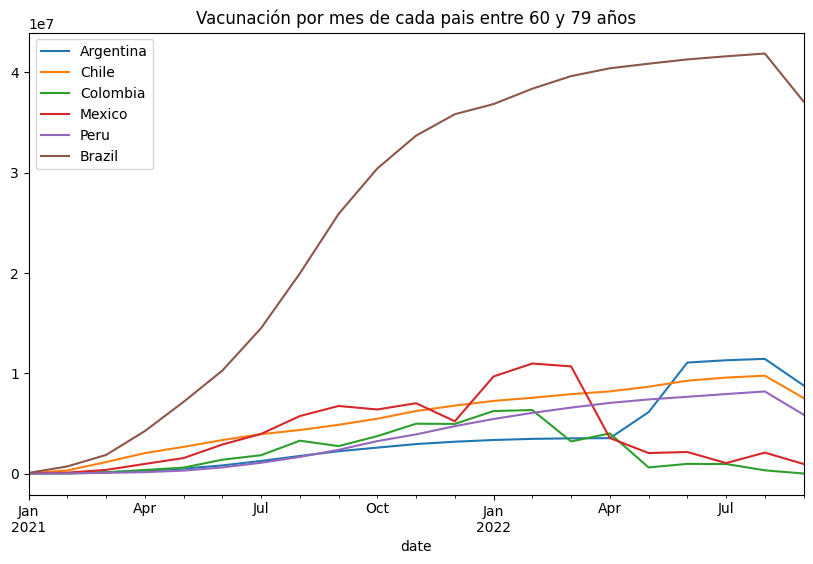

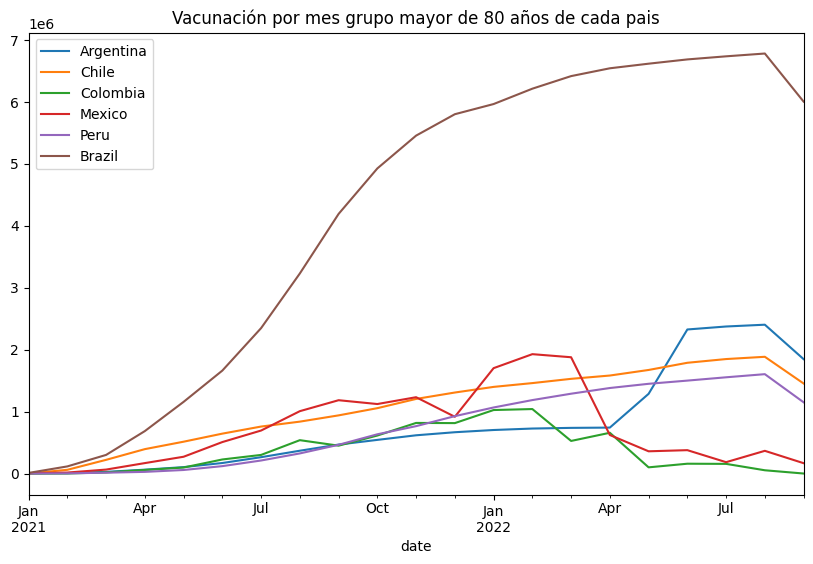

In [36]:
# Grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.

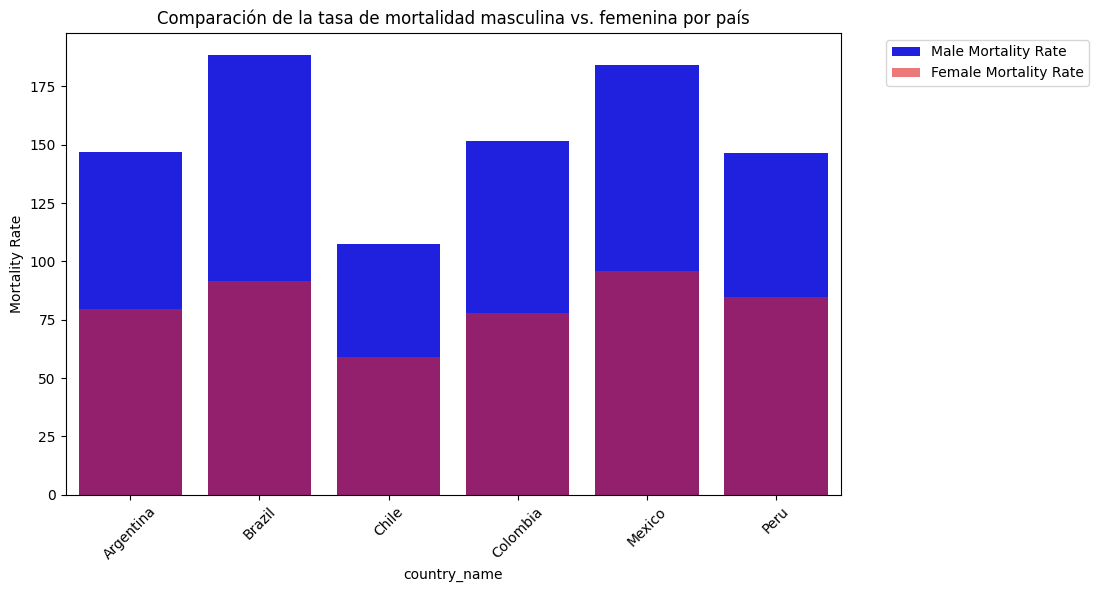

In [38]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.

Y si vemos las enfermedades preexistentes o comorbilidades? Podríamos ver si hay alguna enfermedad que sea más común en los paises seleccionados y que haya causado más muertes.

Veamos a ver si existe de una manera mas detallada la variables y la correlación entre ellas.

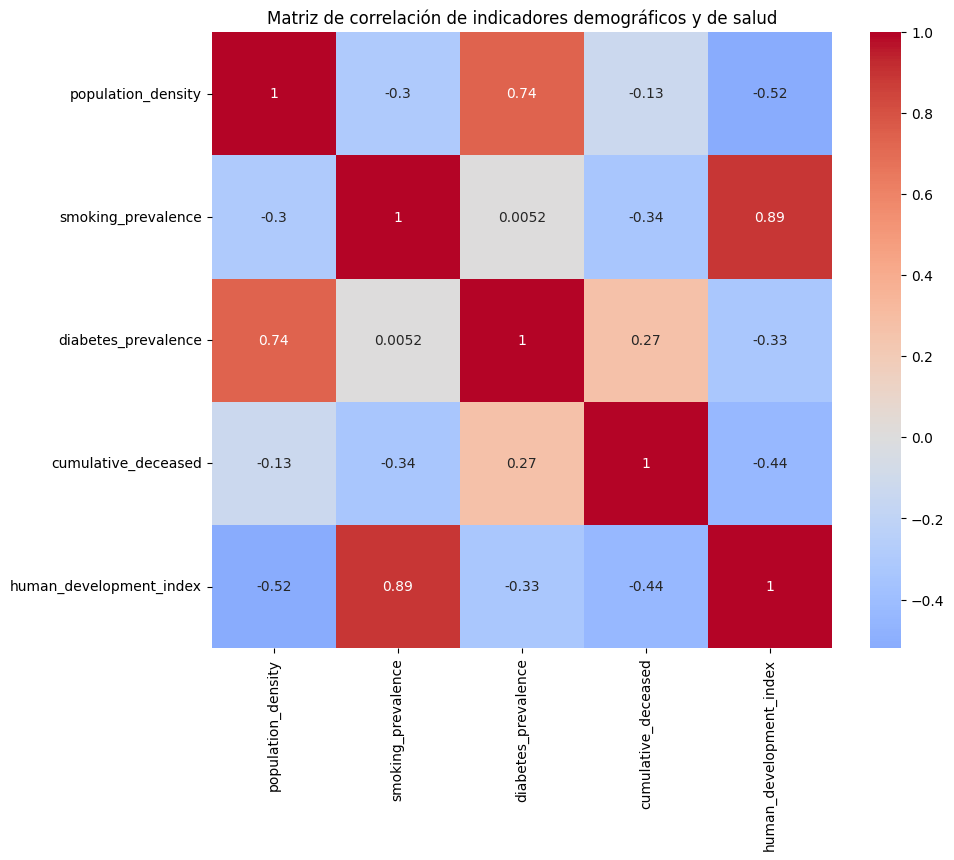

In [39]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.

De acuerdo a esto veamos se comporta la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

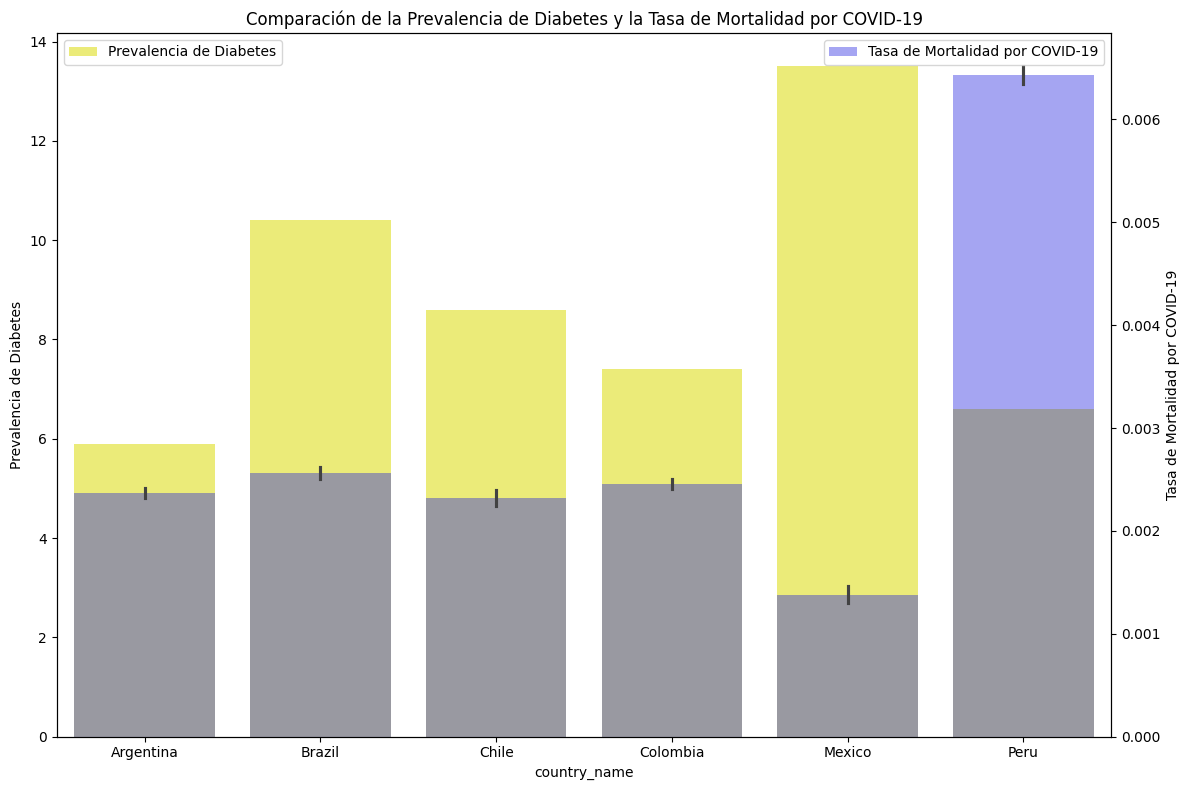

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

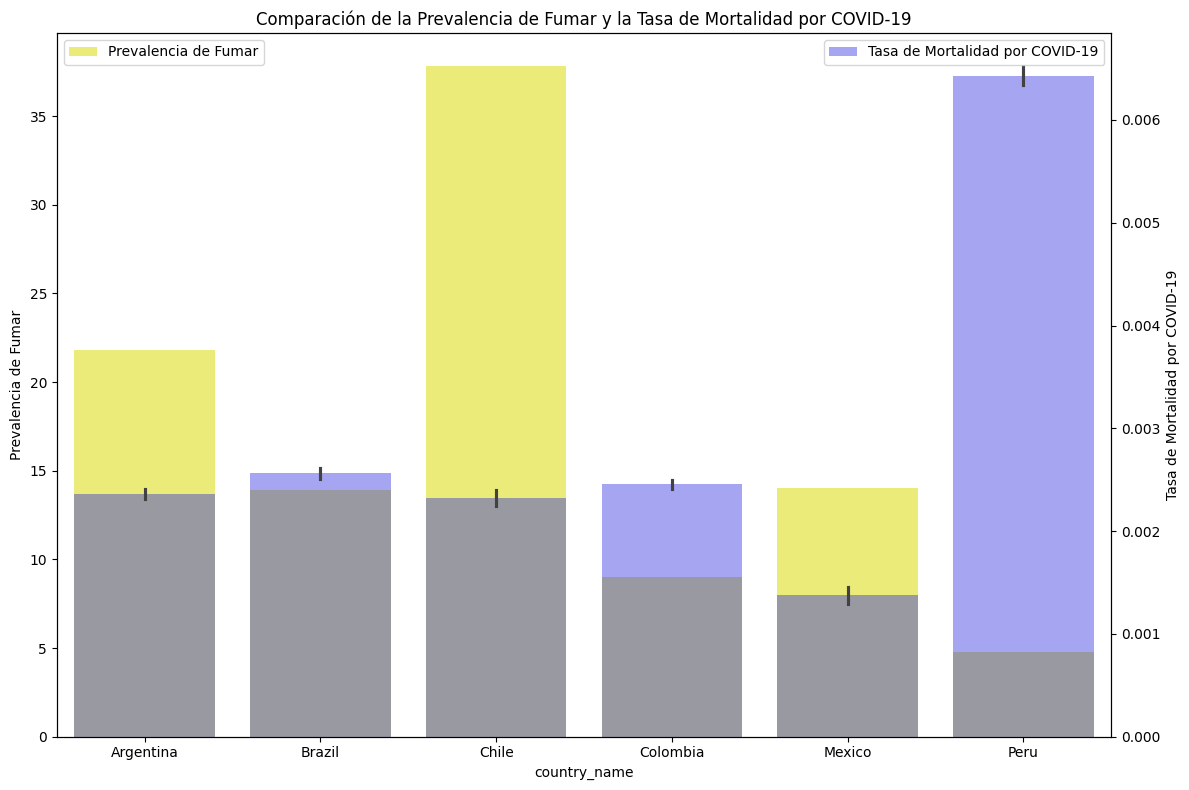

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

#### Avance 3

In [1]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_latinoamerica_paises = pd.read_csv('Datosfinalesfiltrado.csv')
data_latinoamerica_paises.head(5)


location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [17]:
# Seleccionar columnas de tipo float
float_columns = data_latinoamerica_paises.select_dtypes(include=['float64']).columns

# Truncar decimales y convertir a enteros
data_latinoamerica_paises[float_columns] = data_latinoamerica_paises[float_columns].astype(int)

# Verifica los tipos de datos
print(data_latinoamerica_paises.dtypes)

# Mostrar el DataFrame para cargarlo en Power BI
data_latinoamerica_paises

location_key                             object
country_code                             object
country_name                             object
new_confirmed                             int64
new_deceased                              int64
cumulative_confirmed                      int64
cumulative_deceased                       int64
cumulative_vaccine_doses_administered     int64
population                                int64
population_male                           int64
population_female                         int64
population_rural                          int64
population_urban                          int64
population_density                        int64
human_development_index                   int64
population_age_00_09                      int64
population_age_10_19                      int64
population_age_20_29                      int64
population_age_30_39                      int64
population_age_40_49                      int64
population_age_50_59                    

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina           7767   
2021-01-03           AR           AR    Argentina           4934   
2021-01-04           AR           AR    Argentina          13953   
2021-01-05           AR           AR    Argentina          14085   
2021-01-06           AR           AR    Argentina          14496   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru           1150   
2022-09-14           PE           PE         Peru          13936   
2022-09-15           PE           PE         Peru          13936   
2022-09-16           PE           PE         Peru          13936   
2022-09-17           PE           PE         Peru          13936   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02           166               1670634                46688   
2021-01-03           157               1675568                46845   
2021-01-04           157               1689521                47002   
2021-01-05           160               1703606                47162   
2021-01-06           131               1718102                47293   
...                  ...                   ...                  ...   
2022-09-13            22               4127612               216173   
2022-09-14           277               6784382               193136   
2022-09-15           277               6784382               193136   
2022-09-16           277               6784382               193136   
2022-09-17           277               6784382               193136   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                  20334    44938712   
2021-01-03                                  20529    44938712   
2021-01-04                                  25164    44938712   
2021-01-05                                  29852    44938712   
2021-01-06                                  34162    44938712   
...                                           ...         ...   
2022-09-13                                      0    29381884   
2022-09-14                                      0    29381884   
2022-09-15                                      0    29381884   
2022-09-16                                      0    29381884   
2022-09-17                                      0    29381884   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02         19523766  ...           2690269             55032   
2021-01-03         19523766  ...           2690269             55032   
2021-01-04         19523766  ...           2690269             55032   
2021-01-05         19523766  ...           2690269             55032   
2021-01-06         19523766  ...           2690269             55032   
...                     ...  ...               ...               ...   
2022-09-13         14450757  ...           1256339             16425   
2022-09-14         14450757  ...           1256339             16425   
2022-09-15         14450757  ...           1256339             16425   
2022-09-16         14450757  ...           1256339             16425   
2022-09-17         14450757  ...           1256339             16425   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02               76                        147   
2021-01-03               76                        147   
2021-01-04               76                        147   
2021-01-05               76                        147   
2021-01-06               76                        147   
...          

In [14]:
data_latinoamerica_paises.round()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru         1150.0   
2022-09-14           PE           PE         Peru        13936.0   
2022-09-15           PE           PE         Peru        13936.0   
2022-09-16           PE           PE         Peru        13936.0   
2022-09-17           PE           PE         Peru        13936.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2022-09-13          22.0             4127612.0             216173.0   
2022-09-14         277.0             6784382.0             193137.0   
2022-09-15         277.0             6784382.0             193137.0   
2022-09-16         277.0             6784382.0             193137.0   
2022-09-17         277.0             6784382.0             193137.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02             77.0                      147.0   
2021-01-03             77.0                      147.0   
2021-01-04             77.0                      147.0   
2021-01-05             77.0                      147.0   
2021-01-06             77.0                      147.0   
...          

In [13]:
data_latinoamerica_paises.shape

(3744, 50)

Pasamos la columna date a formato fecha y la agregamos como indice

In [4]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)


Se crea una nueva columna con el metodo index.isocalendar, que nos va a generar una columna nueva con el numero de semanas  de la columna date

In [5]:
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   13936.279613   
2022-09-15           PE           PE         Peru   13936.279613   
2022-09-16           PE           PE         Peru   13936.279613   
2022-09-17           PE           PE         Peru   13936.279613   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    277.164115          6.784382e+06        193136.784045   
2022-09-15    277.164115          6.784382e+06        193136.784045   
2022-09-16    277.164115          6.784382e+06        193136.784045   
2022-09-17    277.164115          6.784382e+06        193136.784045   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

Filtramos por el indice 

In [12]:
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') & 
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [11]:
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

In [17]:
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

In [18]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

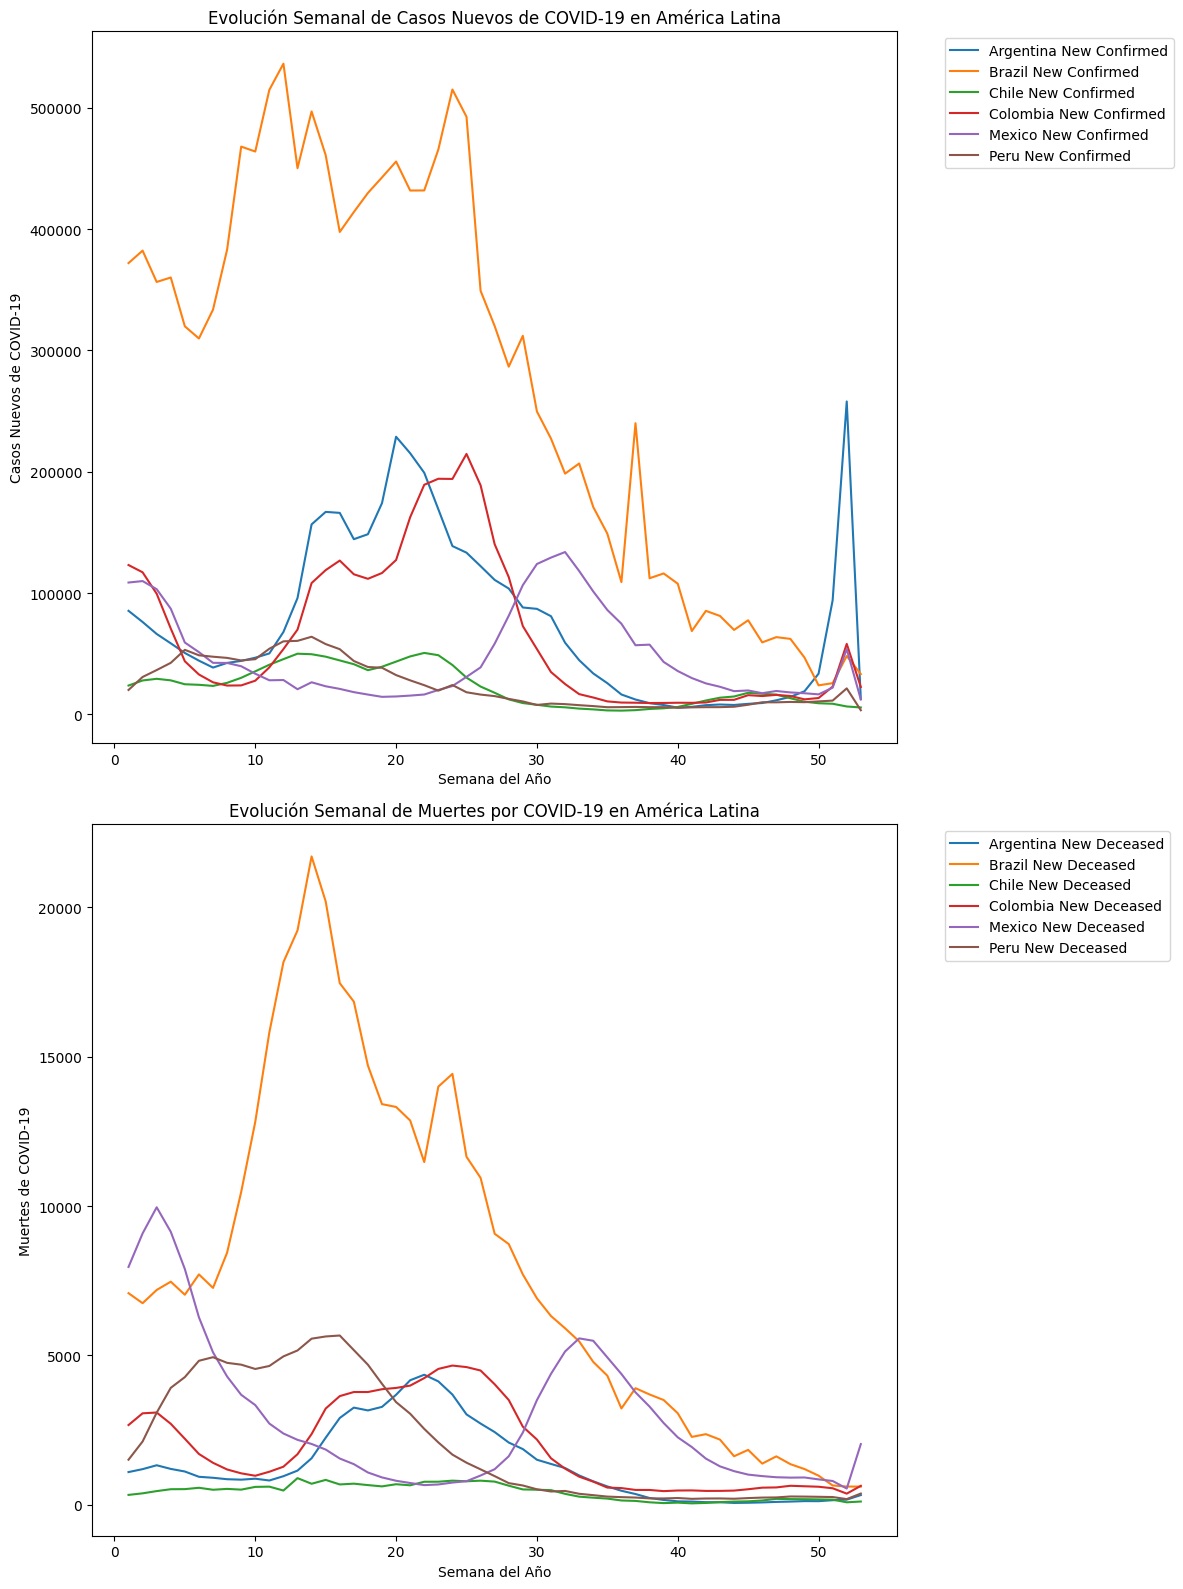

In [20]:
# Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'Week'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['Week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekly_cases['Week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

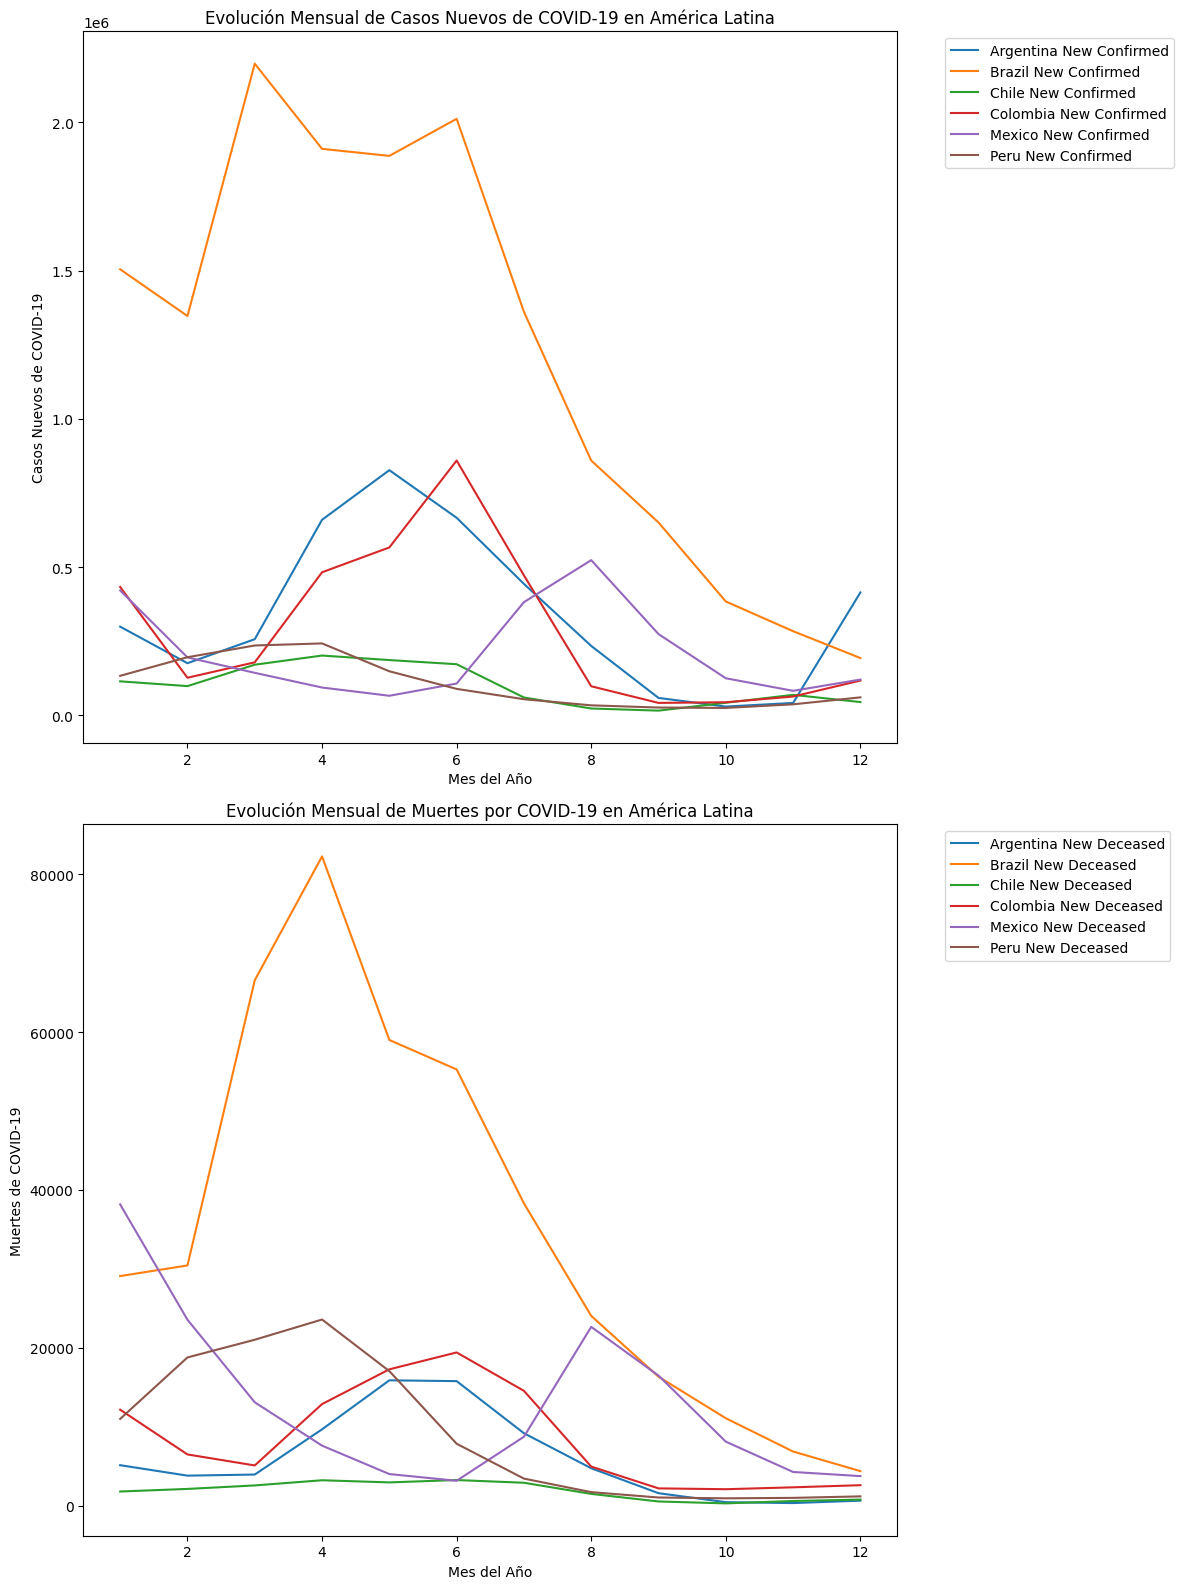

In [21]:

#ahora por vamos por mes del año año
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month # type: ignore
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

4. Genera gráficas acordes a tu análisis. Las mismas pueden ser:
    - Evolución de Casos Activos vs. Recuperados
    - Tasa de Crecimiento (%)
    - Relación entre la Cobertura de Vacunación y la Reducción de Casos
    - ('País') Progreso de la vacunación por país
    - Nuevos casos y temperatura promedio
    - Impacto de la Urbanización en la Propagación del Covid-19
    - Evolución Semanal de Casos Nuevos
    - Evolución Anual de Casos Nuevos
    - Distribución de la Población por Edad en Países
    - Comparación de Estrategias de Vacunación en América Latina
    - Evolución del Número de Muertes Diarias.
    - Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
    - Variación Mensual de Casos y Muertes
    - Análisis Temporal de la Mortalidad/
    - Comparación de la Situación Actual (Contexto de los datos)

In [23]:
data_latinoamerica_paises.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  area_urban_sq_km  life_expectancy  \
date                         ...                                      
2021-01-02       19523766.0  ...           55032.0            76.52   
2021-01-03       19523766.0  ...           55032.0            76.52   
2021-01-04       19523766.0  ...           55032.0            76.52   
2021-01-05       19523766.0  ...           55032.0            76.52   
2021-01-06       19523766.0  ...           55032.0            76.52   

            adult_male_mortality_rate  adult_female_mortality_rate  \
date                                                                 
2021-01-02                    147.086                       79.483   
2021-01-03                    147.086                       79.483   
2021-01-04                    147.086                       79.483   
2021-01-05                    147.086                       79.483   
2021-01-06                    147.086                       79.483   

            pollution_mortality_rate  comorbidity_mortality_rate  \
date                                                               
2021-01-02                      26.6                        15.8   
2021-01-03                      26.6                        15.8   
2021-01-04                      26.6                        15.8   
2021-01-05                      26.6                        15.8   
2021-01-06                      26.6                        15.8   

            new_recovered  cumulative_recovered  Week  active_cases  
date                                                                 
2021-01-02            0.0                   0.0    53     1670634.0  
2021-01-03            0.0                   0.0    53     1675568.0  
2021-01-04            0.0                   0.0     1     1689521.0  
2021-01-05            0.0                   0.0     1     1703606.0  
2021-01-06            0.0                   0.0     1     1718102.0  

[5 rows x 51 columns]

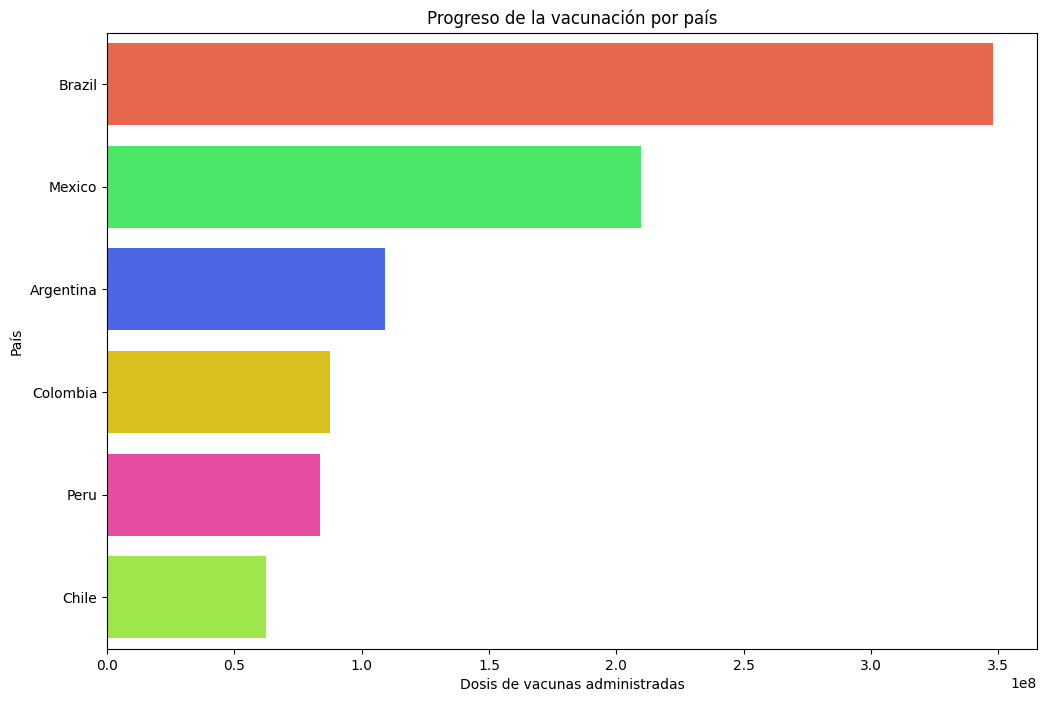

In [25]:
# - Comparación de Estrategias de Vacunación en América Latina
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

custom_palette = {
    'Argentina': '#75AADB',   # Azul celeste y blanco (Argentina)
    'Brazil': '#009739',      # Verde y amarillo (Brasil)
    'Chile': '#D52B1E',       # Rojo, azul y blanco (Chile)
    'Colombia': '#FFD700',    # Amarillo, azul y rojo (Colombia)
    'Mexico': '#006341',      # Verde, blanco y rojo (México)
    'Peru': '#A52A2A'         # Rojo y blanco (Perú)
}

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette= custom_colors)
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

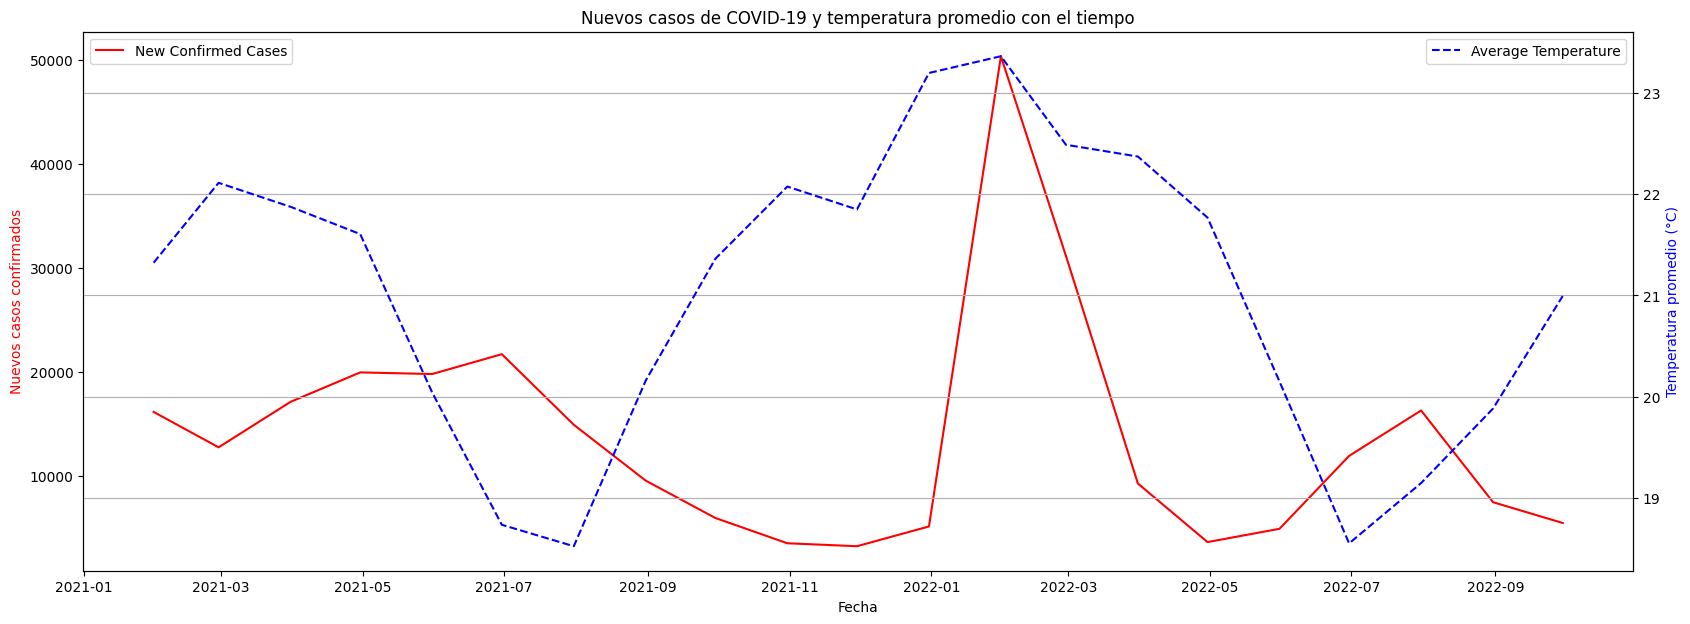

In [27]:
# - Nuevos casos y temperatura promedio
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))
ax1 = plt.gca() # Obtiene el eje actual de la gráfica y lo asigna a ax1.
ax2 = ax1.twinx() # Crea un segundo eje ax2 que comparte el mismo eje x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades en el mismo gráfico.
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

In [26]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [27]:
data_latinoamerica_paises[["population","population_urban","cumulative_confirmed"]]

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02 44938712.00       41339571.00            1670634.00
2021-01-03 44938712.00       41339571.00            1675568.00
2021-01-04 44938712.00       41339571.00            1689521.00
2021-01-05 44938712.00       41339571.00            1703606.00
2021-01-06 44938712.00       41339571.00            1718102.00
...                ...               ...                   ...
2022-09-13 29381884.00       25390339.00            4127612.00
2022-09-14 29381884.00       25390339.00            6784382.13
2022-09-15 29381884.00       25390339.00            6784382.13
2022-09-16 29381884.00       25390339.00            6784382.13
2022-09-17 29381884.00       25390339.00            6784382.13

[3744 rows x 3 columns]

In [28]:
# -Impacto de la Urbanización en la Propagación del Covid-19
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO       13936.28        277.16   
Brazil                 BR           BR       13936.28        277.16   
Peru                   PE           PE       13936.28        277.16   
Argentina              AR           AR       13936.28        277.16   
Mexico                 MX           MX       13936.28        277.16   
Chile                  CL           CL       13936.28        277.16   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia                6784382.13            193136.78   
Brazil                  6784382.13            193136.78   
Peru                    6784382.13            193136.78   
Argentina               6784382.13            193136.78   
Mexico                  6784382.13            193136.78   
Chile                   6784382.13            193136.78   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                       0.00  50882884.00   
Brazil                                         0.00 212559409.00   
Peru                                           0.00  29381884.00   
Argentina                                      0.00  44938712.00   
Mexico                                         0.00 110991953.00   
Chile                                          0.00  17574003.00   

              population_male  population_female  ...  \
country_name                                      ...   
Colombia          24984564.00        25898320.00  ...   
Brazil           104435783.00       108123626.00  ...   
Peru              14450757.00        14931127.00  ...   
Argentina         19523766.00        20593330.00  ...   
Mexico            54855231.00        57481307.00  ...   
Chile              8972014.00         8601989.00  ...   

              adult_male_mortality_rate  adult_female_mortality_rate  \
country_name                                                           
Colombia                         151.62                        78.00   
Brazil                           188.53                        91.42   
Peru                             146.37                        84.81   
Argentina                        147.09                        79.48   
Mexico                           184.38                        95.81   
Chile                            107.67                        59.03   

              pollution_mortality_rate  comorbidity_mortality_rate  \
country_name                                                         
Colombia                         37.00                       15.80   
Brazil                           29.90                       16.60   
Peru                             63.90                       12.60   
Argentina                        26.60                       15.80   
Mexico                           36.70                       15.70   
Chile                            25.30                       12.40   

              new_recovered  cumulative_recovered  Week  active_cases  \
country_name                                                            
Colombia               0.00                  0.00    37    6784382.13   
Brazil                 0.00                  0.00    37    6784382.13   
Peru                   0.00                  0.00    37    6784382.13   
Argentina              0.00                  0.00    37    6784382.13   
Mexico                 0.00                  0.00    37    6784382.13   
Chile                  0.00                  0.00    37    6784382.13   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Colombia                             0.80                             0.13  
Brazil         

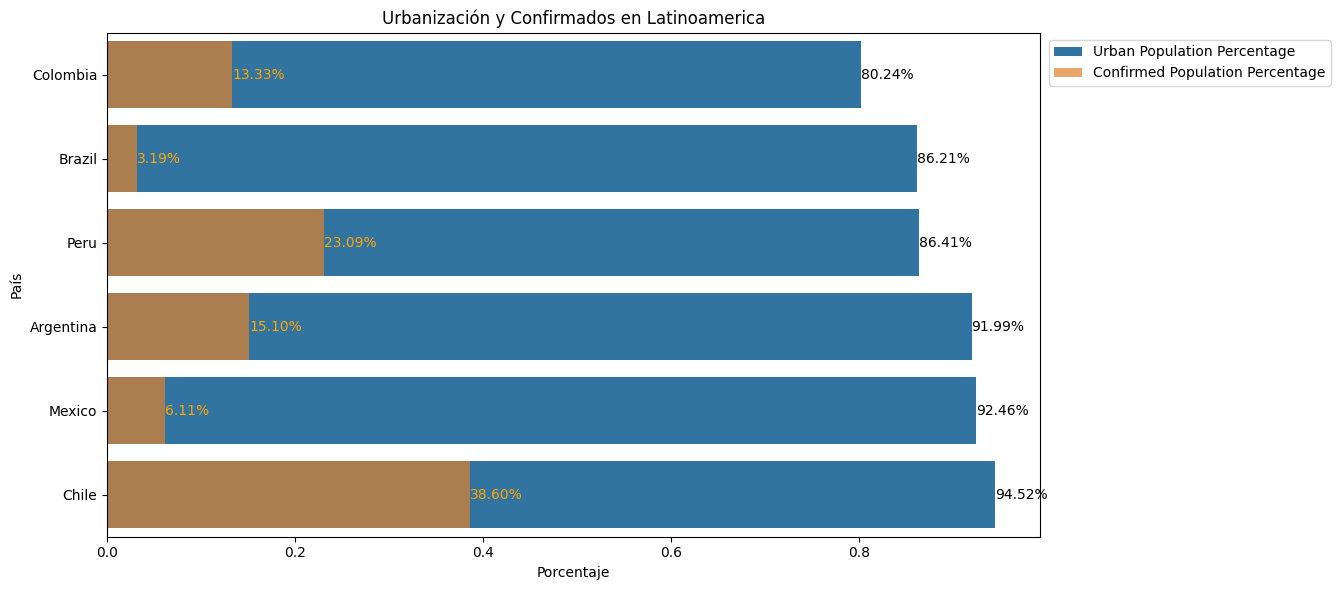

In [29]:
# - Impacto de la Urbanización en la Propagación del Covid-19: Urbanización en Latinoamerica
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='orange', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()

Si bien la urbanización es un factor que puede influir en la propagación de enfermedades, no es el único ni necesariamente el más determinante. Para comprender mejor la relación entre casos confirmados y urbanización.

Podria deducir que el porcentaje elevado en los casos en chile, se debe a la cantida de pruebas diarias que ejecuto el gobieno en pandemia, porque uno de los paises mas densos es Brazil y su correlación con los casos no tiene simetria, por lo tanto considero qeu los casos confirmados pueden esatr mas relacionado directamente con la variable de muestras diarias 

In [30]:
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru       13936.28   
2022-09-15           PE           PE         Peru       13936.28   
2022-09-16           PE           PE         Peru       13936.28   
2022-09-17           PE           PE         Peru       13936.28   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        277.16            6784382.13            193136.78   
2022-09-15        277.16            6784382.13            193136.78   
2022-09-16        277.16            6784382.13            193136.78   
2022-09-17        277.16            6784382.13            193136.78   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  adult_female_mortality_rate  \
date                         ...                                
2021-01-02      19523766.00  ...                        79.48   
2021-01-03      19523766.00  ...                        79.48   
2021-01-04      19523766.00  ...                        79.48   
2021-01-05      19523766.00  ...                        79.48   
2021-01-06      19523766.00  ...                        79.48   
...                     ...  ...                          ...   
2022-09-13      14450757.00  ...                        84.81   
2022-09-14      14450757.00  ...                        84.81   
2022-09-15      14450757.00  ...                        84.81   
2022-09-16      14450757.00  ...                        84.81   
2022-09-17      14450757.00  ...                        84.81   

            pollution_mortality_rate  comorbidity_mortality_rate  \
date                                                               
2021-01-02                     26.60                       15.80   
2021-01-03                     26.60                       15.80   
2021-01-04                     26.60                       15.80   
2021-01-05                     26.60                       15.80   
2021-01-06                     26.60                       15.80   
...                              .

In [32]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Chile', 'Peru', 'Argentina', 'Colombia', 'Brazil'], dtype='object', name='country_name')

In [33]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data_latinoamerica_paises[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02            6718871.00            7045513.00            6430658.00   
2021-01-03            6718871.00            7045513.00            6430658.00   
2021-01-04            6718871.00            7045513.00            6430658.00   
2021-01-05            6718871.00            7045513.00            6430658.00   
2021-01-06            6718871.00            7045513.00            6430658.00   
...                          ...                   ...                   ...   
2022-09-13            5140624.00            5035905.00            4895056.00   
2022-09-14            5140624.00            5035905.00            4895056.00   
2022-09-15            5140624.00            5035905.00            4895056.00   
2022-09-16            5140624.00            5035905.00            4895056.00   
2022-09-17            5140624.00            5035905.00            4895056.00   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02            5777148.00            4507125.00            3911943.00   
2021-01-03            5777148.00            4507125.00            3911943.00   
2021-01-04            5777148.00            4507125.00            3911943.00   
2021-01-05            5777148.00            4507125.00            3911943.00   
2021-01-06            5777148.00            4507125.00            3911943.00   
...                          ...                   ...                   ...   
2022-09-13            4379777.00            3660378.00            2772568.00   
2022-09-14            4379777.00            3660378.00            2772568.00   
2022-09-15            4379777.00            3660378.00            2772568.00   
2022-09-16            4379777.00            3660378.00            2772568.00   
2022-09-17            4379777.00            3660378.00            2772568.00   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02            2914251.00            1817557.00   
2021-01-03            2914251.00            1817557.00   
2021-01-04            2914251.00            1817557.00   
2021-01-05            2914251.00            1817557.00   
2021-01-06            2914251.00            1817557.00   
...                          ...                   ...   
2022-09-13            1846407.00            1078066.00   
2022-09-14            1846407.00            1078066.00   
2022-09-15            1846407.00            1078066.00   
2022-09-16            1846407.00            1078066.00   
2022-09-17            1846407.00            1078066.00   

            population_age_80_and_older  
date                                     
2021-01-02                    994030.00  
2021-01-03                    994030.00  
2021-01-04                    994030.00  
2021-01-05                    994030.00  
2021-01-06                    994030.00  
...                                 ...  
2022-09-13                    573103.00  
2022-09-14                    573103.00  
2022-09-15                    573103.00  
2022-09-16                    573103.00  
2022-09-17                    573103.00  

[3744 rows x 9 columns]

In [34]:
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   
Brazil                 29076910.00           31160446.00   
Chile                   2428079.00            2493879.00   
Colombia                7414155.00            8119876.00   
Peru                    5140624.00            5035905.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   
Brazil                 34104643.00           34476762.00   
Chile                   2995538.00            2945404.00   
Colombia                8847061.00            7810299.00   
Peru                    4895056.00            4379777.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   
Brazil                 29462006.00           24421202.00   
Chile                   2578404.00            2352271.00   
Colombia                6450787.00            5543980.00   
Peru                    3660378.00            2772568.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   
Brazil                 16896862.00            8801551.00   
Chile                   1791787.00             993126.00   
Colombia                3771358.00            1979761.00   
Peru                    1846407.00            1078066.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00  
Brazil                         4159027.00  
Chile                           537721.00  
Colombia                        945607.00  
Peru                            573103.00

In [35]:
age_distribution_arg = age_distribution[age_distribution.index == 'Argentina']
age_distribution_arg

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00

In [36]:
age_distribution.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [37]:
age_distribution_arg.loc["Argentina"]

population_age_00_09          6718871.00
population_age_10_19          7045513.00
population_age_20_29          6430658.00
population_age_30_39          5777148.00
population_age_40_49          4507125.00
population_age_50_59          3911943.00
population_age_60_69          2914251.00
population_age_70_79          1817557.00
population_age_80_and_older    994030.00
Name: Argentina, dtype: float64

In [38]:
age_distribution.loc["Argentina"].index

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [39]:
age_distribution.loc["Argentina"].values

array([6718871., 7045513., 6430658., 5777148., 4507125., 3911943.,
       2914251., 1817557.,  994030.])

In [40]:
age_distribution_arg.index

Index(['Argentina'], dtype='object', name='country_name')

In [41]:
age_distribution_arg.columns

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

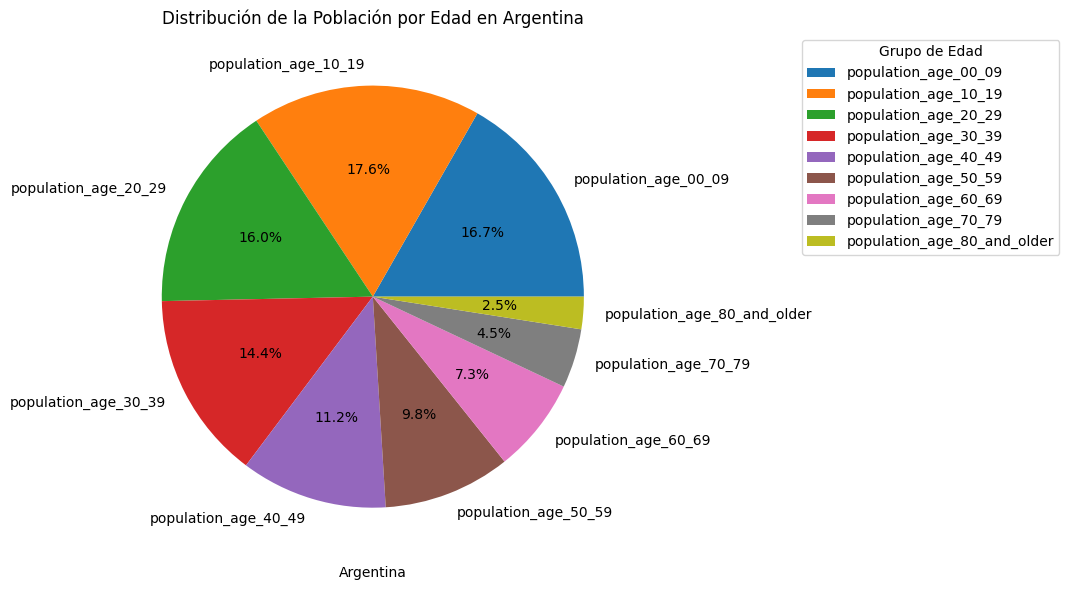

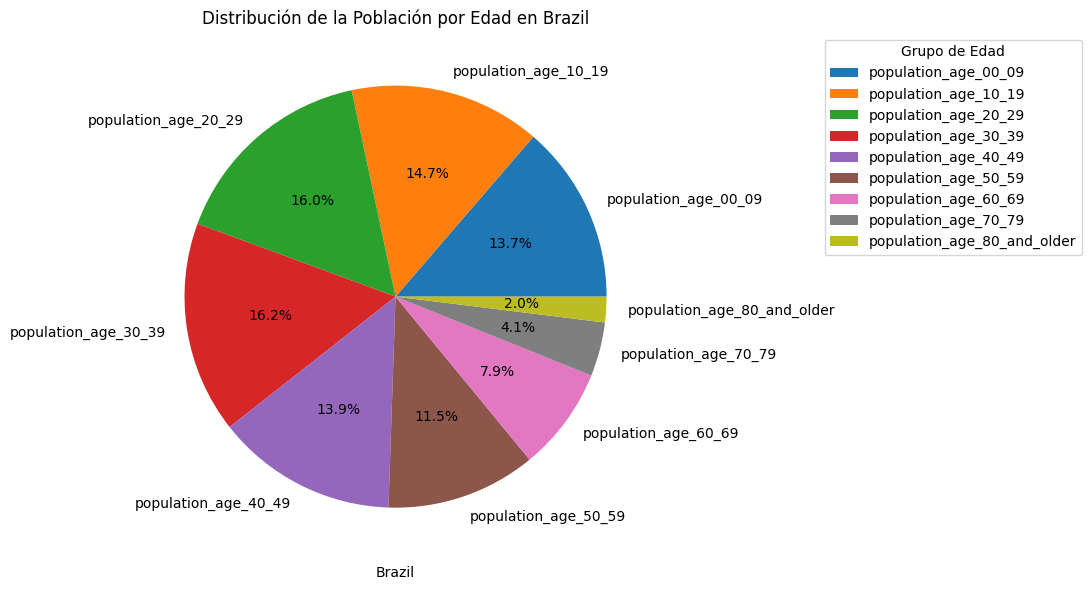

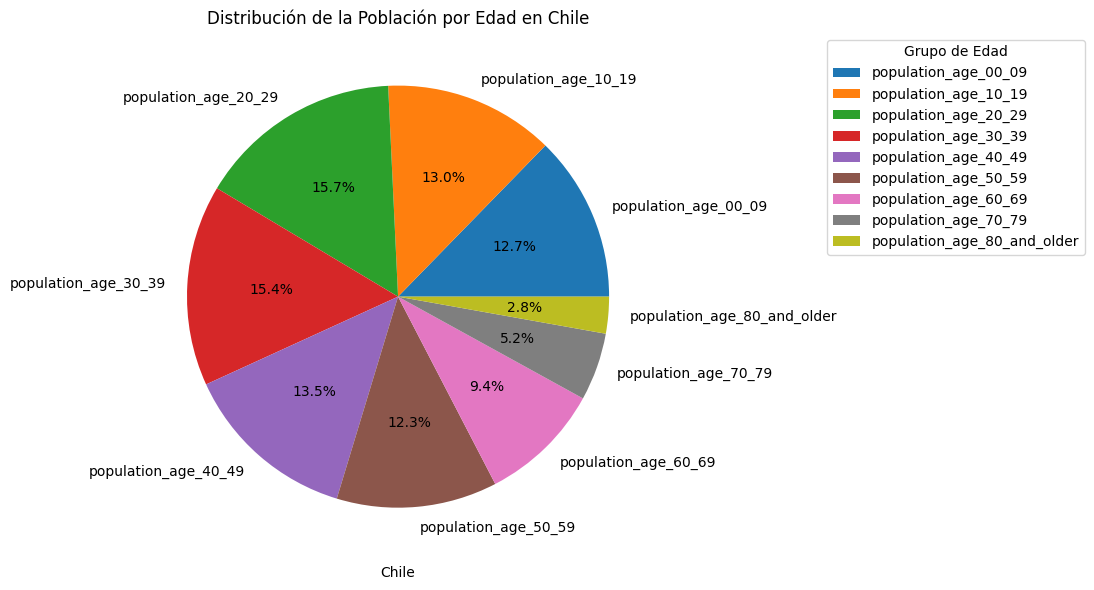

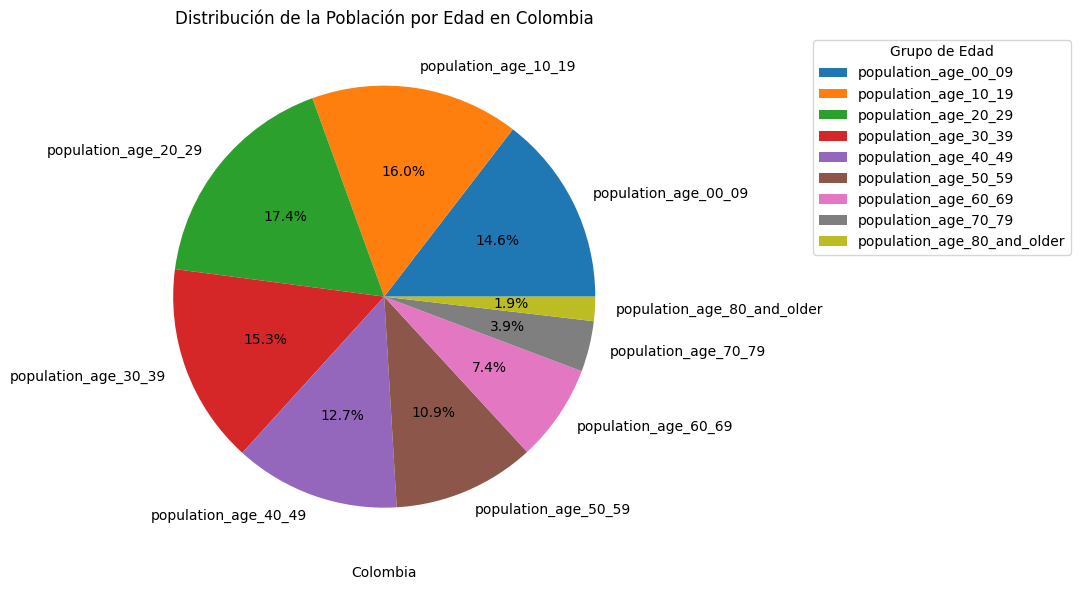

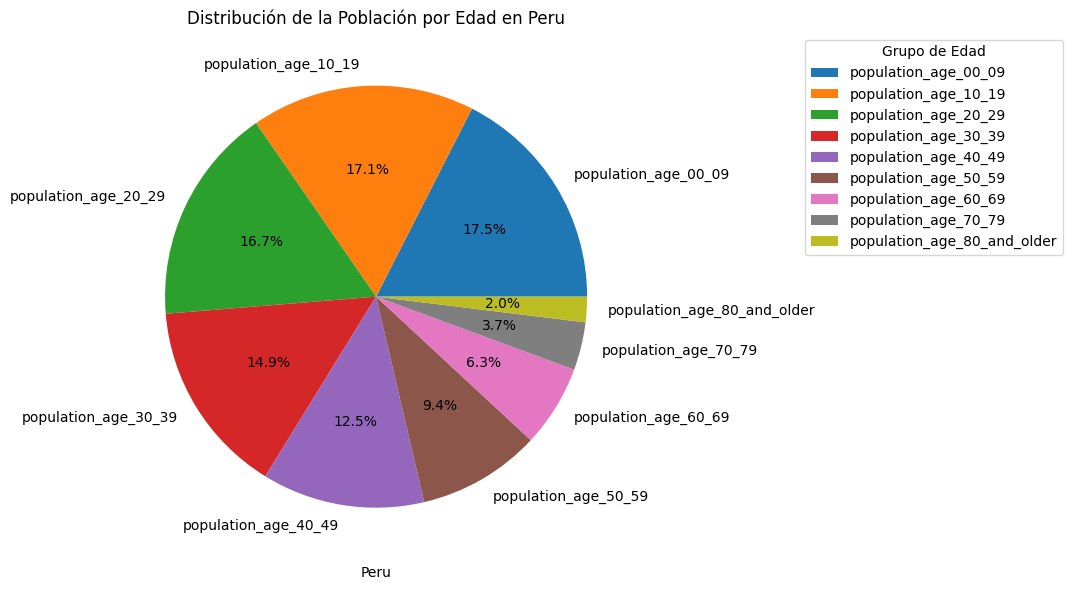

In [42]:
# Densidad de población por grupos de edad
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

El gráfico muestra claramente la desigualdad en cantidades de población por grupos de edad en los paises seleccionados aunque no proporcione muchas cosas interesantes. Es bueno tenerlo en cuenta para futuros análisis.

Sin embargo podemos empezar a ver como fueron de buenas o malas las estrategias de vacunación para mitigar la mortalidad y los casos confirmados.

In [48]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina   109204825.00
Brazil      347868481.00
Chile        62204235.00
Colombia     87566541.00
Mexico      209673612.00
Peru         83624934.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [49]:
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    44938712.00
Brazil      212559409.00
Chile        17574003.00
Colombia     50882884.00
Mexico      110991953.00
Peru         29381884.00
Name: population, dtype: float64

In [50]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina   2.43
Brazil      1.64
Chile       3.54
Colombia    1.72
Mexico      1.89
Peru        2.85
dtype: float64

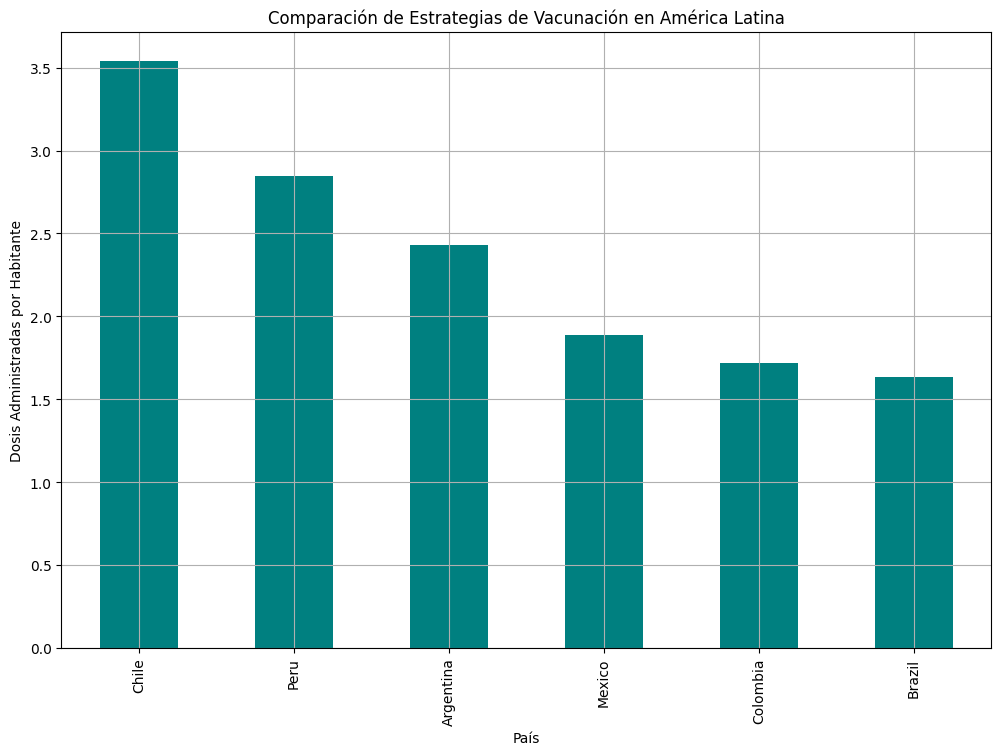

In [51]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.

Anterioremente revisamos las diabeter pero seria bueno revisarlo en porcentajes para identificar paises.

In [52]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [53]:
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Chile', 'Peru', 'Argentina'], dtype='object', name='country_name')

In [54]:
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Brazil', 'Colombia'], dtype='object', name='country_name')

In [55]:
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Chile       0.01
Peru        0.01
Argentina   0.00
Colombia    0.00
Brazil      0.00
Mexico      0.00
Name: deceased_percentage, dtype: float64

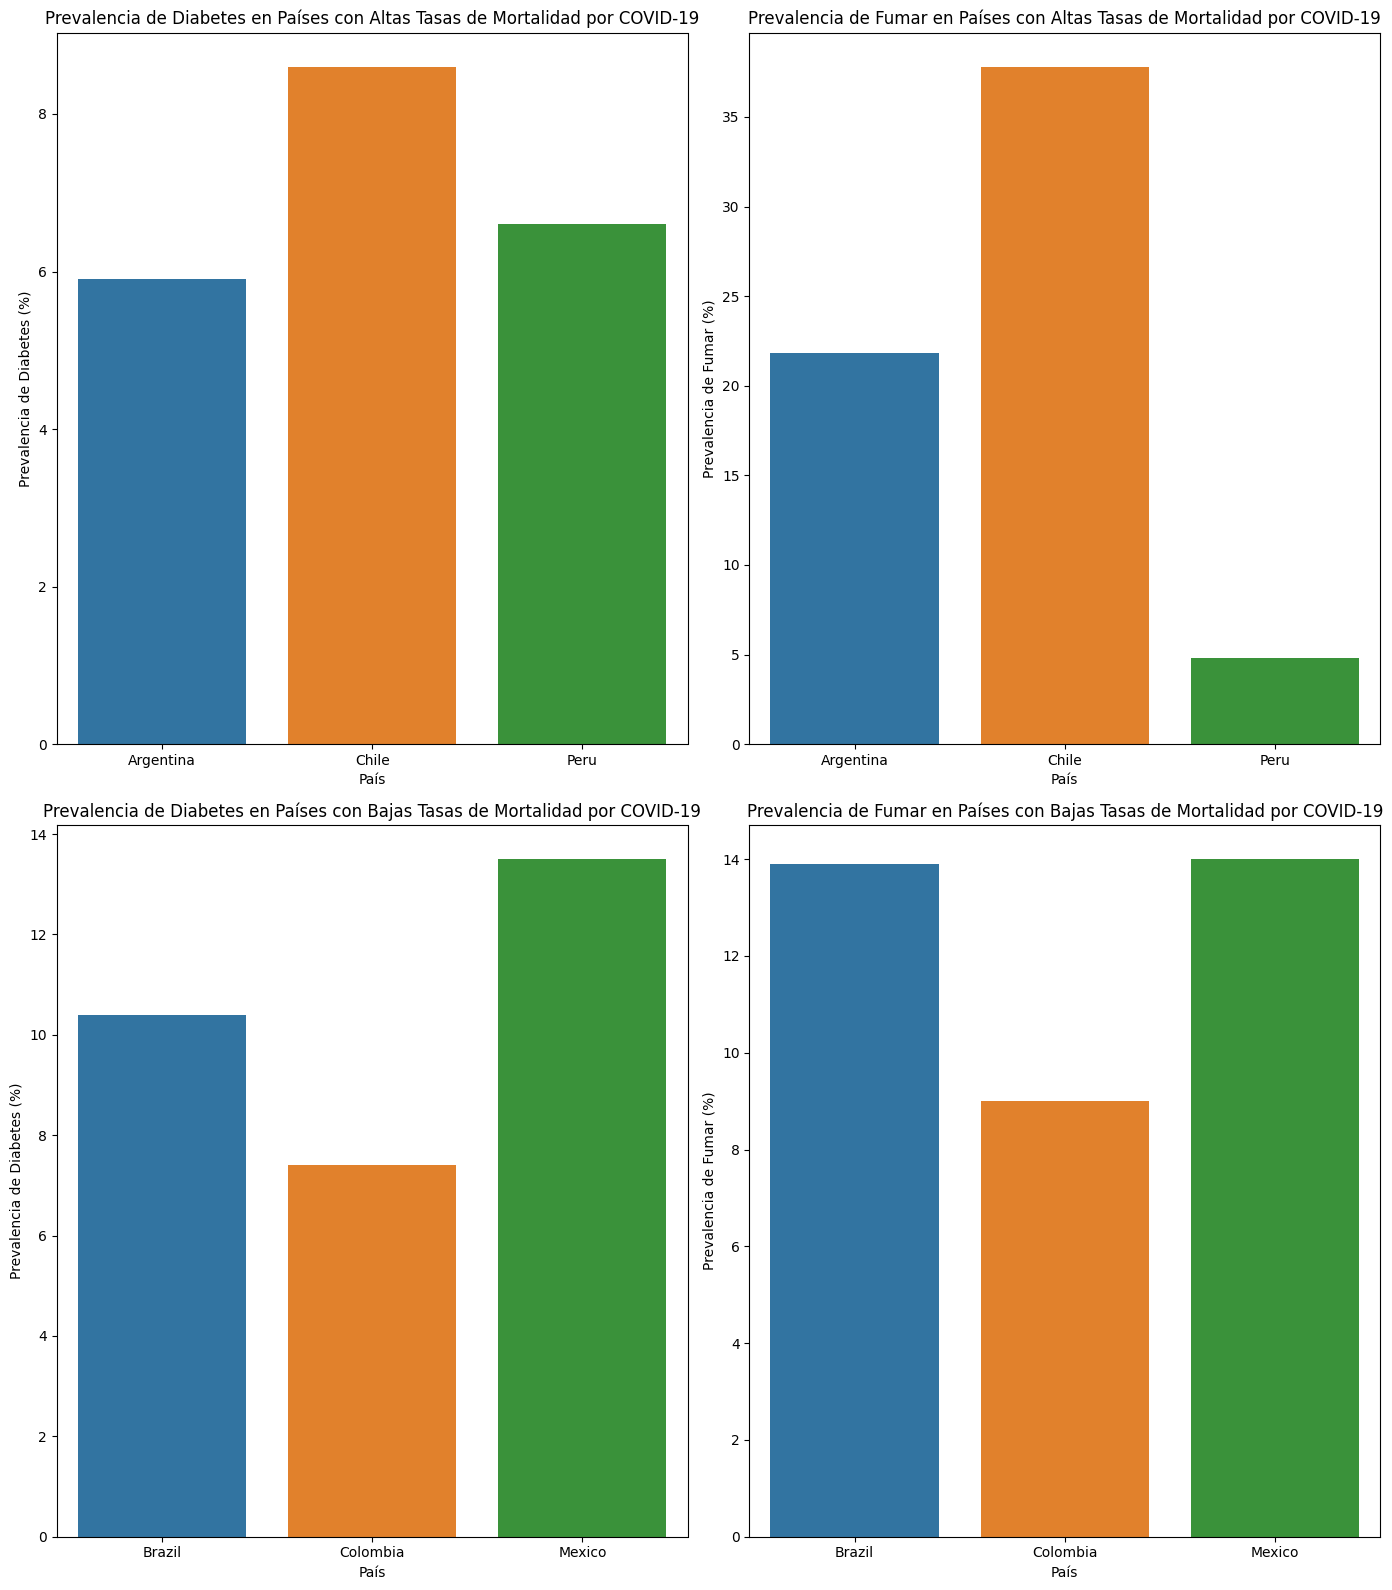

In [56]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

Ahora identificamos que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises son los que más han sufrido por el fumar.

Sin embargo mientras Brasil aparece entre los países con mayor tasa de mortalidad, México aparece entre los ménores. 
Lo mismo pasas entre Chile (mayor) y Argentina (menor)

Por lo que dificilmente pueda entenderse una correlación entre Situaciones Preexistentes y Mortalidad por Covid. 

Y viendo todo esto, ¿cómo se ha visto la fatalidad por país?

In [58]:
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()
fatality_rates

country_name
Argentina   0.03
Brazil      0.03
Chile       0.03
Colombia    0.03
Mexico      0.03
Peru        0.03
Name: case_fatality_rate, dtype: float64

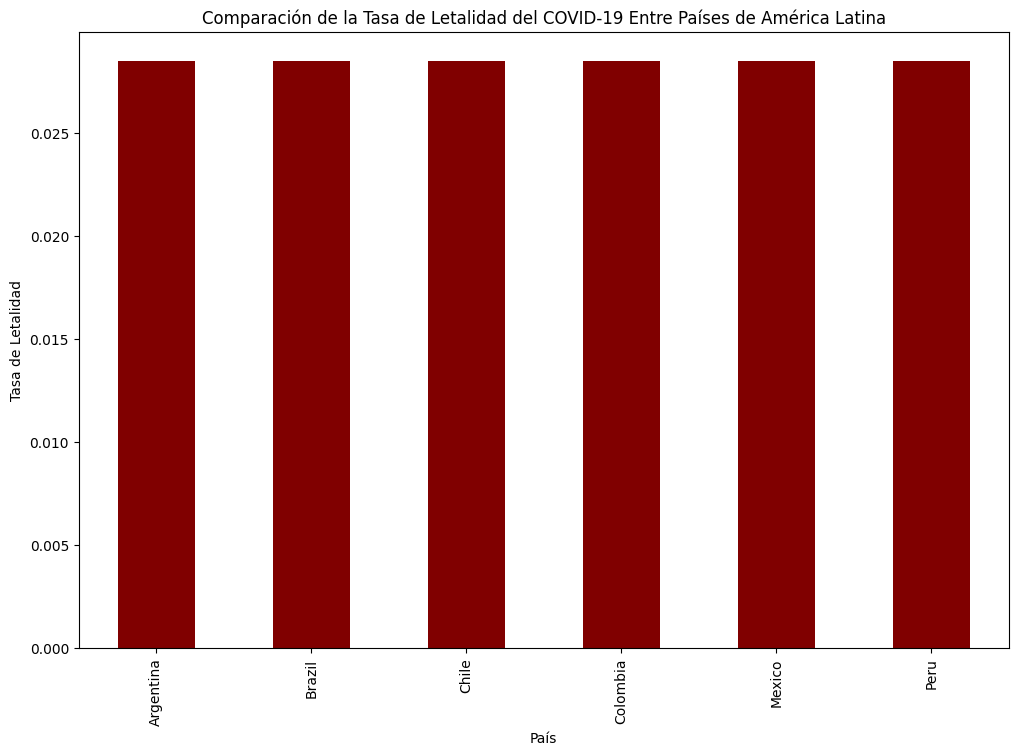

In [59]:
#  Fatalidad por pais

data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Todos los países han tenido un comportamiento similar en cuanto a la fatalidad, sin embargo apoyandose con las otras gráficas se puede observar que ha disminuido.

Los casos nuevos y las muestes nuevas ha variado de la siguiente manera esto debido a la vacucación y a las medidas tomadas por los paises, ademas de que se ha disminuido la cantidad de personas que se han contagiado y fallecido.

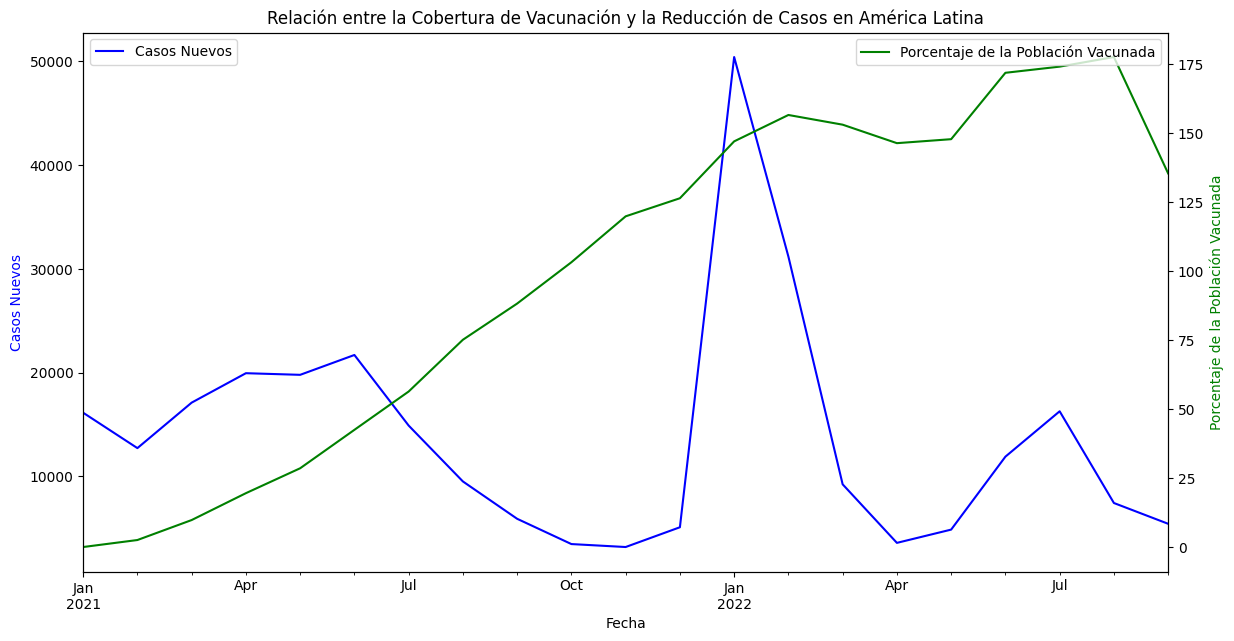

In [60]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Los datos parecerían indicar que cuando se incrementó la población vacunada la cantidad de casos que venia creciendo comenzó a estabilizarse en valores de inicio de pandemia. 

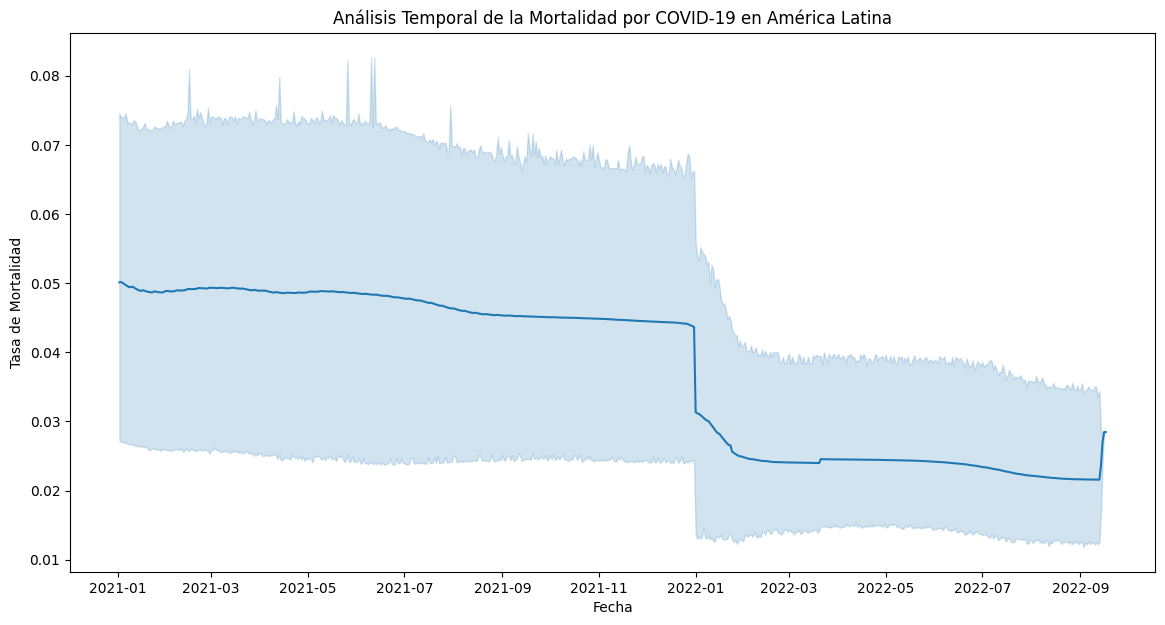

In [61]:
# cómo evolucionó la mortalidad

data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

La mortalidad por Covid 19 fue cayendo de manera pronunciada en la medidad en que avanzó la campaña de vacunación en America Latina. 

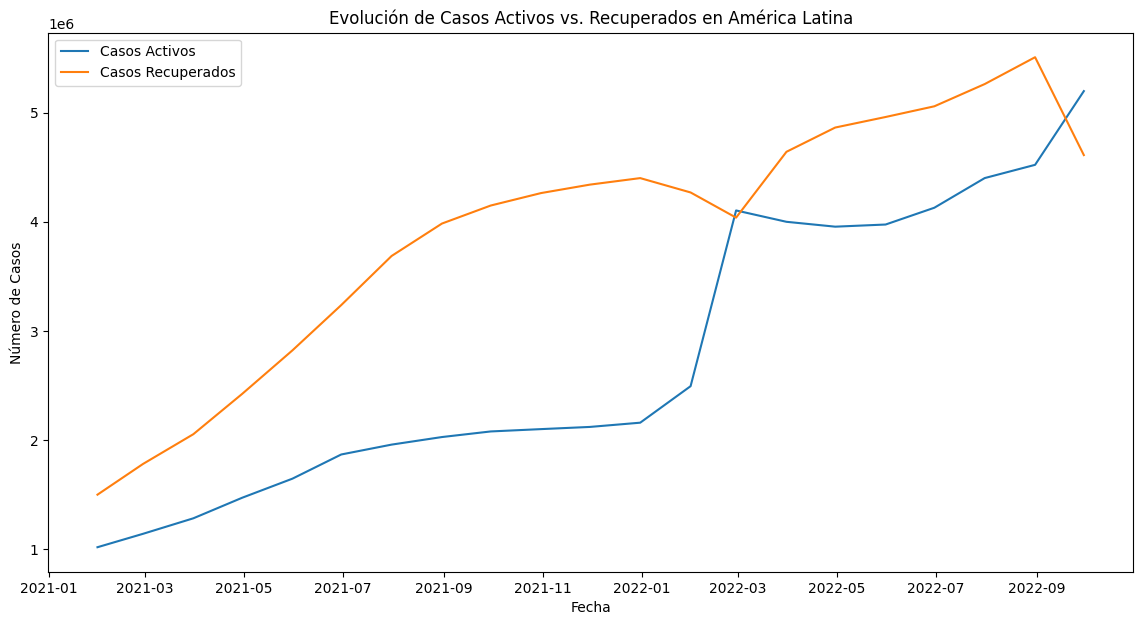

In [62]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

La cantidad de casos activos fue creciendo mientras crecia a la par la cantidad de casos recuperados. 

In [63]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Argentina       6591245.34                  0.00            193136.78
Brazil          6591245.34                  0.00            193136.78
Chile           6591245.34                  0.00            193136.78
Colombia        6591245.34                  0.00            193136.78
Mexico          6591245.34                  0.00            193136.78
Peru            6591245.34                  0.00            193136.78

In [64]:
# Debo usar max() porque last no registra el acumulado de recovered
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Colombia        6591245.34            5441021.00            193136.78
Chile           6591245.34                  0.00            193136.78
Peru            6591245.34                  0.00            216173.00
Mexico          6591245.34                  0.00            304025.00
Argentina       9567933.00                  0.00            193136.78
Brazil         33819307.00           33706231.00            685203.00

In [65]:
data_latinoamerica_paises[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_paises.index >= data_latinoamerica_paises.index.max())
]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina    6591245.34                  0.00   
2022-09-17       Brazil    6591245.34                  0.00   
2022-09-17        Chile    6591245.34                  0.00   
2022-09-17     Colombia    6591245.34                  0.00   
2022-09-17       Mexico    6591245.34                  0.00   
2022-09-17         Peru    6591245.34                  0.00   

            cumulative_deceased  
date                             
2022-09-17            193136.78  
2022-09-17            193136.78  
2022-09-17            193136.78  
2022-09-17            193136.78  
2022-09-17            193136.78  
2022-09-17            193136.78

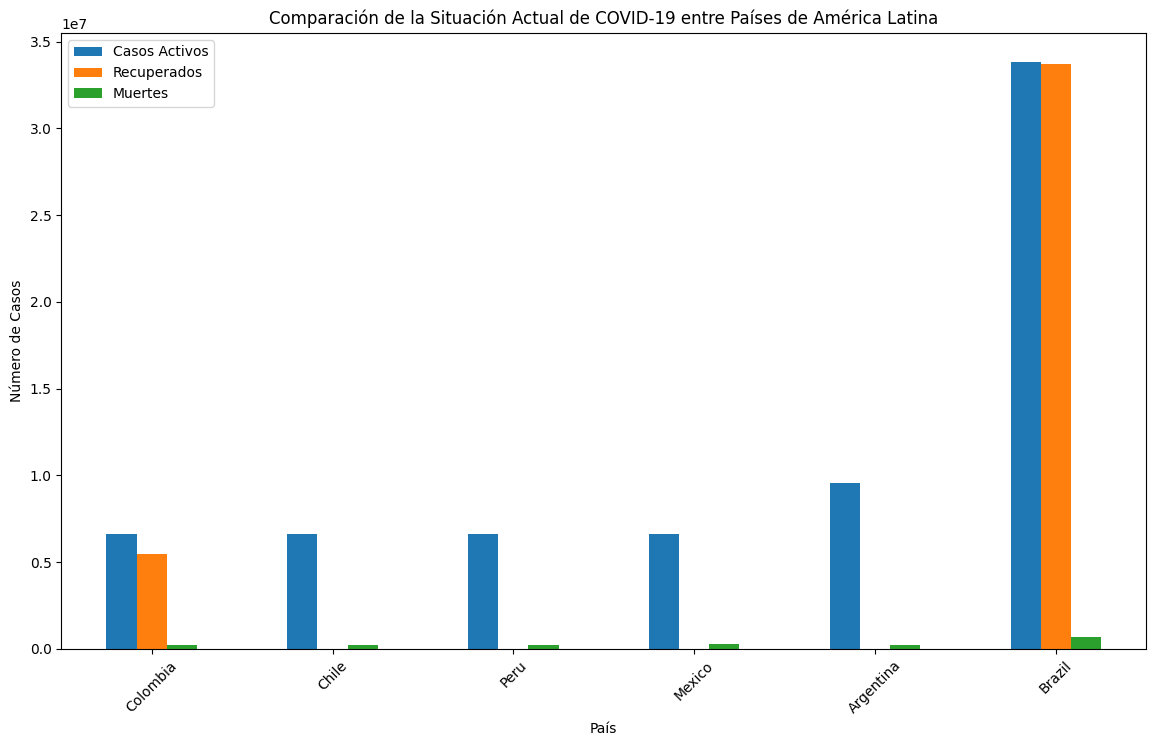

In [66]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

#### Avance 4

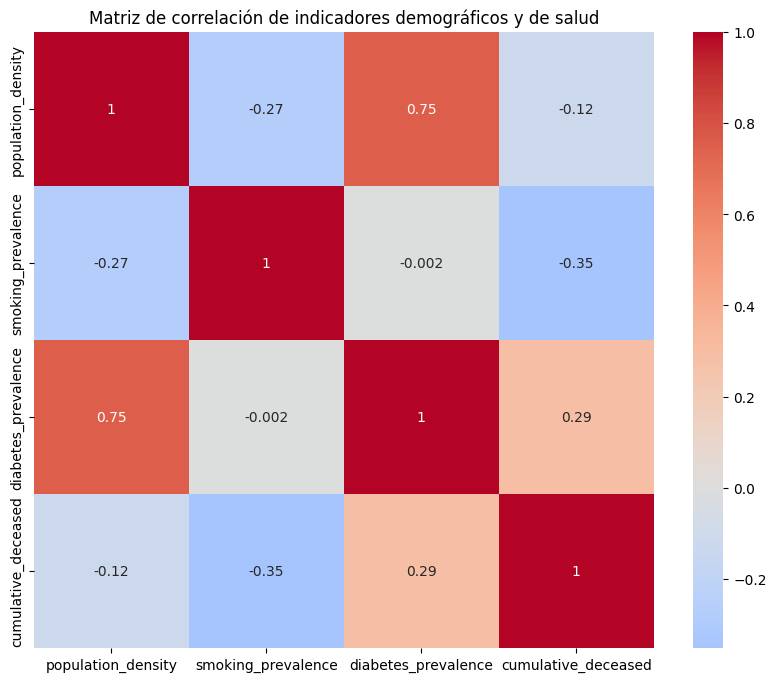

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame
data_latinoamerica_paises = pd.read_csv('C:/Users/Usuario/Desktop/proyecto_avance/Datosfinalesfiltrado.csv')

# Convertir la columna 'date' a tipo datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Establecer 'date' como índice
#data_latinoamerica_paises.set_index('date', inplace=True)

# Seleccionar columnas numéricas de tipo float
columnas_numericas = data_latinoamerica_paises.select_dtypes(include=['float64']).columns

# Convertir todas las columnas numéricas a enteros
data_latinoamerica_paises[columnas_numericas] = data_latinoamerica_paises[columnas_numericas].astype(int)

# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()


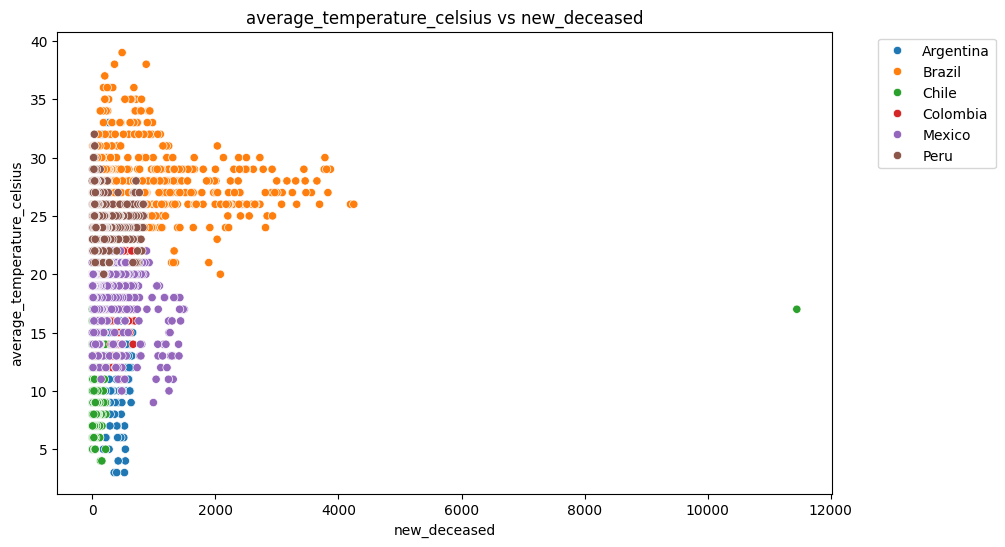

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame
data_latinoamerica_paises = pd.read_csv('C:/Users/Usuario/Desktop/proyecto_avance/Datosfinalesfiltrado.csv')

# Convertir la columna 'date' a tipo datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Establecer 'date' como índice
#data_latinoamerica_paises.set_index('date', inplace=True)

# Seleccionar columnas numéricas de tipo float
columnas_numericas = data_latinoamerica_paises.select_dtypes(include=['float64']).columns

# Convertir todas las columnas numéricas a enteros
data_latinoamerica_paises[columnas_numericas] = data_latinoamerica_paises[columnas_numericas].astype(int)
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()